In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

strat_pkg = 'IDE'

mpl_finance_path = '/content/drive/My Drive/Colab Notebooks/JnQ/mpl_finance'

if mpl_finance_path not in sys.path:

  try:
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/{}'.format(strat_pkg))
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/funcs')
    sys.path.insert(0, mpl_finance_path)
    
  except Exception as e:
    print(e)

Mounted at /content/drive


# requirements

In [2]:
# !pip install findiff

# import nvstrings, nvcategory, cudf
# import cuml
# import cudf

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs.funcs_idep import *
from funcs.funcs_duration_v2 import *
from funcs.funcs_plot_check import *
# from funcs.funcs_ide import *
# from funcs.funcs_indicator_candlescore import *
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
import logging
import importlib

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
# import jax.numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf

import pickle
import shutil
import json
from easydict import EasyDict

# from trendln import trendln

from datetime import datetime
import random
import time
import warnings

warnings.simplefilter("ignore", category=RuntimeWarning)
# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

np.seterr(invalid="ignore")
pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## cudf

In [ ]:
# !conda install -c rapidsai-nightly -c nvidia -c numba -c conda-forge \
#     cudf python=3.7 cudatoolkit=11.1 -t=$nb_path

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: -t=/content/notebooks


In [ ]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.


In [ ]:
import shutil
import sys

colab_env = "/usr/lib"

rapids_path = os.path.join(current_path, "rapidsai-csp-utils/lib")
rapids_libs = os.listdir(rapids_path)
print(rapids_libs)
# break

for lib_ in rapids_libs:
  try:
    shutil.copy(os.path.join(rapids_path, lib_), os.path.join(colab_env, lib_))
    sys.path.append(os.path.join(colab_env, lib_))
    print("copied to" + os.path.join(colab_env, lib_))
  except Exception as e:
    print(e)

## move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# makeset - with to_htf dataframes

## sync_check_make

In [ ]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv_=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # return

    #           supertrend          #
    # df = st_price_line(df, df_3T, '3m')
    # # print(df.head(100))
    # # return

    # df = st_price_line(df, df_5T, '5m')
    # df = st_price_line(df, df_15T, '15m')
    # df = st_price_line(df, df_30T, '30m')
    # df = st_price_line(df, df_H, '1h')
    # df = st_price_line(df, df_4H, '4h')

    # print("supertrend phase done")

    # --------------- rsi --------------- #  
    df['rsi_1m'] = rsi(df, 14)    
    df_5T['rsi_5m'] = rsi(df_5T, 14)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")


    # --------------- ema --------------- #      
    df_5T['ema_5m'] = ema(df_5T['close'], 155)
    df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    print("ema phase done")


    # # --------------- dc --------------- #  
    df = dc_line(df, None, '1m', dc_period=20)
    df = dc_line(df, df_3T, '3m', dc_period=20)
    df = dc_line(df, df_5T, '5m', dc_period=20)
    df = dc_line(df, df_15T, '15m', dc_period=20)
    df = dc_line(df, df_30T, '30m', dc_period=20)
    df = dc_line(df, df_H, '1h', dc_period=20)
    df = dc_line(df, df_4H, '4h', dc_period=20)
    df = dc_line(df, df_D, '1d', dc_period=20)

    print("dc phase done")
    
    # # --------------- bband --------------- #  
    df = bb_line(df, None, '1m')
    df = bb_line(df, df_3T, '3m')
    df = bb_line(df, df_5T, '5m')
    df = bb_line(df, df_15T, '15m')
    df = bb_line(df, df_30T, '30m')
    df = bb_line(df, df_H, '1h')
    df = bb_line(df, df_4H, '4h')
    df = bb_line(df, df_D, '1d')

    print("bband phase done")

    # --------------- cbline --------------- #    
    # df_3T['cloud_bline_3m'] = cloud_bline(df_3T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_3T, [-1]), columns=['cloud_bline_3m']))
    # df_5T['cloud_bline_5m'] = cloud_bline(df_5T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['cloud_bline_5m']))
    # df_15T['cloud_bline_15m'] = cloud_bline(df_15T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_15T, [-1]), columns=['cloud_bline_15m']))
    # df_30T['cloud_bline_30m'] = cloud_bline(df_30T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_30T, [-1]), columns=['cloud_bline_30m']))
    # df_H['cloud_bline_1h'] = cloud_bline(df_H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_H, [-1]), columns=['cloud_bline_1h']))
    # df_4H['cloud_bline_4h'] = cloud_bline(df_4H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_4H, [-1]), columns=['cloud_bline_4h']))

    # print("cbline phase done")
    

    #           lucid sar              #
    # df['sar_1m'], df['sar_uptrend_1m'] = lucid_sar(df, return_uptrend=True)

    # df_3T['sar_3m'], df_3T['sar_uptrend_3m'] = lucid_sar(df_3T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_3T, [-2, -1], backing_i=1), columns=['sar_3m', 'sar_uptrend_3m']))

    # df_5T['sar_5m'], df_5T['sar_uptrend_5m'] = lucid_sar(df_5T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-2, -1], backing_i=1), columns=['sar_5m', 'sar_uptrend_5m']))

    # df_15T['sar_15m'], df_15T['sar_uptrend_15m'] = lucid_sar(df_15T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_15T, [-2, -1], backing_i=1), columns=['sar_15m', 'sar_uptrend_15m']))

    # df_4H['sar_4h'], df_4H['sar_uptrend_4h'] = lucid_sar(df_4H, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_4H, [-2, -1], backing_i=1), columns=['sar_4h', 'sar_uptrend_4h']))
    
    # print("sar phase done")

    
    #           stochastic              #
    # df['stoch_1m'] = stoch(df, 13, 3, 3)

    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

NameError: ignored

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

  0%|          | 0/156 [00:00<?, ?it/s]

DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-09-14 03:59:59.999000', '2021-11-15 14:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-03-10 20:59:59.999000', '2021-11-15 16:59:59.999000'], dtype='datetime64[ns]', freq=None)

xlsx converted to feather !
DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='

### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


  0%|          | 0/175 [00:00<?, ?it/s]

copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BCHUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XRPUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 EOSUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LINKUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XLMUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ADAUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETHUSDT_1m.ftr


### feather ver.

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance


save_path = './candlestick_concated/res_df/'
save_dir_path = "bb1d_backi2"

date = '2022-01-10'
date = '2022-02-17'

# ------ db_path ------ #
cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

# ------ save_path ------ #
# concat_path = 'noncat' # non_cum 끼리 cols cum 하는 경우 noncat 이 맞음
concat_path = 'concat'

data_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(data_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    # if feather_name in exist_list:
    #   print(feather_name, "already exist !")
    #   continue
    
    df = pd.read_feather(os.path.join(data_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

  0%|          | 0/1 [00:00<?, ?it/s]

3T ->                          open     high      low    close
index                                                  
2022-02-17 10:27:00  3148.85  3150.08  3146.38  3146.76
5T ->                          open     high      low    close
index                                                  
2022-02-17 10:25:00  3146.85  3150.08  3145.44  3146.76
15T ->                          open    high      low    close
index                                                 
2022-02-17 10:15:00  3143.99  3151.0  3139.14  3146.76
30T ->                         open     high      low    close
index                                                 
2022-02-17 10:00:00  3148.8  3158.68  3139.14  3146.76
H ->                         open     high      low    close
index                                                 
2022-02-17 10:00:00  3148.8  3158.68  3139.14  3146.76
4H ->                         open     high     low    close
index                                                
2022-02-17 09:00:0

### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

itv_ : 3T
                        open     high      low    close
index                                                  
2022-01-10 15:06:00  3169.97  3170.22  3159.51  3161.22
2022-01-10 15:09:00  3161.22  3163.98  3161.22  3163.82
2022-01-10 15:12:00  3163.82  3163.83  3156.02  3160.49
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3162.93
2022-01-10 15:18:00  3163.02  3164.29  3162.41  3164.28
                            open     high      low    close    volume
index                                                                
2022-01-10 15:08:59.999  3169.97  3170.22  3159.51  3161.22  4241.449
2022-01-10 15:11:59.999  3161.22  3163.98  3161.22  3163.82  1143.874
2022-01-10 15:14:59.999  3163.82  3163.83  3156.02  3160.49  2135.292
2022-01-10 15:17:59.999  3160.51  3164.29  3159.01  3162.93  1011.598
2022-01-10 15:20:59.999  3163.02  3164.29  3162.41  3163.82   466.868


## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (col concat)

In [ ]:
new_dir_path = "bb4h_backi2"
base_dir_path = "bb30m_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


['2022-01-10 ETHUSDT.ftr']
./candlestick_concated/res_df/bb4h_backi2/concat/cum/2022-01-10/2022-01-10 ETHUSDT.ftr saved !


In [ ]:
print(*droped_new_res_df.columns, sep = '\n')

### feather ver. (row concat) , database cum 도 호환가능

In [ ]:
save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2021-11-17'
new_date = '2022-01-10'

#     load ftr list    #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  if key in exist_list:
    print(key, "already exist !")
    continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  if "_" in key:

    interval = key.split(".")[0].split("_")[-1] 
    itv_num = to_itvnum(interval)

    # verified_df = consecutive_df(droped_new_res_df, to_itvnum(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("-------------------- unideal ts_gap --------------------")

    print("continuity checked !")

  droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


['2022-01-10 ETHUSDT_1m.ftr', '2022-01-10 ETHUSDT_3m.ftr', '2022-01-10 ETHUSDT_5m.ftr', '2022-01-10 ETHUSDT_15m.ftr', '2022-01-10 ETHUSDT_30m.ftr', '2022-01-10 ETHUSDT_1h.ftr', '2022-01-10 ETHUSDT_4h.ftr']
                            open     high      low    close     volume
index                                                                 
2020-09-05 00:00:59.999   383.27   383.49   377.23   377.64  24429.574
2022-01-10 15:18:59.999  3163.02  3164.29  3162.41  3164.28    320.335
continuity checked !
./candlestick_concated/database_bn/cum/2022-01-10/2022-01-10 ETHUSDT_1m.ftr saved !
                            open     high      low    close    volume
index                                                                
2020-09-04 00:02:59.999   412.71   412.71   410.00   410.24  7853.327
2022-01-10 15:20:59.999  3163.02  3164.29  3162.41  3163.82   466.868
continuity checked !
./candlestick_concated/database_bn/cum/2022-01-10/2022-01-10 ETHUSDT_3m.ftr saved !
                    

### check continuity

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


                            rsi_1m     rsi_5m       ema_5m  dc_upper_1m  dc_lower_1m  dc_base_1m  dc_upper_3m  dc_lower_3m  dc_base_3m  dc_upper_5m  dc_lower_5m  dc_base_5m  dc_upper_15m  dc_lower_15m  dc_base_15m  dc_upper_30m  dc_lower_30m  dc_base_30m  bb_upper_1m  bb_lower_1m  bb_upper_3m  bb_lower_3m  bb_upper_5m  bb_lower_5m  bb_upper_15m  bb_lower_15m  bb_upper_30m  bb_lower_30m     open    high      low    close    volume  dc_upper_1h  dc_lower_1h  dc_base_1h  dc_upper_4h  dc_lower_4h  dc_base_4h  bb_upper_1h  bb_lower_1h  bb_upper_4h  bb_lower_4h
index                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### check length of front missing value + middle_data non_missing validity

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


2.167361111111111
38


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## load data (old)

In [ ]:
interval = '1m'
date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '1h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '4h'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

interval8 = '1d'
date_path8 = './candlestick_concated/%s/quant_v2/' % interval8
file_list8 = os.listdir(date_path8)
print((file_list8))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

# pr check with strategy

## load ftr_list

In [18]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bb4h_backi2"
dir_path = "bb1d_backi2"
date = "2022-01-10"
# date = "2022-02-17"

ftr_path = os.path.join(save_path, dir_path, "concat/cum", date)

#     load ftr list    #
ftr_list = [s for s in os.listdir(ftr_path) if "ftr" in s if date in s]
# ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path)) if "ftr" in s if date in s]
print(ftr_list)

['2022-01-10 ETHUSDT.ftr']


## hvp platform

### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

target 300000 (300000) -> 35 18185123158722
250 (250) -> 35 18185117654426

47.042640686035156


### import utils & config

In [4]:
frame_ver = "0114_htf"
ID_list = ['v3', 'v5_2', 'v7_3']

utils_public_name = "{}.utils.{}_utils_public".format(strat_pkg, frame_ver)
utils_public_lib = importlib.import_module(utils_public_name)
utils_public = utils_public_lib   # temporary

u_name_list = ["{}.utils.{}_utils_{}".format(strat_pkg, frame_ver, id_) for id_ in ID_list]
utils_list = [importlib.import_module(u_name) for u_name in u_name_list]
[utils1, utils2, utils3] = utils_list   # temporary

config_list = ["{}_config_{}.json".format(frame_ver, id_) for id_ in ID_list]
cfg_path_list = [os.path.join(current_path, strat_pkg, "config", name_) for name_ in config_list]
cfg_file_list = [open(cfg_path) for cfg_path in cfg_path_list]
cfg_list = [EasyDict(json.load(cfg_)) for cfg_ in cfg_file_list]
[config1, config2, config3] = cfg_list   # temporary
#       opened files should be closed --> 닫지 않으면 reopen 시 error occurs         #
_ = [cfg_.close() for cfg_ in cfg_file_list]

show_plot = 1   # idep's var - do not touch


#### utils_

In [ ]:
# from funcs.funcs_indicator import *
# import numpy as np


def enlist_rtc(res_df, config, np_timeidx):
    strat_version = config.strat_version

    # res_df['short_rtc_1_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.outg_itv1]
    # res_df['short_rtc_0_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.outg_itv0]

    # res_df['long_rtc_1_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.outg_itv1]
    # res_df['long_rtc_0_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.point.outg_itv0]

    res_df['short_rtc_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.point.outg_itv1]
    res_df['short_rtc_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.outg_itv0]

    res_df['long_rtc_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.outg_itv1]
    res_df['long_rtc_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.outg_itv0]

    #      entry reversion    #
    if config.ep_set.short_entry_score > 0:
        short_rtc_1_copy = res_df['short_rtc_1_{}'.format(strat_version)].copy()
        res_df['short_rtc_1_{}'.format(strat_version)] = res_df['long_rtc_1_{}'.format(strat_version)]
        res_df['long_rtc_1_{}'.format(strat_version)] = short_rtc_1_copy

        short_rtc_0_copy = res_df['short_rtc_0_{}'.format(strat_version)].copy()
        res_df['short_rtc_0_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)]
        res_df['long_rtc_0_{}'.format(strat_version)] = short_rtc_0_copy

    res_df['short_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['short_rtc_0_{}'.format(strat_version)] - res_df['short_rtc_1_{}'.format(strat_version)])
    res_df['long_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['long_rtc_1_{}'.format(strat_version)] - res_df['long_rtc_0_{}'.format(strat_version)])

    res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.tpg_itv1]
    # res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.tpg_itv]
    res_df['h_short_rtc_0_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.tpg_itv0]

    res_df['h_long_rtc_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.tpg_itv1]
    # res_df['h_long_rtc_1_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.tpg_itv]
    res_df['h_long_rtc_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.tpg_itv0]

    #      entry reversion    #
    if config.ep_set.short_entry_score > 0:
        h_short_rtc_1_copy = res_df['h_short_rtc_1_{}'.format(strat_version)].copy()
        res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)]
        res_df['h_long_rtc_1_{}'.format(strat_version)] = h_short_rtc_1_copy

        h_short_rtc_0_copy = res_df['h_short_rtc_0_{}'.format(strat_version)].copy()
        res_df['h_short_rtc_0_{}'.format(strat_version)] = res_df['h_long_rtc_0_{}'.format(strat_version)]
        res_df['h_long_rtc_0_{}'.format(strat_version)] = h_short_rtc_0_copy

    res_df['h_short_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['h_short_rtc_0_{}'.format(strat_version)] - res_df['h_short_rtc_1_{}'.format(strat_version)])
    res_df['h_long_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['h_long_rtc_1_{}'.format(strat_version)] - res_df['h_long_rtc_0_{}'.format(strat_version)])

    res_df['short_dtk_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.zone.dtk_itv]
    res_df['short_dtk_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.zone.dtk_itv]

    res_df['long_dtk_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.zone.dtk_itv]
    res_df['long_dtk_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.zone.dtk_itv]

    res_df['short_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['short_dtk_0_{}'.format(strat_version)] - res_df['short_dtk_1_{}'.format(strat_version)])
    res_df['long_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['long_dtk_1_{}'.format(strat_version)] - res_df['long_dtk_0_{}'.format(strat_version)])

    return res_df


def enlist_tr(res_df, config, np_timeidx):
    strat_version = config.strat_version

    res_df['entry_{}'.format(strat_version)] = np.zeros(len(res_df))
    res_df['h_entry_{}'.format(strat_version)] = np.zeros(len(res_df))

    # -------- set ep level -------- #

    #       limit ver.     #
    # res_df['short_ep_{}'.format(strat_version)] = res_df['short_rtc_1_{}'.format(strat_version)] + res_df['short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
    # res_df['long_ep_{}'.format(strat_version)] = res_df['long_rtc_1_{}'.format(strat_version)] - res_df['long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap

    res_df['short_ep_{}'.format(strat_version)] = res_df['close'] + res_df[
        'h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
    res_df['long_ep_{}'.format(strat_version)] = res_df['close'] - res_df[
        'h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap

    if config.tr_set.c_ep_gap != "None":
        res_df['short_ep_org_{}'.format(strat_version)] = res_df['short_ep_{}'.format(strat_version)].copy()
        res_df['long_ep_org_{}'.format(strat_version)] = res_df['long_ep_{}'.format(strat_version)].copy()

        res_df['short_ep2_{}'.format(strat_version)] = res_df['h_short_rtc_1_{}'.format(strat_version)] + res_df[
            'h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap
        res_df['long_ep2_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)] - res_df[
            'h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap

    res_df['short_spread_ep_{}'.format(strat_version)] = res_df[
        'bb_lower_5m']  # + res_df['h_short_rtc_gap_{}'.format(strat_version)] * config.loc_set.zone.spread_ep_gap
    res_df['long_spread_ep_{}'.format(strat_version)] = res_df[
        'bb_upper_5m']  # - res_df'h_long_rtc_gap_{}'.format(strat_version)] * config.loc_set.zone.spread_ep_gap

    #       market ver.     #
    if config.ep_set.entry_type == "MARKET":
        res_df['short_ep_{}'.format(strat_version)] = res_df['close']
        res_df['long_ep_{}'.format(strat_version)] = res_df['close']

    # ---------------------------------------- short = -1 ---------------------------------------- #
    # ---------------- ep_time  ---------------- #

    rsi_upper = 50 + config.loc_set.point.osc_band
    rsi_lower = 50 - config.loc_set.point.osc_band

    res_df['rsi_%s_shift' % config.loc_set.point.exp_itv] = res_df['rsi_%s' % config.loc_set.point.exp_itv].shift(
        config.loc_set.point.tf_entry)

    res_df['entry_{}'.format(strat_version)] = np.where(
        (res_df['rsi_%s_shift' % config.loc_set.point.exp_itv] >= rsi_upper) &
        (res_df['rsi_%s' % config.loc_set.point.exp_itv] < rsi_upper)
        , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    res_df['entry_{}'.format(strat_version)] = np.where((res_df['entry_{}'.format(strat_version)] < 0) &
                                                        (np_timeidx % config.loc_set.point.tf_entry == (
                                                                    config.loc_set.point.tf_entry - 1))
                                                        , res_df['entry_{}'.format(strat_version)] - 1,
                                                        res_df['entry_{}'.format(strat_version)])

    res_df['h_entry_{}'.format(strat_version)] = np.where(
        # (res_df['open'] >= res_df['bb_lower_%s' % config.loc_set.zone.dtk_itv]) &
        (res_df['close'].shift(config.loc_set.point.htf_entry * 1) >= res_df[
            'bb_lower_%s' % config.loc_set.zone.dtk_itv]) &
        (res_df['close'] < res_df['bb_lower_%s' % config.loc_set.zone.dtk_itv]) &
        (np_timeidx % config.loc_set.point.htf_entry == (config.loc_set.point.htf_entry - 1))
        , res_df['h_entry_{}'.format(strat_version)] - 1, res_df['h_entry_{}'.format(strat_version)])

    # ---------------------------------------- long = 1 ---------------------------------------- #
    # ---------------------- ep_time ---------------------- #

    res_df['entry_{}'.format(strat_version)] = np.where(
        (res_df['rsi_%s_shift' % config.loc_set.point.exp_itv] <= rsi_lower) &
        (res_df['rsi_%s' % config.loc_set.point.exp_itv] > rsi_lower)
        , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])

    res_df['entry_{}'.format(strat_version)] = np.where((res_df['entry_{}'.format(strat_version)] > 0) &
                                                        (np_timeidx % config.loc_set.point.tf_entry == (
                                                                    config.loc_set.point.tf_entry - 1))
                                                        , res_df['entry_{}'.format(strat_version)] + 1,
                                                        res_df['entry_{}'.format(strat_version)])

    res_df['h_entry_{}'.format(strat_version)] = np.where(
        # (res_df['open'] <= res_df['bb_upper_%s' % config.loc_set.zone.dtk_itv]) &
        (res_df['close'].shift(config.loc_set.point.htf_entry * 1) <= res_df[
            'bb_upper_%s' % config.loc_set.zone.dtk_itv]) &
        (res_df['close'] > res_df['bb_upper_%s' % config.loc_set.zone.dtk_itv]) &
        (np_timeidx % config.loc_set.point.htf_entry == (config.loc_set.point.htf_entry - 1))
        , res_df['h_entry_{}'.format(strat_version)] + 1, res_df['h_entry_{}'.format(strat_version)])

    # ------------------------------ rtc tp & out ------------------------------ #
    # --------------- bb rtc out --------------- #

    if config.loc_set.point.outg_dc_period != "None":
        res_df['short_rtc_0_{}'.format(strat_version)] = res_df['high'].rolling(
            config.loc_set.point.outg_dc_period).max()
        res_df['long_rtc_0_{}'.format(strat_version)] = res_df['low'].rolling(config.loc_set.point.outg_dc_period).min()

    res_df['short_out_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df[
        'short_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap
    res_df['long_out_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df[
        'long_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap

    if config.tr_set.t_out_gap != "None":
        res_df['short_out_org_{}'.format(strat_version)] = res_df['short_out_{}'.format(strat_version)].copy()
        res_df['long_out_org_{}'.format(strat_version)] = res_df['long_out_{}'.format(strat_version)].copy()

        res_df['short_out2_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df[
            'short_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap
        res_df['long_out2_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df[
            'long_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap

    # ------------------------------ tp ------------------------------ #
    # --------------- bb rtc tp --------------- #
    res_df['short_tp_{}'.format(strat_version)] = res_df['h_short_rtc_1_{}'.format(strat_version)] - res_df[
        'h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.tp_gap
    res_df['long_tp_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)] + res_df[
        'h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.tp_gap

    # --------------- set tp_line / dtk_line --------------- #
    # res_df['short_tp_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1, res_df['short_rtc_1_{}'.format(strat_version)], np.nan)
    # res_df['short_tp_1_{}'.format(strat_version)] = ffill(res_df['short_tp_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['short_tp_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1, res_df['h_short_rtc_gap_{}'.format(strat_version)], np.nan)  # ltf_gap 은 out 을 위한 gap 임
    # res_df['short_tp_gap_{}'.format(strat_version)] = ffill(res_df['short_tp_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['long_tp_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1, res_df['long_rtc_1_{}'.format(strat_version)], np.nan)
    # res_df['long_tp_1_{}'.format(strat_version)] = ffill(res_df['long_tp_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['long_tp_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1, res_df['h_long_rtc_gap_{}'.format(strat_version)], np.nan)
    # res_df['long_tp_gap_{}'.format(strat_version)] = ffill(res_df['long_tp_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['h_short_tp_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1, res_df['h_short_rtc_1_{}'.format(strat_version)], np.nan)
    # res_df['h_short_tp_1_{}'.format(strat_version)] = ffill(res_df['h_short_tp_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['h_short_tp_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1, res_df['h_short_rtc_gap_{}'.format(strat_version)], np.nan)
    # res_df['h_short_tp_gap_{}'.format(strat_version)] = ffill(res_df['h_short_tp_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['h_long_tp_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1, res_df['h_long_rtc_1_{}'.format(strat_version)], np.nan)
    # res_df['h_long_tp_1_{}'.format(strat_version)] = ffill(res_df['h_long_tp_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['h_long_tp_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1, res_df['h_long_rtc_gap_{}'.format(strat_version)], np.nan)
    # res_df['h_long_tp_gap_{}'.format(strat_version)] = ffill(res_df['h_long_tp_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

    if config.loc_set.zone.use_dtk_line:
        res_df['short_dtk_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1,
                                                                  res_df['short_dtk_1_{}'.format(strat_version)],
                                                                  np.nan)
        res_df['short_dtk_1_{}'.format(strat_version)] = ffill(
            res_df['short_dtk_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
        res_df['short_dtk_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == -1,
                                                                    res_df['short_dtk_gap_{}'.format(strat_version)],
                                                                    np.nan)
        res_df['short_dtk_gap_{}'.format(strat_version)] = ffill(
            res_df['short_dtk_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

        res_df['long_dtk_1_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1,
                                                                 res_df['long_dtk_1_{}'.format(strat_version)], np.nan)
        res_df['long_dtk_1_{}'.format(strat_version)] = ffill(
            res_df['long_dtk_1_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)
        res_df['long_dtk_gap_{}'.format(strat_version)] = np.where(res_df['h_entry_{}'.format(strat_version)] == 1,
                                                                   res_df['long_dtk_gap_{}'.format(strat_version)],
                                                                   np.nan)
        res_df['long_dtk_gap_{}'.format(strat_version)] = ffill(
            res_df['long_dtk_gap_{}'.format(strat_version)].values.reshape(1, -1)).reshape(-1, 1)

    res_df['dc_upper_v2_{}'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()
    res_df['dc_lower_v2_{}'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    res_df['zone_dc_upper_v2_{}'.format(strat_version)] = res_df['high'].rolling(
        config.loc_set.zone.zone_dc_period).max()
    res_df['zone_dc_lower_v2_{}'.format(strat_version)] = res_df['low'].rolling(
        config.loc_set.zone.zone_dc_period).min()

    return res_df


#### utils_ override

In [ ]:
#     to utils2     #
utils2.enlist_rtc = enlist_rtc


#     when using override = 1   #
# enlist_rtc = utils2.enlist_rtc
# # enlist_rtc = enlist_rtc
# enlist_tr = utils2.enlist_tr

#### utils_public

In [ ]:
# from funcs.funcs_indicator import *
# from funcs.funcs_trader import *
# import logging

sys_log3 = logging.getLogger()


class OrderSide:
    BUY = "BUY"
    SELL = "SELL"
    INVALID = None


def lvrg_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    strat_version = config.strat_version

    if open_side == OrderSide.SELL:

        if strat_version in ['v3']:
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / (out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
            config.lvrg_set.leverage = config.lvrg_set.target_pct / (
                    out_ / ep_ - 1 - (fee + config.trader_set.market_fee))

            #     zone 에 따른 c_ep_gap 를 고려 (loss 완화 방향) / 윗 줄은 수익 극대화 방향
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / (out_ / res_df['short_ep_org'].iloc[ep_j] - 1 - (fee + config.trader_set.market_fee))

        elif strat_version in ['v5_2', 'v7_3']:
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
            config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(
                ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(res_df['short_ep_org'].iloc[ep_j] / out_ - 1 - (fee + config.trader_set.market_fee))

    else:
        #   윗 phase 는 min_pr 의 오차가 커짐
        if strat_version in ['v3']:
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / (ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
            config.lvrg_set.leverage = config.lvrg_set.target_pct / (
                    ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['long_ep_org'].iloc[ep_j] / out_ - 1 - (fee + config.trader_set.market_fee))

        elif strat_version in ['v5_2', 'v7_3']:
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
            config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(
                out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(out_ / res_df['long_ep_org'].iloc[ep_j] - 1 - (fee + config.trader_set.market_fee))

    if not config.lvrg_set.allow_float:
        config.lvrg_set.leverage = int(config.lvrg_set.leverage)

    # -------------- leverage rejection -------------- #
    if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
        return None

    config.lvrg_set.leverage = max(config.lvrg_set.leverage, 1)

    config.lvrg_set.leverage = min(limit_leverage, config.lvrg_set.leverage)

    return config.lvrg_set.leverage


def sync_check(df_, config, order_side="OPEN", row_slice=True):

    make_itv_list = [m_itv.replace('m', 'T') for m_itv in config.trader_set.itv_list]
    row_list = config.trader_set.row_list
    rec_row_list = config.trader_set.rec_row_list
    offset_list = config.trader_set.offset_list

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
    htf_df_list = [to_htf(df_, itv_=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                   in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]   #
    htf_df_list.insert(0, df_)

    # for htf_df_ in htf_df_list:
    #     print(htf_df_.tail())

    #       Todo        #
    #        1. row_list calc.
    #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
    #           b. => default_period + lb_period
    #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
    #                   1. default_period + max lb_period check
    #                       a. 현재까지 lb_period_list
    #                           h_prev_idx (open / close) 60
    #                           dc_period 135
    #                           zone_dc_period 135

    # --------- slicing (in trader phase only) --------- #
    #               --> latency 영향도가 높은 곳은 이곳
    if row_slice:   # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
        df, df_5T, df_15T, df_30T, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
        rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = [df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
    else:
        df, df_5T, df_15T, df_30T, df_4H = htf_df_list
        rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = htf_df_list

    # --------- add indi. --------- #

    #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
    #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
    start_0 = time.time()

    df = dc_line(df, None, '1m', dc_period=20)
    df = bb_line(df, None, '1m')
    # print(df.tail())

    df = dc_line(df, df_5T, '5m')
    df = bb_line(df, df_5T, '5m')

    df = dc_line(df, df_15T, '15m')
    df = bb_line(df, df_15T, '15m')

    df = bb_line(df, df_30T, '30m')

    # print(time.time() - start_0)

    # start_0 = time.time()
    df = bb_line(df, df_4H, '4h')
    # print(time.time() - start_0)

    rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
    df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
    # print(df.rsi_1m.tail())

    if order_side in ["OPEN"]:
        rec_df_5T['ema_5m'] = ema(rec_df_5T['close'], 155)  # Todo - recursive, 1550 period (5T)
        df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    return df


def public_indi(res_df, config, np_timeidx, order_side="OPEN"):

    strat_version = config.strat_version
    res_df = dc_level(res_df, '5m', 1)
    res_df = bb_level(res_df, '5m', 1)
    # res_df = st_level(res_df, '5m', 1)

    res_df = dc_level(res_df, '15m', 1)
    res_df = bb_level(res_df, '15m', 1)
    res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15m', 1)

    # res_df = dc_level(res_df, '30m', 1)
    # res_df = bb_level(res_df, '30m', 1)
    # res_df = st_level(res_df, '30m', 1)

    # res_df = bb_level(res_df, '1h', 1)

    res_df = bb_level(res_df, '4h', 1)

    res_df['dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()
    res_df['dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    res_df['zone_dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.zone_dc_period).max()
    res_df['zone_dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.zone_dc_period).min()

    if order_side in ["OPEN"]:
        start_0 = time.time()

        res_df["candle_ratio"], res_df['body_ratio'] = candle_ratio(res_df, unsigned=False)

        # print("~ candle_ratio() elapsed time : {}".format(time.time() - start_0))

        start_0 = time.time()

        h_c_intv1 = '15T'
        h_c_intv2 = 'H'
        res_df = h_candle_v2(res_df, h_c_intv1)
        res_df = h_candle_v2(res_df, h_c_intv2)

        # sys_log3.warning("~ h_candle_ratio elapsed time : {}".format(time.time() - start_0))
        # print("candle_ratio() ~ h_candle() elapsed time : {}".format(time.time() - start_0))

        h_candle_col = ['hopen_{}'.format(h_c_intv2), 'hhigh_{}'.format(h_c_intv2), 'hlow_{}'.format(h_c_intv2),
                        'hclose_{}'.format(h_c_intv2)]

        res_df['h_candle_ratio'], res_df['h_body_ratio'] = candle_ratio(res_df, ohlc_col=h_candle_col, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    return res_df


def short_point2(res_df, config, i, out_j, allow_ep_in):
    if config.strat_version == 'v5_2' and allow_ep_in == 0:

        if (res_df['dc_upper_1m'].iloc[i - 1] <= res_df['dc_upper_15m'].iloc[i]) & \
                (res_df['dc_upper_15m'].iloc[i - 1] != res_df['dc_upper_15m'].iloc[i]):
            # if (res_df['dc_upper_1m'].iloc[e_j - 1] <= res_df['dc_upper_5m'].iloc[e_j]) & \
            #     (res_df['dc_upper_5m'].iloc[e_j - 1] != res_df['dc_upper_5m'].iloc[e_j]):
            # (res_df['dc_upper_15m'].iloc[e_j] <= res_df['ema_5m'].iloc[e_j]):
            pass  # 일단, pass (non_logging)
        else:
            return 0, out_j  # input out_j could be initial_i

        # if res_df['ema_5m'].iloc[i] + res_df['dc_gap_5m'].iloc[i] * config.loc_set.point2.ce_gap <= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   return 0, out_j

        # if res_df['bb_upper_5m'].iloc[i] <= res_df['ema_5m'].iloc[i]:
        #   pass
        # else:
        #   return 0, out_j

        return 1, i  # i = e_j

    return 1, out_j  # allow_ep_in, out_j (for idep)


def long_point2(res_df, config, i, out_j, allow_ep_in):
    if config.strat_version == 'v5_2' and allow_ep_in == 0:

        if (res_df['dc_lower_1m'].iloc[i - 1] >= res_df['dc_lower_15m'].iloc[i]) & \
                (res_df['dc_lower_15m'].iloc[i - 1] != res_df['dc_lower_15m'].iloc[i]):
            pass
        else:
            return 0, out_j  # input out_j could be initial_i

        # if res_df['ema_5m'].iloc[i] - res_df['dc_gap_5m'].iloc[i] * config.loc_set.point2.ce_gap >= res_df['close'].iloc[i]:
        #   pass
        # else:
        #   return 0, out_j

        # if res_df['bb_lower_5m'].iloc[i] >= res_df['ema_5m'].iloc[i]:
        #   pass
        # else:
        #   return 0, out_j

        return 1, i  # i = e_j

    return 1, out_j


def mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail):
    mr_const_cnt += 1
    if const_:
        mr_score += 1
    # else:
    #     if show_detail:
    #         pass
    #     else:
    #         return res_df, open_side, zone

    return mr_const_cnt, mr_score


def short_ep_loc(res_df, config, i, np_timeidx, show_detail=True):

    #       Todo : const warning msg manual        #
    #        1. just copy & paste const as string
    #           a. ex) const_ = a < b -> "a < b"
    strat_version = config.strat_version

    # ------- param init ------- #
    open_side = None

    mr_const_cnt = 0
    mr_score = 0
    zone = 'n'

    if config.ep_set.entry_type == 'MARKET':
        if config.tp_set.tp_type != 'MARKET':
            tp_fee = config.trader_set.market_fee + config.trader_set.limit_fee
        else:
            tp_fee = config.trader_set.market_fee + config.trader_set.market_fee
        out_fee = config.trader_set.market_fee + config.trader_set.market_fee
    else:
        if config.tp_set.tp_type != 'MARKET':
            tp_fee = config.trader_set.limit_fee + config.trader_set.limit_fee
        else:
            tp_fee = config.trader_set.limit_fee + config.trader_set.market_fee
        out_fee = config.trader_set.limit_fee + config.trader_set.market_fee

    # -------------- candle_ratio -------------- #
    if config.loc_set.point.candle_ratio != "None":

        # -------------- candle_ratio_v0 (1m initial tick 기준임)  -------------- #
        if strat_version in ['v5_2', '1_1']:

            candle_ratio = res_df['candle_ratio'].iloc[i]
            # body_ratio_ = res_df['body_ratio'].iloc[i]

            const_ = candle_ratio <= -config.loc_set.point.candle_ratio
            if show_detail:
                sys_log3.warning(
                    "candle_ratio <= -config.loc_set.point.candle_ratio : {:.5f} <= {:.5f} ({})".format(candle_ratio,
                                                                                                        -config.loc_set.point.candle_ratio,
                                                                                                        const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        # -------------- candle_ratio_v1 (previous)  -------------- #
        if strat_version in ['v7_3', '2_2', 'v3']:

            prev_hclose_idx = i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)

            if i < 0 or (i >= 0 and prev_hclose_idx >= 0):   # trader or colab env.

                h_candle_ratio = res_df['h_candle_ratio'].iloc[prev_hclose_idx]
                h_body_ratio = res_df['h_body_ratio'].iloc[prev_hclose_idx]

                if strat_version in ['v7_3']:

                    total_ratio = h_candle_ratio + h_body_ratio / 100

                    const_ = total_ratio <= -config.loc_set.point.candle_ratio
                    if show_detail:
                        sys_log3.warning(
                            "total_ratio <= -config.loc_set.point.candle_ratio : {:.5f} <= {:.5f} ({})".format(
                                total_ratio,
                                -config.loc_set.point.candle_ratio,
                                const_))

                    mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                     show_detail)

                elif strat_version in ['2_2', 'v3', '1_1']:

                    const_ = h_candle_ratio <= -config.loc_set.point.candle_ratio
                    if show_detail:
                        sys_log3.warning(
                            "h_candle_ratio <= -config.loc_set.point.candle_ratio : {:.5f} <= {:.5f} ({})".format(
                                h_candle_ratio,
                                -config.loc_set.point.candle_ratio,
                                const_))

                    mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                     show_detail)

                    if config.loc_set.point.body_ratio != "None":

                        const_ = h_body_ratio >= config.loc_set.point.body_ratio
                        if show_detail:
                            sys_log3.warning(
                                "h_body_ratio >= config.loc_set.point.body_ratio : {:.5f} >= {:.5f} ({})".format(
                                    h_body_ratio,
                                    config.loc_set.point.body_ratio,
                                    const_))

                        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                         show_detail)

    if config.loc_set.point.candle_ratio2 != "None":  # candle_ratio1 과 동시적용 기능을 위해 병렬 구성

        #     candle_ratio_v2 (current)     #
        h_candle_ratio = res_df['h_candle_ratio'].iloc[i]
        h_body_ratio = res_df['h_body_ratio'].iloc[i]
        ho = res_df['hopen_H']
        hc = res_df['hclose_H']

        const_ = h_candle_ratio <= -config.loc_set.point.candle_ratio2
        if show_detail:
            sys_log3.warning(
                "h_candle_ratio <= -config.loc_set.point.candle_ratio2 : {:.5f} <= {:.5f} ({})".format(h_candle_ratio,
                                                                                                       -config.loc_set.point.candle_ratio2,
                                                                                                       const_))

        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        if config.loc_set.point.body_ratio2 != "None":

            const_ = ho > hc and h_body_ratio >= config.loc_set.point.body_ratio2
            if show_detail:
                sys_log3.warning(
                    "ho > hc and h_body_ratio >= config.loc_set.point.body_ratio2 : {:.5f} > {:.5f} and {:.5f} >= {:.5f} ({})"
                        .format(ho, hc, h_body_ratio, config.loc_set.point.body_ratio2, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # # -------------- tr scheduling -------------- #
    # if config.loc_set.zone.tr_thresh != "None":

    #
    #   tr = ((done_tp - ep_list[0] - tp_fee * ep_list[0]) / (ep_list[0] - done_out + out_fee * ep_list[0]))

    # -------------- spread scheduling -------------- #
    if config.loc_set.zone.short_spread != "None":

        spread = (res_df['bb_base_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] - tp_fee * res_df['bb_base_5m'].iloc[
            # spread = (res_df['bb_base_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] - out_fee * res_df['bb_base_5m'].iloc[
            # i]) / (res_df['bb_base_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] + tp_fee *
            i]) / (res_df['bb_base_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] + out_fee *
                   res_df['bb_base_5m'].iloc[i])
        # spread = (res_df['bb_base_15m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] - tp_fee * res_df['bb_base_15m'].iloc[
        #     i]) / (res_df['bb_base_15m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] + out_fee *
        #             res_df['bb_base_15m'].iloc[i])

        # spread = (res_df['dc_upper_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] - tp_fee * res_df['bb_lower_5m'].iloc[
        #     i]) / (res_df['dc_upper_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] + out_fee *
        #             res_df['bb_lower_5m'].iloc[i])
        # spread = (res_df['short_rtc_gap'].iloc[i] * (0.443) - tp_fee * res_df['short_ep'].iloc[
        #     i]) / (res_df['short_rtc_gap'].iloc[i] * (0.417) + out_fee * res_df['short_ep'].iloc[i])

        # spread = (res_df['dc_upper_15m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] - tp_fee * res_df['dc_lower_5m'].iloc[
        #     i]) / (res_df['dc_upper_15m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] + out_fee *
        #             res_df['dc_lower_5m'].iloc[i])
        # spread = ((res_df['dc_upper_15m'].iloc[i] - res_df['dc_lower_5m'].iloc[i])/2 - tp_fee * res_df['dc_lower_5m'].iloc[
        #     i]) / ((res_df['dc_upper_15m'].iloc[i] - res_df['dc_lower_5m'].iloc[i])/2 + out_fee *
        #             res_df['dc_lower_5m'].iloc[i])

        const_ = spread >= config.loc_set.zone.short_spread
        if show_detail:
            sys_log3.warning("spread >= config.loc_set.zone.short_spread : {:.5f} >= {:.5f} ({})".format(spread,
                                                                                                         config.loc_set.zone.short_spread,
                                                                                                         const_))

        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        # -------------- dtk -------------- #
    if config.loc_set.zone.dt_k != "None":

        # if res_df['dc_lower_%s' % config.loc_set.zone.dtk_dc_itv].iloc[i] >= res_df['short_rtc_1'].iloc[i] - res_df['h_short_rtc_gap'].iloc[i] * config.loc_set.zone.dt_k:
        #     dtk_v1 & v2 platform     #
        if config.loc_set.zone.dtk_dc_itv != "None":
            dc = res_df['dc_lower_%s' % config.loc_set.zone.dtk_dc_itv].iloc[i]
            dt_k = res_df['short_dtk_1_{}'.format(strat_version)].iloc[i] - \
                   res_df['short_dtk_gap_{}'.format(strat_version)].iloc[i] * config.loc_set.zone.dt_k

            const_ = dc >= dt_k  # short 이라, tp_line 이 dc 보다 작아야하는게 맞음 (dc 가 이미 tp_line 에 다녀오면 안되니까)
            if show_detail:
                sys_log3.warning("dc >= dt_k : {:.5f} >= {:.5f} ({})".format(dc, dt_k, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     dc_v2   #
        else:
            dc = res_df['dc_lower_v2'.format(strat_version)].iloc[i]
            dt_k = res_df['short_dtk_1_{}'.format(strat_version)].iloc[i] - \
                   res_df['short_dtk_gap_{}'.format(strat_version)].iloc[i] * config.loc_set.zone.dt_k

            const_ = dc >= dt_k
            if show_detail:
                sys_log3.warning("dc >= dt_k : {:.5f} >= {:.5f} ({})".format(dc, dt_k, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # -------------- candle_dt_k -------------- #
    # mr_const_cnt += 1
    # # if res_df['dc_lower_1m'].iloc[i] >= res_df['hclose60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    # if res_df['dc_lower_1m'].iloc[i] >= res_df['hlow_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    #   mr_score += 1

    # mr_const_cnt += 1
    # if res_df['dc_upper_1m'].iloc[i] <= res_df['hhigh_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    # # if res_df['dc_upper_1m'].iloc[i] <= res_df['hopen_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    #   mr_score += 1

    # -------------- zone rejection  -------------- #
    if config.loc_set.zone.zone_rejection:

        #       config 로 통제할 수 없는 rejection 은 strat_version 으로 조건문을 나눔 (lvrg_set 과 동일)

        # --------- by bb --------- #

        #     bb & close   #
        if strat_version in ['v5_2']:

            close = res_df['close'].iloc[i]
            bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].iloc[i]

            const_ = bb_upper2_ < close
            if show_detail:
                sys_log3.warning("bb_upper2_ < close : {:.5f} < {:.5f} ({})".format(bb_upper2_, close, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)


            # bb_base_4h = res_df['bb_base_4h'].iloc[i]

            # # const_ = close > bb_base_4h
            # const_ = close < bb_base_4h
            # if show_detail:
            #     sys_log3.warning("close < bb_base_4h : {:.5f} < {:.5f} ({})".format(close, bb_base_4h, const_))

            # mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & bb   #
        if strat_version in ['v7_3', '1_1']:

            bb_upper_5m = res_df['bb_upper_5m'].iloc[i]
            bb_base_ = res_df['bb_base_%s' % config.loc_set.zone.bbz_itv].iloc[i]

            const_ = bb_upper_5m < bb_base_
            if show_detail:
                sys_log3.warning("bb_upper_5m < bb_base_ : {:.5f} < {:.5f} ({})".format(bb_upper_5m, bb_base_, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & ep   #
            short_ep_ = res_df['short_ep_{}'.format(strat_version)].iloc[i]
            bb_upper_5m = res_df['bb_upper_5m'].iloc[i]

            const_ = bb_upper_5m > short_ep_
            if show_detail:
                sys_log3.warning(
                    "bb_upper_5m > short_ep_ : {:.5f} > {:.5f} ({})".format(bb_upper_5m, short_ep_, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & dc   #

            # if res_df['bb_base_%s' % config.loc_set.zone.bbz_itv].iloc[i] <= res_df['dc_upper_1m'].iloc[i] <= res_df['bb_upper_%s' % config.loc_set.zone.bbz_itv].iloc[i]:

            prev_hopen_idx = i - (np_timeidx[
                                      i] % config.loc_set.zone.c_itv_ticks + 1 + config.loc_set.zone.c_itv_ticks) + config.loc_set.zone.ad_idx

            if i < 0 or (i >= 0 and prev_hopen_idx >= 0):  # considering ide & trader platform
                # if res_df['dc_upper_5m'].iloc[prev_hopen_idx] < res_df['bb_upper_15m'].iloc[i]:

                dc_upper_5m = res_df['dc_upper_5m'].iloc[prev_hopen_idx]
                bb_upper_15m = res_df['bb_upper_15m'].iloc[prev_hopen_idx]

                const_ = bb_upper_15m > dc_upper_5m
                if show_detail:
                    sys_log3.warning(
                        "bb_upper_15m > dc_upper_5m : {:.5f} > {:.5f} ({})".format(bb_upper_15m, dc_upper_5m, const_))

                mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

                # --------- by ema --------- #

            #    dc & ema   #
        if strat_version in ['v7_3', '1_1']:

            dc_upper_5m = res_df['dc_upper_5m'].iloc[i]
            ema_5m = res_df['ema_5m'].iloc[i]

            const_ = dc_upper_5m < ema_5m
            if show_detail:
                sys_log3.warning("dc_upper_5m < ema_5m : {:.5f} < {:.5f} ({})".format(dc_upper_5m, ema_5m, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #    close, bb & ema   #
        if strat_version in ['v5_2', 'v3']:

            close = res_df['close'].iloc[i]
            ema_5m = res_df['ema_5m'].iloc[i]

            const_ = close < ema_5m
            if show_detail:
                sys_log3.warning("close < ema_5m : {:.5f} > {:.5f} ({})".format(close, ema_5m, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # bb_upper_30m = res_df['bb_upper_30m'].iloc[i]

            # const_ = bb_upper_30m > ema_5m
            # if show_detail:
            #   sys_log3.warning("bb_upper_30m > ema_5m : {:.5f} > {:.5f} ({})".format(bb_upper_30m, ema_5m, const_))

            # mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        # --------- by st --------- #
        # if strat_version in ['v5_2']:

        #   mr_const_cnt += 1
        #   if res_df['close'].iloc[i] < res_df['st_base_5m'].iloc[i]:
        #   # if res_df['close'].iloc[i] > res_df['st_base_5m'].iloc[i]:
        #       mr_score += 1

        #       if show_detail:
        #         sys_log3.warning("close & st : {:.5f} {:.5f} ({})".format(bb_, bb_1, const_))

        # --------- by dc --------- #

        #     descending dc    #
        # mr_const_cnt += 1
        # if res_df['dc_lower_5m'].iloc[i] <= res_df['dc_lower_5m'].iloc[i - 50 : i].min():
        #   mr_score += 1

        # --------- by candle --------- #
        # if strat_version in ['2_2']:

        #   prev_hclose_idx = i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)
        #   if prev_hclose_idx >= 0:

        #     mr_const_cnt += 1
        #     # if res_df['short_ep_{}'.format(strat_version)].iloc[i] <= res_df['hclose60'].iloc[prev_hclose_idx)]:
        #     if res_df['close'].iloc[i] <= res_df['hclose60'].iloc[prev_hclose_idx]:
        #         mr_score += 1

        #     else:
        #       if show_detail:
        #       pass
        # else:
        #         return res_df, open_side, zone

        # --------- by macd --------- #
        # mr_const_cnt += 1
        # if res_df['ma30_1m'].iloc[i] < res_df['ma60_1m'].iloc[i]:
        #     mr_score += 1

        # --------- by zone_dtk --------- #
        # mr_const_cnt += 1
        # if res_df['zone_dc_upper_v2'.format(strat_version)].iloc[i] < res_df['long_dtk_plot_1'].iloc[i] + res_df['long_dtk_plot_gap'].iloc[
        #     i] * config.loc_set.zone.zone_dt_k:
        #   mr_score += 1

    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None":

        #       by bb       #
        # if res_df['close'].iloc[i] > res_df['bb_lower_%s' % config.loc_set.zone.bbz_itv].iloc[i]:

        #       by zone_dtk       #

        #         c_zone        #
        zone_dc_upper_v2_ = res_df['zone_dc_upper_v2'.format(strat_version)].iloc[i]
        long_dtk_plot_ = res_df['long_dtk_plot_1'].iloc[i] + res_df['long_dtk_plot_gap'].iloc[
            i] * config.loc_set.zone.zone_dt_k

        const_ = zone_dc_upper_v2_ > long_dtk_plot_
        if show_detail:
            sys_log3.warning(
                "zone_dc_upper_v2_ > long_dtk_plot_ : {:.5f} > {:.5f} ({})".format(zone_dc_upper_v2_, long_dtk_plot_,
                                                                                   const_))

        if const_:
            if config.ep_set.static_ep:
                res_df['short_ep_{}'.format(strat_version)].iloc[i] = res_df['short_ep2_{}'.format(strat_version)].iloc[
                    i]
            else:
                res_df['short_ep_{}'.format(strat_version)] = res_df['short_ep2_{}'.format(strat_version)]

            if config.out_set.static_out:
                res_df['short_out_{}'.format(strat_version)].iloc[i] = \
                    res_df['short_out_org_{}'.format(strat_version)].iloc[i]
            else:
                res_df['short_out_{}'.format(strat_version)] = res_df['short_out_org_{}'.format(strat_version)]

            zone = 'c'

        #         t_zone        #
        else:

            #    # zone_rejection - temporary

            if config.ep_set.static_ep:
                res_df['short_ep_{}'.format(strat_version)].iloc[i] = \
                    res_df['short_ep_org_{}'.format(strat_version)].iloc[i]
            else:
                res_df['short_ep_{}'.format(strat_version)] = res_df['short_ep_org_{}'.format(strat_version)]

            if config.out_set.static_out:
                res_df['short_out_{}'.format(strat_version)].iloc[i] = \
                    res_df['short_out2_{}'.format(strat_version)].iloc[i]
            else:
                res_df['short_out_{}'.format(strat_version)] = res_df['short_out2_{}'.format(strat_version)]

            zone = 't'

    if mr_const_cnt == mr_score:
        open_side = OrderSide.SELL

    return res_df, open_side, zone


def long_ep_loc(res_df, config, i, np_timeidx, show_detail=True):
    strat_version = config.strat_version

    # ------- param init ------- #
    open_side = None

    mr_const_cnt = 0
    mr_score = 0
    zone = 'n'

    if config.ep_set.entry_type == 'MARKET':
        if config.tp_set.tp_type != 'MARKET':
            tp_fee = config.trader_set.market_fee + config.trader_set.limit_fee
        else:
            tp_fee = config.trader_set.market_fee + config.trader_set.market_fee
        out_fee = config.trader_set.market_fee + config.trader_set.market_fee
    else:
        if config.tp_set.tp_type != 'MARKET':
            tp_fee = config.trader_set.limit_fee + config.trader_set.limit_fee
        else:
            tp_fee = config.trader_set.limit_fee + config.trader_set.market_fee
        out_fee = config.trader_set.limit_fee + config.trader_set.market_fee

    # -------------- candle_ratio -------------- #
    if config.loc_set.point.candle_ratio != "None":

        # -------------- candle_ratio_v0 (1m initial tick 기준임)  -------------- #
        if strat_version in ['v5_2', '1_1']:

            candle_ratio = res_df['candle_ratio'].iloc[i]
            # body_ratio_ = res_df['body_ratio'].iloc[i]

            const_ = candle_ratio >= config.loc_set.point.candle_ratio
            if show_detail:
                sys_log3.warning(
                    "candle_ratio >= config.loc_set.point.candle_ratio : {:.5f} >= {:.5f} ({})".format(candle_ratio,
                                                                                                       config.loc_set.point.candle_ratio,
                                                                                                       const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # -------------- candle_ratio_v1 (previous)  -------------- #
        if strat_version in ['v7_3', '2_2', 'v3']:

            prev_hclose_idx = i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)

            if i < 0 or (i >= 0 and prev_hclose_idx >= 0):

                h_candle_ratio = res_df['h_candle_ratio'].iloc[prev_hclose_idx]
                h_body_ratio = res_df['h_body_ratio'].iloc[prev_hclose_idx]

                if strat_version in ['v7_3']:

                    total_ratio = h_candle_ratio + h_body_ratio / 100

                    const_ = total_ratio >= config.loc_set.point.candle_ratio
                    if show_detail:
                        sys_log3.warning(
                            "total_ratio >= config.loc_set.point.candle_ratio : {:.5f} >= {:.5f} ({})".format(
                                total_ratio,
                                config.loc_set.point.candle_ratio,
                                const_))

                    mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                     show_detail)

                elif strat_version in ['2_2', 'v3', '1_1']:

                    const_ = h_candle_ratio >= config.loc_set.point.candle_ratio
                    if show_detail:
                        sys_log3.warning(
                            "h_candle_ratio >= config.loc_set.point.candle_ratio : {:.5f} >= {:.5f} ({})".format(
                                h_candle_ratio,
                                config.loc_set.point.candle_ratio,
                                const_))

                    mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                     show_detail)

                    if config.loc_set.point.body_ratio != "None":

                        const_ = h_body_ratio >= config.loc_set.point.body_ratio
                        if show_detail:
                            sys_log3.warning(
                                "h_body_ratio >= config.loc_set.point.body_ratio : {:.5f} >= {:.5f} ({})".format(
                                    h_body_ratio,
                                    config.loc_set.point.candle_ratio,
                                    const_))

                        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone,
                                                         show_detail)

    if config.loc_set.point.candle_ratio2 != "None":

        #     candle_ratio_v2 (current)     #
        h_candle_ratio = res_df['h_candle_ratio'].iloc[i]
        h_body_ratio = res_df['h_body_ratio'].iloc[i]
        ho = res_df['hopen_H']
        hc = res_df['hclose_H']

        const_ = h_candle_ratio >= config.loc_set.point.candle_ratio2
        if show_detail:
            sys_log3.warning(
                "h_candle_ratio >= config.loc_set.point.candle_ratio2 : {:.5f} >= {:.5f} ({})".format(h_candle_ratio,
                                                                                                      config.loc_set.point.candle_ratio2,
                                                                                                      const_))

        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        if config.loc_set.point.body_ratio2 != "None":

            const_ = ho < hc and h_body_ratio >= config.loc_set.point.body_ratio2
            if show_detail:
                sys_log3.warning(
                    "ho < hc and h_body_ratio >= config.loc_set.point.body_ratio2 : {:.5f} >= {:.5f} and {:.5f} >= {:.5f} ({})"
                        .format(ho, hc, h_body_ratio, config.loc_set.point.body_ratio2, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # -------------- spread scheduling -------------- #
    if config.loc_set.zone.long_spread != "None":

        # spread = (res_df['bb_upper_5m'].iloc[i] - res_df['bb_base_5m'].iloc[i] - tp_fee * res_df['bb_base_5m'].iloc[
        #     i]) / (res_df['bb_base_5m'].iloc[i] - res_df['bb_lower_5m'].iloc[i] + out_fee *
        #             res_df['bb_base_5m'].iloc[i])
        # spread = (res_df['bb_upper_5m'].iloc[i] - res_df['bb_base_15m'].iloc[i] - tp_fee * res_df['bb_base_15m'].iloc[
        #     i]) / (res_df['bb_upper_5m'].iloc[i] - res_df['bb_base_15m'].iloc[i] + out_fee *
        #             res_df['bb_base_15m'].iloc[i])

        spread = (res_df['bb_upper_5m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] - tp_fee * res_df['bb_upper_5m'].iloc[
            # spread = (res_df['bb_upper_5m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] - out_fee * res_df['bb_upper_5m'].iloc[
            # i]) / (res_df['bb_upper_5m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] + tp_fee *
            i]) / (res_df['bb_upper_5m'].iloc[i] - res_df['dc_lower_5m'].iloc[i] + out_fee *
                   res_df['bb_upper_5m'].iloc[i])
        # spread = (res_df['long_rtc_gap'].iloc[i] * (0.443) - tp_fee * res_df['long_ep'].iloc[
        #     i]) / (res_df['long_rtc_gap'].iloc[i] * (0.417) + out_fee * res_df['long_ep'].iloc[i])

        # spread = (res_df['dc_upper_5m'].iloc[i] - res_df['dc_lower_15m'].iloc[i] - tp_fee * res_df['dc_upper_5m'].iloc[
        #     i]) / (res_df['dc_upper_5m'].iloc[i] - res_df['dc_lower_15m'].iloc[i] + out_fee *
        #             res_df['dc_upper_5m'].iloc[i])
        # spread = ((res_df['dc_upper_5m'].iloc[i] - res_df['dc_lower_15m'].iloc[i])/2 - tp_fee * res_df['dc_upper_5m'].iloc[
        #     i]) / ((res_df['dc_upper_5m'].iloc[i] - res_df['dc_lower_15m'].iloc[i])/2 + out_fee *
        #             res_df['dc_upper_5m'].iloc[i])

        const_ = spread >= config.loc_set.zone.long_spread
        if show_detail:
            sys_log3.warning("spread >= config.loc_set.zone.long_spread : {:.5f} >= {:.5f} ({})".format(spread,
                                                                                                        config.loc_set.zone.long_spread,
                                                                                                        const_))

        mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

    # -------------- dtk -------------- #
    if config.loc_set.zone.dt_k != "None":

        # if res_df['dc_upper_%s' % config.loc_set.zone.dtk_dc_itv].iloc[i] <= res_df['long_rtc_1'].iloc[i] + res_df['long_rtc_gap'].iloc[i] * config.loc_set.zone.dt_k:
        #     dtk_v1 & v2 platform    #
        if config.loc_set.zone.dtk_dc_itv != "None":
            dc = res_df['dc_upper_%s' % config.loc_set.zone.dtk_dc_itv].iloc[i]
            dt_k = res_df['long_dtk_1_{}'.format(strat_version)].iloc[i] + \
                   res_df['long_dtk_gap_{}'.format(strat_version)].iloc[i] * config.loc_set.zone.dt_k

            const_ = dc <= dt_k
            if show_detail:
                sys_log3.warning("dc <= dt_k : {:.5f} <= {:.5f} ({})".format(dc, dt_k, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        else:
            #     dc_v2     #
            dc = res_df['dc_upper_v2'.format(strat_version)].iloc[i]
            dt_k = res_df['long_dtk_1_{}'.format(strat_version)].iloc[i] + \
                   res_df['long_dtk_gap_{}'.format(strat_version)].iloc[i] * config.loc_set.zone.dt_k

            const_ = dc <= dt_k
            if show_detail:
                sys_log3.warning("dc <= dt_k : {:.5f} <= {:.5f} ({})".format(dc, dt_k, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # -------------- candle_dt_k -------------- #
    # mr_const_cnt += 1
    # # if res_df['dc_upper_1m'].iloc[i] <= res_df['hclose60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    # if res_df['dc_upper_1m'].iloc[i] <= res_df['hhigh_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    #   mr_score += 1

    # mr_const_cnt += 1
    # if res_df['dc_lower_1m'].iloc[i] >= res_df['hlow_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    # # if res_df['dc_lower_1m'].iloc[i] >= res_df['hopen_60'].iloc[i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)]:
    #   mr_score += 1

    # -------------- zone rejection  -------------- #
    if config.loc_set.zone.zone_rejection:

        # --------- by bb --------- #

        #     bb & close   #
        if strat_version in ['v5_2']:

            close = res_df['close'].iloc[i]
            bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].iloc[i]

            const_ = bb_lower2_ > close
            if show_detail:
                sys_log3.warning("bb_lower2_ > close : {:.5f} > {:.5f} ({})".format(bb_lower2_, close, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)


            # bb_base_4h = res_df['bb_base_4h'].iloc[i]

            # # const_ = close < bb_base_4h
            # const_ = close > bb_base_4h
            # if show_detail:
            #     sys_log3.warning("close > bb_base_4h : {:.5f} > {:.5f} ({})".format(close, bb_base_4h, const_))

            # mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & bb   #
        if strat_version in ['v7_3', '1_1']:

            bb_lower_5m = res_df['bb_lower_5m'].iloc[i]
            bb_base_ = res_df['bb_base_%s' % config.loc_set.zone.bbz_itv].iloc[i]

            const_ = bb_lower_5m > bb_base_
            if show_detail:
                sys_log3.warning("bb_lower_5m > bb_base_ : {:.5f} > {:.5f} ({})".format(bb_lower_5m, bb_base_, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & ep   #
            long_ep_ = res_df['long_ep_{}'.format(strat_version)].iloc[i]
            bb_lower_5m = res_df['bb_lower_5m'].iloc[i]

            const_ = bb_lower_5m < long_ep_
            if show_detail:
                sys_log3.warning("bb_lower_5m < long_ep_ : {:.5f} < {:.5f} ({})".format(bb_lower_5m, long_ep_, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     bb & dc   #

            # if res_df['bb_base_%s' % config.loc_set.zone.bbz_itv].iloc[i] >= res_df['dc_lower_1m'].iloc[i] >= res_df['bb_lower_%s' % config.loc_set.zone.bbz_itv].iloc[i]:

            prev_hopen_idx = i - (np_timeidx[
                                      i] % config.loc_set.zone.c_itv_ticks + 1 + config.loc_set.zone.c_itv_ticks) + config.loc_set.zone.ad_idx

            if i < 0 or (i >= 0 and prev_hopen_idx >= 0):  # considering ide & trader platform
                # if res_df['dc_lower_5m'].iloc[prev_hopen_idx] > res_df['bb_lower_15m'].iloc[i]:

                dc_lower_5m = res_df['dc_lower_5m'].iloc[prev_hopen_idx]
                bb_lower_15m = res_df['bb_lower_15m'].iloc[prev_hopen_idx]

                const_ = bb_lower_15m < dc_lower_5m
                if show_detail:
                    sys_log3.warning(
                        "bb_lower_15m < dc_lower_5m : {:.5f} < {:.5f} ({})".format(bb_lower_15m, dc_lower_5m, const_))

                mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        # --------- by ema --------- #

        #     dc & ema   #
        if strat_version in ['v7_3', '1_1']:

            dc_lower_5m = res_df['dc_lower_5m'].iloc[i]
            ema_5m = res_df['ema_5m'].iloc[i]

            const_ = dc_lower_5m > ema_5m
            if show_detail:
                sys_log3.warning("dc_lower_5m > ema_5m : {:.5f} > {:.5f} ({})".format(dc_lower_5m, ema_5m, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            #     close, bb & ema     #
        if strat_version in ['v5_2', 'v3']:

            close = res_df['close'].iloc[i]
            ema_5m = res_df['ema_5m'].iloc[i]

            const_ = close > ema_5m
            if show_detail:
                sys_log3.warning("close > ema_5m : {:.5f} > {:.5f} ({})".format(close, ema_5m, const_))

            mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

            # bb_lower_30m = res_df['bb_lower_30m'].iloc[i]

            # const_ = bb_lower_30m < ema_5m
            # if show_detail:
            #     sys_log3.warning("bb_lower_30m < ema_5m : {:.5f} < {:.5f} ({})".format(bb_lower_30m, ema_5m, const_))

            # mr_const_cnt, mr_score = mr_calc(mr_const_cnt, mr_score, const_, res_df, open_side, zone, show_detail)

        # if strat_version in ["2_2"]:

        #   mr_const_cnt += 1
        #   # if  res_df['long_ep'].iloc[i] > res_df['ema_5m'].iloc[i]:
        #   if res_df['close'].iloc[i] < res_df['ema_5m'].iloc[i]:
        #       mr_score += 1

        #       if show_detail:
        #         sys_log3.warning("close & ema : {:.5f} {:.5f} ({})".format(bb_, bb_1, const_))

        # --------- by st --------- #
        # if strat_version in ['v5_2']:
        #   mr_const_cnt += 1
        #   if res_df['close'].iloc[i] > res_df['st_base_5m'].iloc[i]:
        #   # if res_df['close'].iloc[i] < res_df['st_base_15m'].iloc[i]:
        #       mr_score += 1

        #       if show_detail:
        #         sys_log3.warning("close & st : {:.5f} {:.5f} ({})".format(bb_, bb_1, const_))

        # --------- by dc --------- #

        #     ascending dc    #
        # mr_const_cnt += 1
        # if res_df['dc_upper_5m'].iloc[i] >= res_df['dc_upper_5m'].iloc[i - 50 : i].max():
        #   mr_score += 1

        # --------- by candle --------- #
        # if strat_version in ['2_2']:

        #   prev_hclose_idx = i - (np_timeidx[i] % config.loc_set.zone.c_itv_ticks + 1)
        #   if prev_hclose_idx >= 0:
        #     mr_const_cnt += 1
        #     if res_df['close'].iloc[i] >= res_df['hclose60'].iloc[prev_hclose_idx]:
        #         mr_score += 1
        #     else:
        #       if show_detail:
        #       pass
        # else:
        #         return res_df, open_side, zone

        # --------- by macd --------- #
        # mr_const_cnt += 1
        # if res_df['ma30_1m'].iloc[i] > res_df['ma60_1m'].iloc[i]:
        #     mr_score += 1

        # --------- by zone_dtk --------- #
        # mr_const_cnt += 1
        # if res_df['zone_dc_lower_v2'.format(strat_version)].iloc[i] > res_df['short_dtk_plot_1'].iloc[i] - res_df['short_dtk_plot_gap'].iloc[i] * config.loc_set.zone.zone_dt_k:
        #   mr_score += 1

    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None":
        #       by bb       #
        # if res_df['close'].iloc[i] < res_df['bb_upper_%s' % config.loc_set.zone.bbz_itv].iloc[i]:

        #       by zone_dtk       #

        #         c_zone        #
        zone_dc_lower_v2_ = res_df['zone_dc_lower_v2'.format(strat_version)].iloc[i]
        short_dtk_plot_ = res_df['short_dtk_plot_1'].iloc[i] - res_df['short_dtk_plot_gap'].iloc[
            i] * config.loc_set.zone.zone_dt_k

        const_ = zone_dc_lower_v2_ < short_dtk_plot_
        if show_detail:
            sys_log3.warning(
                "zone_dc_lower_v2_ < short_dtk_plot_ : {:.5f} < {:.5f} ({})".format(zone_dc_lower_v2_, short_dtk_plot_,
                                                                                    const_))

        if const_:

            if config.ep_set.static_ep:
                res_df['long_ep_{}'.format(strat_version)].iloc[i] = res_df['long_ep2_{}'.format(strat_version)].iloc[i]
            else:
                res_df['long_ep_{}'.format(strat_version)] = res_df['long_ep2_{}'.format(strat_version)]

            if config.out_set.static_out:
                res_df['long_out_{}'.format(strat_version)].iloc[i] = \
                    res_df['long_out_org_{}'.format(strat_version)].iloc[i]
            else:
                res_df['long_out_{}'.format(strat_version)] = res_df['long_out_org_{}'.format(strat_version)]

            zone = 'c'

            # 
            # dc_lb_period = 100
            # if np.sum((res_df['dc_upper_15m'] > res_df['dc_upper_15m'].shift(15)).iloc[i - dc_lb_period:i]) == 0:

            #         t_zone        #
        else:

            #    # zone_rejection - temporary

            if config.ep_set.static_ep:
                res_df['long_ep_{}'.format(strat_version)].iloc[i] = \
                    res_df['long_ep_org_{}'.format(strat_version)].iloc[i]
            else:
                res_df['long_ep_{}'.format(strat_version)] = res_df['long_ep_org_{}'.format(strat_version)]

            if config.out_set.static_out:
                res_df['long_out_{}'.format(strat_version)].iloc[i] = res_df['long_out2_{}'.format(strat_version)].iloc[
                    i]
            else:
                res_df['long_out_{}'.format(strat_version)] = res_df['long_out2_{}'.format(strat_version)]

            zone = 't'

    if mr_const_cnt == mr_score:
        open_side = OrderSide.BUY

    return res_df, open_side, zone


### config

#### set config (override available)

In [ ]:
#     caution : MARKET / LIMIT spelling   #
#      json doesn't support single quotes     #

param_dict = \
{
  "strat_version": "v5_2",
  "trader_set": {
    "run": 1,
    "df_log": 0,
    "last_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 2600,
    "asset_changed": 1,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "itv_list": [
      "1m",
      "5m",
      "15m",
      "30m",
      "4h"
    ],
    "row_list": [
      200,
      160,
      30,
      25,
      25
    ],
    "rec_row_list": [
      250,
      160,
      1,
      1,
      1
    ],
    "offset_list": [
      "1h",
      "1h",
      "1h",
      "1h",
      "1h"
    ],
    "rsi_out_stratver": [
      "v7_3",
      "1_1"
    ],
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "api_retry_term": 3,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97,
    "qty_check_term": 30,
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 1,
    "long_ban": 0
  },
  "loc_set": {
    "zone": {
      "short_spread": "None",
      "long_spread": "None",
      "tr_thresh": "None",
      "dtk_dc_itv": "None",
      "dtk_itv": "5m",
      "dt_k": "None",
      "dc_period": 135,
      "ei_k": -0.66,
      "use_dtk_line": 0,
      "zone_rejection": 1,
      "gap_mply": 1,
      "c_itv_ticks": 60,
      "ad_idx": 19,
      "bbz_itv": "15m",
      "zone_dt_k": 0.4,
      "zone_dc_period": 135,
      "dr_error": 0.1,
      "bbwp_thresh": 0.5,
      "entry_incycle": 5,
      "max_eplim_pct": 0.05,
      "min_eplim_pct": 0.013
    },
    "point": {
      "exp_itv": "1m",
      "tpg_itv1": "5m",
      "tpg_itv0": "5m",
      "outg_itv1": "5m",
      "outg_itv0": "5m",
      "outg_dc_period": "None",
      "tf_entry": 1,
      "htf_entry": 15,
      "candle_ratio": 50,
      "body_ratio": "None",
      "candle_ratio2": "None",
      "body_ratio2": "None",
      "osc_band": 20
    },
    "point2": {
      "ce_gap": 0.5
    }
  },
  "tr_set": {
    "ep_gap": 0.0,
    "tp_gap": 0.0,
    "decay_gap": "None",
    "out_gap": 0.5,
    "c_ep_gap": "None",
    "t_out_gap": 0.0
  },
  "ep_set": {
    "short_entry_score": -2,
    "entry_type": "LIMIT",
    "static_ep": 1,
    "tpout_onexec": 0
  },
  "tp_set": {
    "non_tp": 0,
    "tp_type": "BOTH",
    "static_tp": 1,
    "decay_term": 60,
    "time_tp": 0,
    "partial_num": 1,
    "partial_qty_divider": 1.5
  },
  "out_set": {
    "out_type": "MARKET",
    "use_out": 1,
    "static_out": 1,
    "hl_out": 1,
    "price_restoration": 0,
    "retouch": 0,
    "retouch_out_period": 500,
    "second_out": 0,
    "approval_st_gap": 1.5,
    "second_out_gap": 0.5
  },
  "lvrg_set": {
    "leverage": 10,
    "static_lvrg": 1,
    "allow_float": 0,
    "target_pct": 0.1,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)
# param_json = json.dumps(param_dict, indent=2)

#### save config

In [ ]:
config_name = "config_v5_2.1220_candlejson"
# config_name = "config_v3.json"
cfg_full_path = os.path.join(current_path, "config", config_name)


with open(cfg_full_path, 'w') as cfg:
    json.dump(config1, cfg, indent=2)
    print("{} dumped !".format(cfg_full_path))

/content/drive/My Drive/Colab Notebooks/JnQ/config/config_v5_2.1220_candlejson dumped !


### run

2022-01-10 ETHUSDT.ftr loaded !
~ load res_df elapsed time : 1.7443525791168213
load_df ~ enlist_rtc elapsed time : 11.148980855941772
config.strat_version : v3
config.loc_set.point.exp_itv : 5m
config.loc_set.point.tpg_itv1 : 5m
config.loc_set.point.tpg_itv0 : 5m
config.loc_set.point.outg_itv1 : 5m
config.loc_set.point.outg_itv0 : 5m
config.loc_set.point.outg_dc_period : None
-----------------------------------
config.loc_set.zone.short_spread : 0.915
config.loc_set.zone.long_spread : 0.953
config.loc_set.zone.tr_thresh : None
config.loc_set.zone.dtk_itv : 5m
config.loc_set.zone.dt_k : 0.225
config.loc_set.zone.ei_k : 0.095
config.loc_set.zone.dc_period : 135
config.loc_set.zone.use_dtk_line : 0
config.loc_set.zone.zone_rejection : 0
config.loc_set.zone.bbz_itv : None
config.loc_set.zone.gap_mply : 1
config.loc_set.zone.ad_idx : 19
config.loc_set.zone.zone_dt_k : 0.4
config.loc_set.zone.zone_dc_period : 135
-----------------------------------
config.loc_set.point.tf_entry : 5
config.l

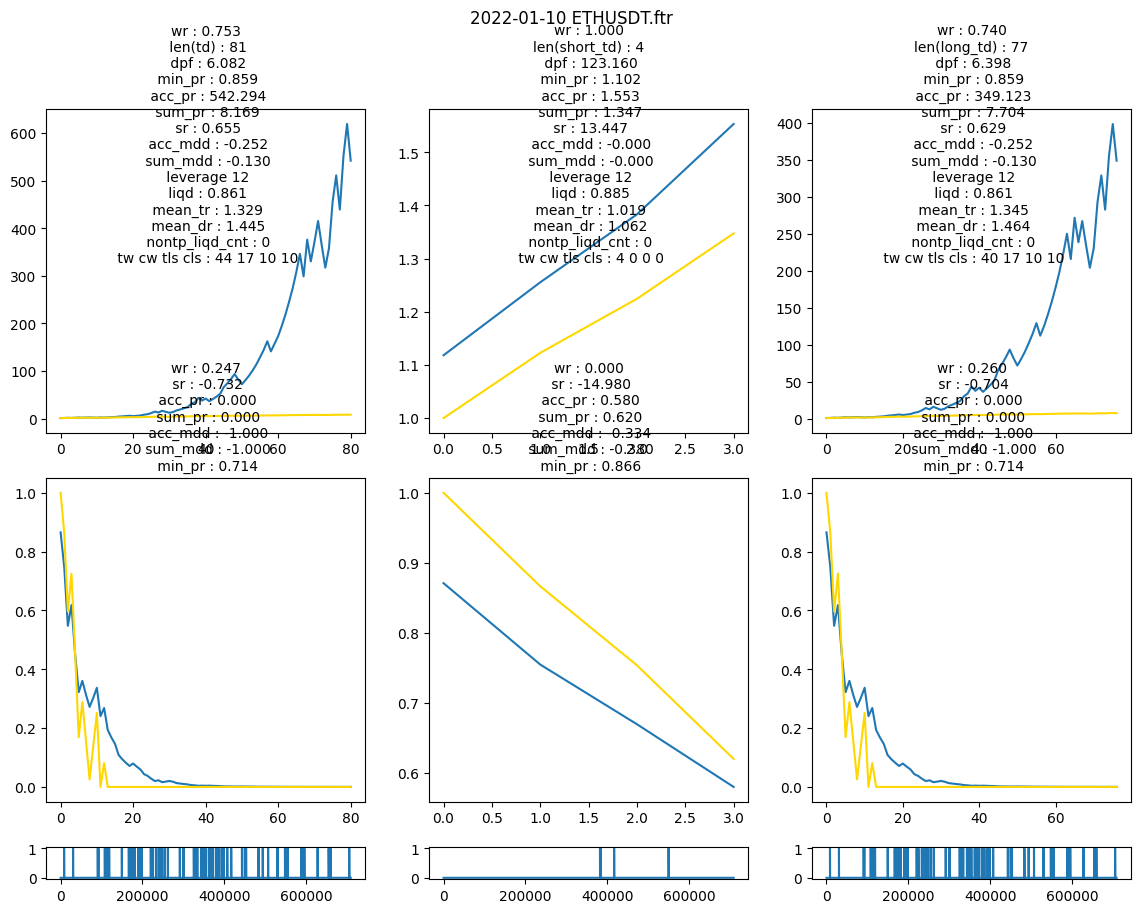

In [19]:
multi_mode = 0
strat_switch_idx = 0    # 0, 1, 2... multi_mode 가 아닌 경우 필히 작성
public_override = 0
utils_override = 0
config_override = 0  # utils_public /utils / config 으로 세분화하는게 좋을 것으로 봄

if not multi_mode:  # override 하지않는 경우에 config[0] 만을 사용하니, config[0] 에 어떤 version 을 배치할지 선택
    utils_list[0] = utils_list[strat_switch_idx]
    cfg_list[0] = cfg_list[strat_switch_idx]

if config_override:
  cfg_list[0] = config

config = cfg_list[0]  # custom base config, if use override -> set to config[0]

tp_fee, out_fee = calc_tp_out_fee(config)   # Todo -> rev_pr 때문에 일단 이곳에도 선언함

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1

# ------- plot param ------- #
fontsize = 10
show_detail = 0
title_position = (0.5, 0.5)

# ------- temp param ------- #
rsi_out_stratver = ['v7_3', '1_1']
allow_osc_touch = 0
rsi_gap = 5

early_out_tpg = 0.36

# ------- survey param ------- #
itv_num_list = [1, 3, 5, 15]

itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']

# x_val_list = np.arange(, 2.0, 0.1)     # prcn 1
x_val_list = np.arange(-0.69, -0.8, -0.01)  # prcn 2
# x_val_list = np.arange(-0.695, -0.75, -0.005)    # prcn 3
# x_val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# x_val_list = np.arange(1, 10, 1)   # prcn -1
x_val_list = np.arange(200, 180, -5)   # prcn -2

y_val_cols = ["wr", "sr", "frq", "dpf", "acc_pr", "sum_pr", "acc_mdd", "sum_mdd", "liqd", "min_pr", "tr", "dr"]
y_rev_val_cols = ["wr", "sr", "acc_pr", "sum_pr", "acc_mdd", "sum_mdd", "min_pr"]

#       local env. 에서 load_data (.ftr) 는 colab (idep) 와 동기화되기 힘들 것 -> local 은 realtime
for key in ftr_list:

    if config.trader_set.symbol in key:
        pass
    else:
        continue

    start_0 = time.time()

    res_df = pd.read_feather(os.path.join(ftr_path, key), columns=None, use_threads=True).set_index("index") # .loc[pd.to_datetime("2021-07-10 04:59:59.999000"):]
    # res_df = inter_df1
    # res_df = edited_inter_df2
    print(key, "loaded !")
    # break

    print("~ load res_df elapsed time :", time.time() - start_0)

    start_0 = time.time()

    np_timeidx = np.array(list(map(lambda x: intmin(x), res_df.index)))  # 이곳에 latency '3s'

    if public_override:
        res_df = public_indi(res_df, config, np_timeidx)
    else:
        res_df = utils_public.public_indi(res_df, config, np_timeidx)

    # -------------------- entlist rtc & tr 은 중복되는 여부에 따라 user 가 flexible coding 해야할 것 -------------------- #
    if utils_override:
        res_df = enlist_rtc(res_df, config, np_timeidx)
    else:
        for utils_, cfg_ in zip(utils_list, cfg_list):   # recursively
            res_df = utils_.enlist_rtc(res_df, cfg_, np_timeidx)
            if not multi_mode:
                break

    print("load_df ~ enlist_rtc elapsed time :", time.time() - start_0)

    survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
    short_survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
    long_survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
    rev_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)
    rev_short_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)
    rev_long_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)

    for survey_i, just_loop in enumerate(range(1)):
    # for survey_i, config.loc_set.zone.tr_thresh in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.short_spread in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.long_spread in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.dt_k in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.dc_period in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.ei_k in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.dr_error in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.bbz_itv in enumerate(itv_list):
    # for survey_i, config.loc_set.zone.gap_mply in enumerate(x_val_list):
    # for survey_i, config.loc_set.zone.ad_idx in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.tf_entry in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.candle_ratio in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.body_ratio in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.candle_ratio2 in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.body_ratio2 in enumerate(x_val_list):
    # for survey_i, config.loc_set.point.osc_band in enumerate(x_val_list):
    # for survey_i, config.loc_set.point2.ce_gap in enumerate(x_val_list):
    # for survey_i, config.tr_set.ep_gap in enumerate(x_val_list):
    # for survey_i, config.tr_set.out_gap in enumerate(x_val_list):
    # for survey_i, config.tr_set.tp_gap in enumerate(x_val_list):
    # for survey_i, config.lvrg_set.leverage in enumerate(x_val_list):
    # for survey_i, config.lvrg_set.target_pct in enumerate(x_val_list):
    # for survey_i, config.lvrg_set.target_pct in enumerate(x_val_list):
    # for survey_i, config.tp_set.decay_term in enumerate(x_val_list):
    # for survey_i, outg_dc_itv_num in enumerate(x_val_list):
    # for survey_i, exp_itv in enumerate(itv_list):
    # for survey_i, zone_dt_k in enumerate(x_val_list):
    # for survey_i, t_out_gap in enumerate(x_val_list):
    # for survey_i, zone_dc_period in enumerate(x_val_list):
    # for survey_i, early_out_tpg in enumerate(x_val_list):
    # for survey_i, ema_period in enumerate(x_val_list):

      start_0 = time.time()

      try:

          print("config.strat_version :", config.strat_version)
          print("config.loc_set.point.exp_itv :", config.loc_set.point.exp_itv)
          print("config.loc_set.point.tpg_itv1 :", config.loc_set.point.tpg_itv1)
          print("config.loc_set.point.tpg_itv0 :", config.loc_set.point.tpg_itv0)
          print("config.loc_set.point.outg_itv1 :", config.loc_set.point.outg_itv1)
          print("config.loc_set.point.outg_itv0 :", config.loc_set.point.outg_itv0)
          print("config.loc_set.point.outg_dc_period :", config.loc_set.point.outg_dc_period)
          print("-----------------------------------")
          # print("dtk_dc_itv :", dtk_dc_itv)
          # print("config.loc_set.dtk_dc_itv_num :", config.loc_set.dtk_dc_itv_num :",)
          print("config.loc_set.zone.short_spread :", config.loc_set.zone.short_spread)
          print("config.loc_set.zone.long_spread :", config.loc_set.zone.long_spread)
          print("config.loc_set.zone.tr_thresh :", config.loc_set.zone.tr_thresh)
          print("config.loc_set.zone.dtk_itv :", config.loc_set.zone.dtk_itv)
          print("config.loc_set.zone.dt_k :", config.loc_set.zone.dt_k)
          print("config.loc_set.zone.ei_k :", config.loc_set.zone.ei_k)
          print("config.loc_set.zone.dc_period :", config.loc_set.zone.dc_period)
          print("config.loc_set.zone.use_dtk_line :", config.loc_set.zone.use_dtk_line)

          print("config.loc_set.zone.zone_rejection :", config.loc_set.zone.zone_rejection)
          print("config.loc_set.zone.bbz_itv :", config.loc_set.zone.bbz_itv)
          print("config.loc_set.zone.gap_mply :", config.loc_set.zone.gap_mply)
          print("config.loc_set.zone.ad_idx :", config.loc_set.zone.ad_idx)
          print("config.loc_set.zone.zone_dt_k :", config.loc_set.zone.zone_dt_k)
          print("config.loc_set.zone.zone_dc_period :", config.loc_set.zone.zone_dc_period)
          # print("config.loc_set.open_shift :", config.loc_set.open_shift)
          print("-----------------------------------")
          # print("config.ep_set.dr_error :", config.ep_set.dr_error)
          print("config.loc_set.point.tf_entry :", config.loc_set.point.tf_entry)
          print("config.loc_set.point.htf_entry :", config.loc_set.point.htf_entry)
          print("config.loc_set.point.candle_ratio :", config.loc_set.point.candle_ratio)
          print("config.loc_set.point.body_ratio :", config.loc_set.point.body_ratio)
          print("config.loc_set.point.candle_ratio2 :", config.loc_set.point.candle_ratio2)
          print("config.loc_set.point.body_ratio2 :", config.loc_set.point.body_ratio2)
          print("config.loc_set.point.osc_band :", config.loc_set.point.osc_band)
          print("config.loc_set.point2.ce_gap :", config.loc_set.point2.ce_gap)
          print("config.tr_set.ep_gap :", config.tr_set.ep_gap)
          print("config.tr_set.tp_gap :", config.tr_set.tp_gap)
          print("config.tr_set.decay_gap :", config.tr_set.decay_gap)
          print("config.tr_set.out_gap :", config.tr_set.out_gap)
          print("config.tr_set.c_ep_gap :", config.tr_set.c_ep_gap)
          print("config.tr_set.t_out_gap :", config.tr_set.t_out_gap)
          print("-----------------------------------")
          print("config.lvrg_set.leverage :", config.lvrg_set.leverage)
          print("config.lvrg_set.static_lvrg :", config.lvrg_set.static_lvrg)
          print("config.lvrg_set.target_pct :", config.lvrg_set.target_pct)
          print("-----------------------------------")
          print("config.ep_set.entry_type :", config.ep_set.entry_type)
          print("config.tp_set.tp_type :", config.tp_set.tp_type)
          print("config.tp_set.static_tp :", config.tp_set.static_tp)
          print("config.tp_set.decay_term :", config.tp_set.decay_term)
          print("rsi_out_stratver :", rsi_out_stratver)
          print("config.out_set.use_out :", config.out_set.use_out)
          print("config.out_set.out_type :", config.out_set.out_type)

      except Exception as e:
          print(e)

      #       temp survey     #
      # if 'bb_upper_15m' in res_df.columns:
      #   res_df.drop(['bb_upper_15m', 'bb_lower_15m'], axis=1, inplace=True)
      # res_df = bb_level(res_df, '15m', config.loc_set.zone.gap_mply)

      # ema_period = 155
      # print("ema_period :", ema_period)

      # df_5T = to_htf(res_df, '5T', offset='1h')
      # df_5T['ema_5m'] = ema(df_5T['close'], ema_period)   # ema formula issue
      # res_df.drop(['ema_5m'], axis=1, inplace=True, errors='ignore')
      # res_df = res_df.join(to_lower_tf_v2(res_df, df_5T, [-1]), how='inner')

      if utils_override:
          res_df = enlist_tr(res_df, config, np_timeidx)
      else:
          for utils_, cfg_ in zip(utils_list, cfg_list):   # recursively
              res_df = utils_.enlist_tr(res_df, cfg_, np_timeidx)
              if not multi_mode:
                  break

      print("enlist_rtc ~ enlist_tr elapsed time :", time.time() - start_0)

      #       trading : 여기도 체결 결과에 대해 묘사함       #
      trade_list = []
      h_trade_list = []
      leverage_list = []
      fee_list = []
      short_fee_list = []
      long_fee_list = []
      open_list = []
      zone_list = []
      side_list = []
      strat_ver_list = []

      tp_ratio_list = []
      short_tp_ratio_list = []
      long_tp_ratio_list = []

      dr_list = []
      short_dr_list = []
      long_dr_list = []

      liqd_list = []
      short_liqd_list = []
      long_liqd_list = []

      nontp_liqd_list = []
      nontp_short_liqd_list = []
      nontp_long_liqd_list = []

      nontp_pr_list = []
      nontp_short_pr_list = []
      nontp_long_pr_list = []

      nontp_short_indexs = []
      nontp_long_indexs = []

      nontp_short_ep_list = []
      nontp_long_ep_list = []

      pr_list = []
      long_list = []
      short_list = []

      h_pr_list = []
      h_long_list = []
      h_short_list = []

      ep_tp_list = []
      h_ep_tp_list = []
      tp_state_list = []

      i = 0
      while 1:
          # for i in range(len(res_df)):

          run = 0
          open_side = None

          for utils_, cfg_ in zip(utils_list, cfg_list):

              #       entry_score     #
              if res_df['entry_{}'.format(cfg_.strat_version)][i] == cfg_.ep_set.short_entry_score:

                  #       ep_loc      #
                  if public_override:
                      res_df, open_side, zone = short_ep_loc(res_df, cfg_,
                                                          i,
                                                          np_timeidx, show_detail)
                  else:
                      res_df, open_side, zone = utils_public.short_ep_loc(res_df, cfg_,
                                                                        i,
                                                                        np_timeidx, show_detail)
                  if open_side is not None:   # 조건 만족시 바로 break
                      #       assign      #
                      config = cfg_
                      break

              #       entry_score     #
              elif res_df['entry_{}'.format(cfg_.strat_version)][i] == -cfg_.ep_set.short_entry_score:

                  #       ep_loc      #
                  if public_override:
                      res_df, open_side, zone = long_ep_loc(res_df, cfg_,
                                                              i,
                                                              np_timeidx, show_detail)
                  else:
                      res_df, open_side, zone = utils_public.long_ep_loc(res_df, cfg_,
                                                                          i,
                                                                          np_timeidx, show_detail)
                  if open_side is not None:
                      #       assign      #
                      config = cfg_
                      break

              if not multi_mode:
                  break

          if open_side is None:
              i += 1
              if i >= len(res_df):
                  break
              continue

          if open_side == utils_public.OrderSide.SELL:

              initial_i = i
              # print("short_ep_loc passed !")

              # --------------------- config 가 확정된 이후의 setting --------------------- #
              strat_version = config.strat_version

              # ------- tp / out fee calc ------- #
              tp_fee, out_fee = calc_tp_out_fee(config)

              # p_i 의 용도 모르겠음
              # if config.out_set.static_out:
              #     p_i = initial_i
              # else:
              #     p_i = i

              # ------- fee init ------- #
              if config.ep_set.entry_type == 'LIMIT':
                  fee = config.trader_set.limit_fee
              else:
                  fee = config.trader_set.market_fee

              # --------------- set partial tp --------------- #
              short_tps = [res_df['short_tp_{}'.format(strat_version)]]
              # short_tps = [short_tp2, short_tp] # org
              # short_tps = [short_tp, short_tp2]

              ep_j = initial_i
              out_j = initial_i

              # -------------- limit waiting : limit_out -------------- #

              if config.ep_set.entry_type == "LIMIT":

                  # allow_ep_in = 0 if strat_version in ['v5_2'] else 1
                  allow_ep_in = 0
                  entry_done = 0
                  entry_open = 0
                  prev_sar = None

                  # for e_j in range(i, len(res_df)): # entry_signal 이 open 기준 (해당 bar 에서 체결 가능함)
                  if i + 1 >= len(res_df):  # i should be checked if e_j starts from i+1
                      break
                  for e_j in range(i + 1, len(res_df)):  # entry signal이 close 기준 일 경우

                      if not config.ep_set.static_ep:
                          ep_j = e_j
                          out_j = e_j

                      if config.tp_set.static_tp:
                          # if config.ep_set.tpout_onexec:
                          #   tp_j = e_j
                          # else:
                          tp_j = initial_i
                      else:
                          tp_j = e_j

                          #             1. ep 설정
                      # -------------- np.inf ep -------------- #
                      # if short_ep.iloc[initial_i] == np.inf:
                      #   break

                      #     1. check ep_out     #
                      if res_df['low'].iloc[e_j] <= res_df['h_short_rtc_1_{}'.format(strat_version)].iloc[tp_j] - \
                              res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[
                                  tp_j] * config.loc_set.zone.ei_k:
                          break

                          # elif strat_version == 'v5_2':
                          # if res_df['low'].iloc[e_j] <= res_df['short_tp_{}'.format(strat_version)].iloc[tp_j]: # ep_out : tp_done
                          # # if np_timeidx[e_j] % config.loc_set.point.tf_entry == config.loc_set.point.tf_entry - 1:
                          #   break

                          # elif (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[e_j - 1] >= 50 - config.loc_set.point.osc_band) & \
                          #                  (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[e_j] < 50 - config.loc_set.point.osc_band):
                          #   break

                      # if config.loc_set.zone.c_itv_ticks != "None":

                      #   if np_timeidx[e_j] % config.loc_set.zone.c_itv_ticks == config.loc_set.zone.c_itv_ticks - 1:
                      #     break

                      #     2. ep_loc.point2
                      if public_override:
                          allow_ep_in, out_j = short_point2(res_df, config, e_j, out_j, allow_ep_in)
                      else:
                          allow_ep_in, out_j = utils_public.short_point2(res_df, config, e_j, out_j,
                                                                          allow_ep_in)  # not defined yet,

                      #     3. check ep_in       #
                      if allow_ep_in and res_df['high'].iloc[e_j] >= res_df['short_ep_{}'.format(strat_version)].iloc[
                          ep_j]:
                          entry_done = 1
                          # print("res_df['high'].iloc[e_j] :", res_df['high'].iloc[e_j])
                          # print("e_j :", e_j)

                          #     이미, e_j open 이 ep 보다 높은 경우, entry[ep_j] => -2 로 변경   #
                          if res_df['open'].iloc[e_j] >= res_df['short_ep_{}'.format(strat_version)].iloc[ep_j]:
                              entry_open = 1
                          break

                  i = e_j
                  # print("i = e_j :", i)

                  if entry_done:
                      pass

                  else:
                      i += 1
                      if i >= len(res_df):
                          break
                      continue

              # ----------------- end wait ----------------- #

              # if e_j - initial_i >= 200:
              #   print("e_j, initial_i :", e_j, initial_i)
              # print("e_j - initial_i :", e_j - initial_i)
              # print()

              open_list.append(initial_i)
              zone_list.append(zone)
              side_list.append('s')
              strat_ver_list.append(strat_version)

              #     e_j 라는 변수는 MARKET 에 있어서 정의되서는 안되는 변수임   #
              if config.ep_set.entry_type == 'MARKET':
                  # try:
                  #   ep_list = [res_df['close'].iloc[e_j]]
                  # except Exception as e:
                  #   # print('error in ep_list (initial) :', e)
                  ep_list = [res_df['close'].iloc[ep_j]]

              else:
                  if not entry_open:
                      ep_list = [res_df['short_ep_{}'.format(strat_version)].iloc[ep_j]]

                  else:
                      #   ep_j 는 항상 있음, LIMIT 인 경우 e_j 도 항상 존재함 --> dynamic_ep 여부에 따라 ep_j = e_j 가 되는 경우만 존재할 뿐임
                      #   따라서, ep_j 로 통일 가능함 (dynamic_ep 인 경우, ep_j = e_j 되어있음)
                      fee = config.trader_set.market_fee
                      ep_list = [res_df['open'].iloc[e_j]]  # --> 체결이 되는 e_j idx 기준으로 하는게 맞음

              if not config.lvrg_set.static_lvrg:

                  ep_ = ep_list[0]
                  out_ = res_df['short_out_{}'.format(strat_version)].iloc[out_j]
                  if public_override:
                      config.lvrg_set.leverage = lvrg_set(res_df, config, "SELL", ep_, out_, fee)
                  else:
                      config.lvrg_set.leverage = utils_public.lvrg_set(res_df, config, "SELL", ep_, out_, fee)

                  # -------------- leverage rejection -------------- #
                  if config.lvrg_set.leverage == None:
                      open_list.pop()
                      zone_list.pop()
                      side_list.pop()
                      strat_ver_list.pop()

                      i += 1
                      if i >= len(res_df):
                          break
                      continue

              leverage_list.append(config.lvrg_set.leverage)

              # try:
              if config.ep_set.entry_type == "MARKET":
                  ep_idx_list = [
                      ep_j]  # ep_j 는 ep_type 유관하게 존재하는 변수니까 try 에 걸어두는게 맞음 <-- # market 인데, e_j 변수가 할당된 경우 고려해야함
              else:
                  ep_idx_list = [e_j]

              out_idx_list = [out_j]

              # except Exception as e:
              #   # print('error in ep_idx_list :', e)
              #   ep_idx_list = [e_j]

              tp_list = []
              tp_idx_list = []

              partial_tp_cnt = 0
              hedge_cnt = 1

              h_ep, h_tp = None, None
              h_i, h_j = None, None

              trade_done = 0
              cross_on = 0
              out = 0
              # config.out_set.retouch

              #     Todo    #
              #      1. future_work : 상단의 retouch 와 겹침
              config.out_set.retouch = 0

              if i == len(res_df) - 1:  # if j start from i + 1
                  open_list.pop()
                  zone_list.pop()
                  side_list.pop()
              for j in range(i + 1, len(res_df)):

                  # for j in range(i, len(res_df)):

                  if config.tp_set.static_tp:
                      if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
                          tp_j = ep_j  # tpout_onexec = using dynamic_ep --> using ep_j 에 대한 이유
                      else:
                          tp_j = initial_i
                  else:
                      tp_j = j

                  if config.out_set.static_out:
                      if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
                          out_j = ep_j
                      # else:
                      #   out_j = initial_i   # --> referenced upper phase as initail_j / e_j (start of limit wait)
                  else:
                      out_j = j

                  # -------------- sub ep -------------- #
                  # if res_df['high'].iloc[j - 1] <= res_df['sar2'].iloc[j - 1] and res_df['high'].iloc[j] > res_df['sar2'].iloc[j]:

                  #   sub_ep = res_df['sar2'].iloc[j - 1]

                  #   if sub_ep < ep_list[-1]:
                  #     ep_list.append(sub_ep)
                  #     ep_idx_list.append(j)

                  # -------------- hedge only once -------------- #
                  #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
                  # if res_df['high'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
                  # if res_df['close'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
                  # if res_df['close'].iloc[j] >= res_df['minor_ST3_Up'].iloc[j] and hedge_cnt == 1:

                  #   h_ep = res_df['close'].iloc[j]
                  #   hedge_cnt -= 1
                  #   h_i = j

                  # -------------- ultimate limit tp -------------- #
                  if not config.tp_set.non_tp:

                      #               1. by price line             #
                      if config.tp_set.tp_type == 'LIMIT' or config.tp_set.tp_type == "BOTH":

                          for s_i, short_tp_ in enumerate(short_tps):

                              #     decay adjustment    #
                              #     tp_j includes dynamic_j   #
                              try:
                                  if config.tr_set.decay_gap != "None":
                                      decay_share = (j - initial_i) // config.tp_set.decay_term
                                      decay_remain = (j - initial_i) % config.tp_set.decay_term
                                      if j != initial_i and decay_remain == 0:
                                          short_tp_.iloc[tp_j] += \
                                          res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[
                                              initial_i] * config.tr_set.decay_gap * decay_share

                              except:
                                  pass

                              if res_df['low'].iloc[j] <= short_tp_.iloc[
                                  tp_j] and partial_tp_cnt == s_i:  # we use static tp now
                                  # if res_df['low'].iloc[j] <= short_tp_.iloc[j]:
                                  # if res_df['low'].iloc[j] <= short_tp_.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

                                  if s_i == len(short_tps) - 1:
                                      trade_done = 1

                                  partial_tp_cnt += 1

                                  #         dynamic tp        #
                                  # if 0:
                                  if short_tp_.iloc[j] != short_tp_.iloc[j - 1] and not config.tp_set.static_tp:

                                      #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 #
                                      # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                                      if res_df['open'].iloc[j] < short_tp_.iloc[j]:

                                          # tp = short_tp_.iloc[initial_i]
                                          tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("d-short_open {}".format(strat_version))

                                      #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 #
                                      else:

                                          # tp = short_tp_.iloc[initial_i]
                                          tp = short_tp_.iloc[j]
                                          # tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("d-short_tp {}".format(strat_version))

                                  #         static tp         #
                                  else:

                                      #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 #
                                      #   non_inversion 의 경우, short_tp 가 가능함   #

                                      # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                                      if res_df['open'].iloc[j] < short_tp_.iloc[tp_j]:

                                          # tp = short_tp_.iloc[initial_i]

                                          if config.tr_set.decay_gap != "None" and decay_remain == 0:
                                              tp = res_df['open'].iloc[
                                                  j]  # tp_j -> initial_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                                          else:
                                              tp = short_tp_.iloc[tp_j]

                                          if trade_done:
                                              tp_state_list.append("s-short_tp {}".format(strat_version))

                                      #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 #
                                      else:

                                          # tp = short_tp_.iloc[initial_i]
                                          tp = short_tp_.iloc[tp_j]

                                          # tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("s-short_tp {}".format(strat_version))

                                  tp_list.append(tp)
                                  tp_idx_list.append(j)
                                  fee += config.trader_set.limit_fee

                      #           2. by signal        #
                      if config.tp_set.tp_type == 'MARKET' or (config.tp_set.tp_type == "BOTH" and not trade_done):

                          market_tp = 0

                          # -------------- sar tp -------------- #
                          # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
                          #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
                          #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

                          #       inversion     #
                          # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
                          #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
                          #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):

                          # ----------- st short ----------- #
                          # if res_df['close'].iloc[j] <= res_df['short_tp'].iloc[tp_j]:

                          # -------------- sar pb tp -------------- #
                          # if res_df['low'].iloc[j] <= res_df['short_tp'].iloc[initial_i]:

                          # -------------- st tp -------------- #
                          # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:

                          # -------------- fisher tp -------------- #
                          # if entry[j] == 1:

                          # -------------- timestamp -------------- #
                          if config.tp_set.time_tp:
                              if np_timeidx[
                                  j] % config.loc_set.zone.c_itv_ticks == config.loc_set.zone.c_itv_ticks - 1 and \
                                      j - initial_i >= config.loc_set.zone.c_itv_ticks:
                                  market_tp = 1

                                  # -------------- rsi -------------- #
                          if strat_version in rsi_out_stratver:
                              if (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                      j - 1] >= 50 - config.loc_set.point.osc_band) & \
                                      (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                            j] < 50 - config.loc_set.point.osc_band):
                                  # if (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j - 1] <= 50 - config.loc_set.point.osc_band) & \
                                  #                  (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j] > 50 - config.loc_set.point.osc_band):
                                  market_tp = 1

                              # -------------- cci -------------- #
                              # if (res_df['cci_%s' % config.loc_set.point.exp_itv].iloc[j - 1] >= -config.loc_set.point.osc_band) & \
                              #                  (res_df['cci_%s' % config.loc_set.point.exp_itv].iloc[j] < -config.loc_set.point.osc_band):
                              #   market_tp = 1

                          # ---------------------------- early out ---------------------------- #

                          # #         rsi slight touch        #
                          if allow_osc_touch:
                              if (np.min(res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                          initial_i:j]) < 50 - config.loc_set.point.osc_band + rsi_gap) & \
                                      (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j] >= 50):
                                  market_tp = 1

                                  #           tp early out          #
                          # # if (np.min(res_df['low'].iloc[e_j:j]) < res_df['short_tp'].iloc[tp_j]) & \
                          # if (np.min(res_df['low'].iloc[e_j:j]) < res_df['h_short_rtc_1'].iloc[tp_j] - res_df['h_short_rtc_gap'].iloc[tp_j] * early_out_tpg) & \
                          #   (res_df['close'].iloc[j] >= res_df['short_ep'].iloc[ep_j]):
                          #   market_tp = 1

                          # if strat_version == "v7":
                          #   if res_df['dc_upper_1m'].iloc[j] > res_df['dc_upper_5m'].iloc[j]:
                          #     market_tp = 1

                          #         bb_upper early out        # --> cross_on 기능은 ide latency 개선 여부에 해당되지 않음
                          if strat_version in ['v5_2']:
                              if res_df['close'].iloc[j] < res_df['bb_lower_5m'].iloc[j] < res_df['close'].iloc[
                                  j - 1]:
                                  cross_on = 1

                              if cross_on == 1 and res_df['close'].iloc[j] > res_df['bb_upper_5m'].iloc[j] > \
                                      res_df['close'].iloc[j - 1]:
                                  market_tp = 1

                          if market_tp:

                              tp = res_df['close'].iloc[j]
                              # tp = res_df['open'].iloc[j]
                              trade_done = 1

                              if trade_done:
                                  tp_state_list.append("short close tp")

                              tp_list.append(tp)
                              tp_idx_list.append(j)
                              fee += config.trader_set.market_fee

                  # -------------- out -------------- #
                  if not trade_done and config.out_set.use_out and j != len(res_df) - 1:

                      # -------------- macd -------------- #
                      # if res_df['macd_hist3'].iloc[j] > 0:  #  macd out
                      # if res_df['macd_hist3'].iloc[i] < 0 and res_df['macd_hist3'].iloc[j] > 0:

                      # -------------- st config.out_set.retouch -------------- #
                      # out = 1 상태면 동일 tick 에서 config.out_set.retouch 를 조사할 거기 때문에, 먼저 검사함
                      # 그리고, out 기준이 close 라 이게 맞음
                      # close 가 short_out 보다 올라가있는 상태일테니 low 를 조사하는게 맞음
                      # if out and res_df['low'].iloc[j] <= short_out.iloc[out_j]:
                      #   config.out_set.retouch = 1

                      # ------- 일정시간 이상, dynamic_out 적용 ------ #
                      try:
                          if j - out_idx >= config.out_set.retouch_out_period:
                              static_short_out = res_df['short_out_{}'.format(strat_version)].iloc[j]

                      except Exception as e:
                          pass

                          # ------- static out ------ #
                      try:
                          if out and res_df['low'].iloc[j] <= static_short_out:
                              config.out_set.retouch = 1
                      except Exception as e:
                          pass

                          # ------- config.out_set.retouch out ------ #
                      # if out and res_df['low'].iloc[j] <= short_out2.iloc[out_j]:
                      #   config.out_set.retouch = 1

                      # -------------- st -------------- #
                      # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:
                      # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j]:
                      # if res_df['close'].iloc[j] > upper_middle.iloc[j]:
                      # if res_df['close'].iloc[j] > res_df['minor_ST1_Up'].iloc[j]:
                      if out == 0:
                          if config.out_set.hl_out:
                              if res_df['high'].iloc[j] >= res_df['short_out_{}'.format(strat_version)].iloc[
                                  out_j]:  # check out only once
                                  out = 1

                          else:
                              if res_df['close'].iloc[j] >= res_df['short_out_{}'.format(strat_version)].iloc[
                                  out_j]:  # check out only once
                                  out = 1

                          # out_idx = j
                          # static_short_out = short_out.iloc[out_j]
                          # if config.out_set.second_out:
                          # static_short_out = short_out.iloc[out_j] + res_df['st_gap'].iloc[out_j] * config.out_set.second_out_gap

                      # if out == 0 and res_df['high'].iloc[j] >= short_out.iloc[out_j]: # check out only once
                      #   out = 1

                      # -------------- sma -------------- #
                      # if res_df['close'].iloc[j] > res_df[sma].iloc[j]:

                      # -------------- sar -------------- #
                      # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j] \
                      #   or res_df['sar2'].iloc[j] <= res_df['high'].iloc[j]:
                      # if res_df['close'].iloc[j] > short_out.iloc[initial_i]: # or \
                      #   out = 1
                      # res_df['sar2_uptrend'].iloc[j] == 1: # or \

                      # if res_df['sar2_uptrend'].iloc[j] == 1:

                      #   if prev_sar is None:
                      #     prev_sar = res_df['sar2'].iloc[j - 1]

                      #   if res_df['close'].iloc[j] > prev_sar:
                      #     out = 1

                      # else:
                      #   if res_df['close'].iloc[j] > res_df['sar2'].iloc[j]:
                      #     out = 1

                      # -------------- hl -------------- #
                      # if res_df['close'].iloc[j] > short_out.iloc[tp_j]:

                      # -------------- stoch -------------- #
                      # if res_df['stoch'].iloc[j - 2] >= res_df['stoch'].iloc[j - 1] and \
                      #   res_df['stoch'].iloc[j - 1] < res_df['stoch'].iloc[j] and \
                      #   res_df['stoch'].iloc[j - 1] <= stoch_lower:
                      #   out = 1

                      # config.out_set.retouch 1 경우, config.out_set.retouch 조건도 있어야함
                      if out:
                          if config.out_set.retouch:
                              if config.out_set.retouch:
                                  pass
                              else:
                                  continue

                          else:
                              pass

                          if config.out_set.price_restoration:
                              tp = res_df['short_out_{}'.format(strat_version)].iloc[out_j]
                              if config.out_set.second_out:
                                  tp = res_df['short_out2_{}'.format(strat_version)].iloc[out_j]

                              # if res_df['close'].iloc[j] > tp: # 이 경우를 protect 하는건 insane 임
                              #   tp = res_df['close'].iloc[j]

                          else:

                              if res_df['open'].iloc[j] >= res_df['short_out_{}'.format(strat_version)].iloc[out_j]:
                                  tp = res_df['open'].iloc[j]
                              else:
                                  if config.out_set.hl_out:
                                      tp = res_df['short_out_{}'.format(strat_version)].iloc[out_j]
                                  else:
                                      tp = res_df['close'].iloc[j]

                              # if not config.out_set.static_out:
                              #   if res_df['open'].iloc[j] >= res_df['short_out_{}'.format(strat_version)].iloc[out_j]: # close 기준이라 이런 조건을 못씀, 차라리 j 를 i 부터 시작
                              #     tp = res_df['open'].iloc[j]
                              #   else:
                              #     tp = res_df['close'].iloc[j]

                              # else:
                              #   tp = res_df['close'].iloc[j]

                          if config.out_set.retouch:  # out 과 open 비교
                              if config.out_set.second_out:
                                  if res_df['open'].iloc[j] <= res_df['short_out2_{}'.format(strat_version)].iloc[
                                      out_j]:
                                      tp = res_df['open'].iloc[j]
                              else:
                                  if res_df['open'].iloc[j] <= res_df['short_out_{}'.format(strat_version)].iloc[
                                      out_j]:
                                      tp = res_df['open'].iloc[j]

                              try:  # static_short_out 인 경우, open 도 고려한 tp set
                                  if res_df['open'].iloc[j] <= static_short_out:
                                      tp = res_df['open'].iloc[j]
                                  else:
                                      tp = static_short_out
                              except Exception as e:
                                  pass

                          trade_done = 1
                          tp_state_list.append("short close_out {}".format(strat_version))

                          tp_list.append(tp)
                          tp_idx_list.append(j)
                          fee += config.trader_set.market_fee

                  # -------------- non tp -------------- #
                  if j == len(res_df) - 1:
                      trade_done = 1
                      tp = res_df['close'].iloc[j]
                      tp_list.append(tp)
                      tp_idx_list.append(j)
                      fee += config.trader_set.market_fee

                  # -------------- append trade data -------------- #
                  if trade_done:

                      # --------------- tp_ratio info --------------- #
                      #         Todo        #
                      #          short_out 에 대한 정보는 존재함,
                      #          short_tp 에 대한 정보는 존재함,
                      #       => initial_i 기준으로 ,dynamic | static set 을 tp 와 out 에 각각 적용
                      #          config.lvrg_set.leverage 는 initial_i 기준으로 적용되니까
                      #          적용된 tp & out 으로 abs((tp - ep) / (ep - out)) 계산
                      try:
                          if config.out_set.use_out:
                              done_tp = res_df['short_tp_{}'.format(strat_version)].iloc[tp_j]
                              done_out = res_df['short_out_{}'.format(strat_version)].iloc[out_j]

                              if done_out <= ep_list[0]:  # loss > 1
                                  dr = np.nan
                                  tp_ratio = np.nan
                              else:
                                  dr = ((ep_list[0] - done_tp) / (done_out - ep_list[0]))
                                  tp_ratio = ((ep_list[0] - done_tp - tp_fee * ep_list[0]) / (
                                              done_out - ep_list[0] + out_fee * ep_list[0]))

                          else:
                              dr = np.nan
                              tp_ratio = np.nan


                      except Exception as e:
                          dr = np.nan
                          tp_ratio = np.nan

                      tp_ratio_list.append(tp_ratio)
                      short_tp_ratio_list.append(tp_ratio)
                      dr_list.append(dr)
                      short_dr_list.append(dr)

                      # -------------------- partial tp -------------------- #
                      #        1. len(tp_list) 에 대응하는 qty_list 를 만들어야함    #
                      #        2. temp_pr_list 를 만들어 총합 + 1 을 pr_list 에 저장      #
                      #        2-1. temp_pr = sum((ep / tp_list[i] - fee - 1) * qty_list[i])   #
                      #        3. temp_pr_list 의 첫 tp 에는 r_qty 를 할당함        #
                      qty_list = []
                      temp_pr_list = []
                      r_qty = 1
                      for q_i in range(len(tp_list) - 1, -1, -1):

                          if len(tp_list) == 1:
                              temp_qty = r_qty
                          else:
                              if q_i != 0:
                                  temp_qty = r_qty / config.tp_set.partial_qty_divider
                              else:
                                  temp_qty = r_qty

                          temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty * config.lvrg_set.leverage
                          # temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty
                          r_qty -= temp_qty

                          temp_pr_list.append(temp_pr)
                          qty_list.append(temp_qty)

                      # if len(temp_pr_list) == 1:
                      #   print("qty_list :", qty_list)
                      #   print("temp_pr_list :", temp_pr_list)

                      temp_pr = sum(temp_pr_list) + 1

                      # -------------------- sub ep -> pr calc -------------------- #
                      if len(ep_list) > 1:

                          p_ep_pr = []
                          for sub_ep_ in ep_list:
                              sub_pr = (sub_ep_ / tp - fee - 1) * config.lvrg_set.leverage
                              p_ep_pr.append(sub_pr)

                          temp_pr = sum(p_ep_pr) + 1

                          print("temp_pr :", temp_pr)

                      # ------------ hedge + non_hedge pr summation ------------ #
                      #         hedge pr direction is opposite to the origin       #
                      hedge_pr = 1
                      if hedge_cnt == 0:
                          #       hedge tp      #
                          h_tp = res_df['close'].iloc[j]
                          hedge_pr = (h_tp / h_ep - fee - 1) * config.lvrg_set.leverage  # hedge long
                          temp_pr += hedge_pr
                          h_j = j

                      # hh = max(res_df['high'].iloc[i:j + 1])
                      hh = max(res_df['high'].iloc[i:j])  # pos. 정리하기 바로 직전까지
                      short_liq = (ep_list[0] / hh - fee - 1) * config.lvrg_set.leverage + 1

                      if j != len(res_df) - 1:

                          # ep_tp_list.append((ep, tp_list))
                          ep_tp_list.append((ep_list, tp_list))
                          # trade_list.append([initial_i, i, j])
                          # trade_list.append((ep_idx_list, tp_idx_list))
                          trade_list.append((ep_idx_list, out_idx_list, tp_idx_list))

                          liqd_list.append(short_liq)
                          short_liqd_list.append(short_liq)

                          h_ep_tp_list.append(
                              (h_ep, h_tp))  # hedge 도 ep_tp_list 처럼 변경해주어야하는데 아직 안건드림, 딱히 사용할 일이 없어보여
                          h_trade_list.append([initial_i, h_i, h_j])

                          pr_list.append(temp_pr)
                          fee_list.append(fee)
                          short_list.append(temp_pr)
                          short_fee_list.append(fee)

                          h_pr_list.append(hedge_pr)
                          h_short_list.append(hedge_pr)

                          i = j
                          break

                      else:

                          # ep_tp_list.append((ep_list, tp_list))
                          # trade_list.append((ep_idx_list, tp_idx_list))
                          # plot_check 때문에, pr_list 까지 하게되면 acc_pr eval 이 꼬이게댐

                          # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
                          open_list.pop()
                          zone_list.pop()
                          side_list.pop()
                          strat_ver_list.pop()

                          #         tp 미체결 survey        #
                          nontp_liqd_list.append(short_liq)
                          nontp_short_liqd_list.append(short_liq)
                          nontp_short_indexs.append(i)
                          nontp_short_ep_list.append(ep_list[0])

                          nontp_short_pr = (ep_list[0] / tp - fee - 1) * config.lvrg_set.leverage + 1
                          nontp_pr_list.append(nontp_short_pr)
                          nontp_short_pr_list.append(nontp_short_pr)


          #                  long  phase                #
          elif open_side == utils_public.OrderSide.BUY:

              initial_i = i
              # print("long_ep_loc passed !")

              strat_version = config.strat_version

              # ------- tp / out fee calc ------- #
              tp_fee, out_fee = calc_tp_out_fee(config)

              # ------- fee init ------- #
              if config.ep_set.entry_type == 'LIMIT':
                  fee = config.trader_set.limit_fee
              else:
                  fee = config.trader_set.market_fee

              # --------------- set partial tp --------------- #
              long_tps = [res_df['long_tp_{}'.format(strat_version)]]
              # long_tps = [long_tp2, long_tp]
              # long_tps = [long_tp, long_tp2]
              # print("i after long_ep_loc :", i)

              # if config.out_set.static_out:
              #     p_i = initial_i
              # else:
              #     p_i = i

              ep_j = initial_i
              out_j = initial_i

              # -------------- limit waiting const. -------------- #
              if config.ep_set.entry_type == "LIMIT":

                  # allow_ep_in = 0 if strat_version in ['v5_2'] else 1
                  allow_ep_in = 0
                  entry_done = 0
                  entry_open = 0
                  prev_sar = None

                  # for e_j in range(i, len(res_df)):

                  if i + 1 >= len(res_df):  # i should be checked if e_j starts from i+1
                      break
                  for e_j in range(i + 1, len(res_df)):  # entry 가 close 기준일 경우 사용 (open 기준일 경우 i 부터 시작해도 무방함)

                      if not config.ep_set.static_ep:
                          ep_j = e_j
                          out_j = e_j

                      if config.tp_set.static_tp:
                          # if config.ep_set.tpout_onexec:
                          #   tp_j = e_j
                          # else:
                          tp_j = initial_i
                      else:
                          tp_j = e_j

                          #          np.inf ep         #
                      # if long_ep.iloc[initial_i] == np.inf:
                      #   break

                      #     1. check ep_out     #
                      if res_df['high'].iloc[e_j] >= res_df['h_long_rtc_1_{}'.format(strat_version)].iloc[tp_j] + \
                              res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[tp_j] * config.loc_set.zone.ei_k:
                          # if res_df['high'].iloc[e_j] >= res_df['long_tp_{}'.format(strat_version)].iloc[tp_j]:
                          # if np_timeidx[e_j] % config.loc_set.point.tf_entry == config.loc_set.point.tf_entry - 1:
                          break

                          # elif (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[e_j - 1] <= 50 + config.loc_set.point.osc_band) & \
                          #                  (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[e_j] > 50 + config.loc_set.point.osc_band):
                          #   break

                      # if config.loc_set.zone.c_itv_ticks != "None":

                      #   if np_timeidx[e_j] % config.loc_set.zone.c_itv_ticks == config.loc_set.zone.c_itv_ticks - 1:
                      #     break

                      #     2. ep_loc.point2
                      if public_override:
                          allow_ep_in, out_j = long_point2(res_df, config, e_j, out_j, allow_ep_in)
                      else:
                          allow_ep_in, out_j = utils_public.long_point2(res_df, config, e_j, out_j,
                                                                        allow_ep_in)  # not defined yet,

                      #     3. check ep_in      #
                      if allow_ep_in and res_df['low'].iloc[e_j] <= res_df['long_ep_{}'.format(strat_version)].iloc[
                          ep_j]:
                          entry_done = 1
                          # print("e_j :", e_j)

                          #     이미, e_j open 이 ep 보다 낮은 경우, entry[initial_i] => -2 로 변경   #
                          if res_df['open'].iloc[e_j] <= res_df['long_ep_{}'.format(strat_version)].iloc[ep_j]:
                              entry_open = 1

                          break

                  i = e_j
                  # print("i = e_j :", i)

                  if entry_done:
                      pass
                      # print("i, entry_done :", i, entry_done)

                  else:
                      i += 1
                      if i >= len(res_df):
                          # print("i :", i)
                          break

                      # print("i in continue :", i)
                      continue

              # ---------------- end wait ---------------- #
              # if e_j - initial_i >= 200:
              #   print("e_j, initial_i :", e_j, initial_i)

              # print(i)

              open_list.append(initial_i)
              zone_list.append(zone)
              side_list.append('l')
              strat_ver_list.append(strat_version)

              if config.ep_set.entry_type == 'MARKET':
                  ep_list = [res_df['close'].iloc[ep_j]]
              else:
                  if not entry_open:
                      ep_list = [res_df['long_ep_{}'.format(strat_version)].iloc[
                                      ep_j]]  # dynamic_ep 인 경우에도 e_j 가 ep_j 로 대응되기 때문에 ep_j 만 사용해도 무관
                  else:
                      # try:
                      #   ep_list = [res_df['open'].iloc[e_j]]
                      # except Exception as e:
                      fee = config.trader_set.market_fee
                      ep_list = [res_df['open'].iloc[e_j]]  # --> 체결이 되는 e_j idx 기준으로 하는게 맞음

              if not config.lvrg_set.static_lvrg:

                  ep_ = ep_list[0]
                  out_ = res_df['long_out_{}'.format(strat_version)].iloc[out_j]
                  if public_override:
                      config.lvrg_set.leverage = lvrg_set(res_df, config, "BUY", ep_, out_, fee)
                  else:
                      config.lvrg_set.leverage = utils_public.lvrg_set(res_df, config, "BUY", ep_, out_, fee)

                  # -------------- leverage rejection -------------- #
                  if config.lvrg_set.leverage == None:
                      open_list.pop()
                      zone_list.pop()
                      side_list.pop()
                      strat_ver_list.pop()

                      i += 1
                      if i >= len(res_df):
                          break
                      continue

              leverage_list.append(config.lvrg_set.leverage)

              if config.ep_set.entry_type == "MARKET":
                  ep_idx_list = [ep_j]
              else:
                  ep_idx_list = [e_j]

              out_idx_list = [out_j]

              tp_list = []
              tp_idx_list = []

              partial_tp_cnt = 0
              hedge_cnt = 1

              h_ep, h_tp = None, None
              h_i, h_j = None, None

              trade_done = 0
              cross_on = 0
              out = 0
              config.out_set.retouch = 0

              if i == len(res_df) - 1:  # if j start from i + 1
                  open_list.pop()
                  zone_list.pop()
                  side_list.pop()
                  strat_ver_list.pop()

              for j in range(i + 1, len(res_df)):

                  # for j in range(i, len(res_df)):

                  if config.tp_set.static_tp:
                      if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
                          tp_j = ep_j
                      else:
                          tp_j = initial_i
                  else:
                      tp_j = j

                  if config.out_set.static_out:
                      if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
                          out_j = ep_j
                      # else:
                      #   out_j = initial_i
                  else:
                      out_j = j

                      # -------------- hedge only once -------------- #
                  #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
                  # if res_df['low'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
                  # if res_df['close'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
                  # if res_df['close'].iloc[j] <= res_df['minor_ST3_Down'].iloc[j] and hedge_cnt == 1:

                  #   h_ep = res_df['close'].iloc[j]
                  #   hedge_cnt -= 1
                  #   h_i = j

                  # -------------- sub ep -------------- #
                  # if res_df['low'].iloc[j - 1] >= res_df['sar2'].iloc[j - 1] and res_df['low'].iloc[j] < res_df['sar2'].iloc[j]:

                  #   sub_ep = res_df['sar2'].iloc[j - 1]

                  #   if sub_ep > ep_list[-1]:
                  #     ep_list.append(sub_ep)
                  #     ep_idx_list.append(j)

                  # -------------- ultimate tp -------------- #
                  if not config.tp_set.non_tp:
                      #            1. by level          #
                      if config.tp_set.tp_type == "LIMIT" or config.tp_set.tp_type == "BOTH":

                          for l_i, long_tp_ in enumerate(long_tps):

                              #     decay adjustment    #
                              #     tp_j includes dynamic_j   #
                              try:
                                  if config.tr_set.decay_gap != "None":
                                      decay_share = (j - initial_i) // config.tp_set.decay_term
                                      decay_remain = (j - initial_i) % config.tp_set.decay_term
                                      if j != initial_i and decay_remain == 0:
                                          long_tp_.iloc[tp_j] -= \
                                          res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[
                                              initial_i] * config.tr_set.decay_gap * decay_share

                              except:
                                  pass

                              if res_df['high'].iloc[j] >= long_tp_.iloc[tp_j] and partial_tp_cnt == l_i:
                                  # if res_df['high'].iloc[j] >= long_tp.iloc[j]:

                                  if l_i == len(long_tps) - 1:
                                      trade_done = 1

                                  partial_tp_cnt += 1

                                  #         dynamic tp        #
                                  # if 0:
                                  if long_tp_.iloc[j] != long_tp_.iloc[j - 1] and not config.tp_set.static_tp:

                                      #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 #
                                      # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:
                                      if res_df['open'].iloc[j] >= long_tp_.iloc[j]:

                                          # tp = long_tp_.iloc[initial_i]
                                          tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("d-long_open {}".format(strat_version))


                                      #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 #
                                      else:

                                          # tp = long_tp_.iloc[initial_i]
                                          tp = long_tp_.iloc[j]
                                          # tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("d-long_tp {}".format(strat_version))

                                  #         static tp         #
                                  else:

                                      #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 #
                                      #   non_inversion 의 경우, short_tp 가 가능함   #

                                      if res_df['open'].iloc[j] >= long_tp_.iloc[tp_j]:
                                          # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:

                                          # tp = long_tp_.iloc[initial_i]

                                          if config.tr_set.decay_gap != "None" and decay_remain == 0:
                                              tp = res_df['open'].iloc[j]
                                          else:
                                              tp = long_tp_.iloc[tp_j]

                                          if trade_done:
                                              tp_state_list.append("s-long_tp {}".format(strat_version))


                                      #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 #
                                      else:

                                          # tp = long_tp_.iloc[initial_i]
                                          tp = long_tp_.iloc[tp_j]

                                          # tp = res_df['open'].iloc[j]

                                          if trade_done:
                                              tp_state_list.append("s-long_tp {}".format(strat_version))

                                  tp_list.append(tp)
                                  tp_idx_list.append(j)
                                  fee += config.trader_set.limit_fee

                      #           2. by time        #
                      if config.tp_set.tp_type == 'MARKET' or (config.tp_set.tp_type == "BOTH" and not trade_done):

                          market_tp = 0

                          # -------------- sar tp -------------- #
                          # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
                          #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
                          #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):

                          #       inversion     #
                          # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
                          #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
                          #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

                          # ----------- st long ----------- #
                          # if res_df['close'].iloc[j] >= res_df['long_tp'].iloc[tp_j]:

                          # -------------- sar pb tp -------------- #
                          # if res_df['high'].iloc[j] >= res_df['long_tp'].iloc[initial_i]:

                          # -------------- st tp -------------- #
                          # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:

                          # -------------- fisher tp -------------- #
                          # if entry[j] == -1:

                          # -------------- timestamp -------------- #
                          if config.tp_set.time_tp:
                              if np_timeidx[
                                  j] % config.loc_set.zone.c_itv_ticks == config.loc_set.zone.c_itv_ticks - 1 and \
                                      j - initial_i >= config.loc_set.zone.c_itv_ticks:
                                  market_tp = 1

                          # -------------- rsi -------------- #
                          if strat_version in rsi_out_stratver:
                              if (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                      j - 1] <= 50 + config.loc_set.point.osc_band) & \
                                      (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                            j] > 50 + config.loc_set.point.osc_band):
                                  # if (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j - 1] >= 50 + config.loc_set.point.osc_band) & \
                                  #                  (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j] < 50 + config.loc_set.point.osc_band):
                                  market_tp = 1

                              # -------------- cci -------------- #
                              # if (res_df['cci_%s' % config.loc_set.point.exp_itv].iloc[j - 1] <= config.loc_set.point.osc_band) & \
                              #                  (res_df['cci_%s' % config.loc_set.point.exp_itv].iloc[j] > config.loc_set.point.osc_band):
                              #   market_tp = 1

                          # ---------------------------- early out phase ---------------------------- #

                          #        osc slight touch     #
                          if allow_osc_touch:
                              if (np.max(res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[
                                          initial_i:j]) > 50 + config.loc_set.point.osc_band - rsi_gap) & \
                                      (res_df['rsi_%s' % config.loc_set.point.exp_itv].iloc[j] <= 50):
                                  market_tp = 1

                          #         tp early out        #
                          # # if (np.max(res_df['high'].iloc[e_j:j]) > res_df['long_tp'].iloc[tp_j]) & \
                          # if (np.max(res_df['high'].iloc[e_j:j]) > res_df['h_long_rtc_1'].iloc[tp_j] + res_df['h_long_rtc_gap'].iloc[tp_j] * early_out_tpg) & \
                          #   (res_df['close'].iloc[j] <= res_df['long_ep'].iloc[ep_j]):
                          #   market_tp = 1

                          # if strat_version == "v7":
                          #   if res_df['dc_lower_1m'].iloc[j] < res_df['dc_lower_5m'].iloc[j]:
                          #     market_tp = 1

                          #         bb_upper early out        #
                          if strat_version in ['v5_2']:
                              if res_df['close'].iloc[j] > res_df['bb_upper_5m'].iloc[j] > res_df['close'].iloc[
                                  j - 1]:
                                  cross_on = 1

                              if cross_on == 1 and res_df['close'].iloc[j] < res_df['bb_lower_5m'].iloc[j] < \
                                      res_df['close'].iloc[j - 1]:
                                  market_tp = 1

                          if market_tp:

                              tp = res_df['close'].iloc[j]
                              # tp = res_df['open'].iloc[j]
                              trade_done = 1

                              if trade_done:
                                  tp_state_list.append("long close tp {}".format(strat_version))
                                  # print("early_out passed !")

                              tp_list.append(tp)
                              tp_idx_list.append(j)
                              fee += config.trader_set.market_fee

                  # -------------- out -------------- #
                  if not trade_done and config.out_set.use_out and j != len(res_df) - 1:

                      # -------------- macd -------------- #
                      # if res_df['macd_hist3'].iloc[j] < 0:
                      # # if res_df['macd_hist3'].iloc[i] > 0 and res_df['macd_hist3'].iloc[j] < 0:

                      # -------------- st config.out_set.retouch -------------- #
                      # out = 1 상태면 동일 tick 에서 config.out_set.retouch 를 조사할 거기 때문에, 먼저 검사함
                      # 그리고, out 기준이 close 라 이게 맞음
                      # close 가 long_out 보다 내려가있는 상태일테니 high 를 조사하는게 맞음
                      # if out and res_df['high'].iloc[j] >= long_out.iloc[out_j]:
                      #   config.out_set.retouch = 1

                      # ------- 일정시간 이상, dynamic_out 적용 ------ #
                      try:
                          if j - out_idx >= config.out_set.retouch_out_period:
                              static_long_out = res_df['long_out_{}'.format(strat_version)].iloc[j]

                      except Exception as e:
                          pass

                          # ------- static out ------ #
                      try:
                          if out and res_df['high'].iloc[j] >= static_long_out:
                              config.out_set.retouch = 1
                      except Exception as e:
                          pass

                          # ------- config.out_set.retouch out ------ #
                      # if out and res_df['high'].iloc[j] >= long_out2.iloc[out_j]:
                      #   config.out_set.retouch = 1

                      # -------------- st -------------- #
                      # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:
                      # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j]:
                      # if res_df['close'].iloc[j] < lower_middle.iloc[j]:
                      # if res_df['close'].iloc[j] < res_df['minor_ST1_Down'].iloc[j]:
                      if out == 0:
                          if config.out_set.hl_out:
                              if res_df['low'].iloc[j] <= res_df['long_out_{}'.format(strat_version)].iloc[
                                  out_j]:  # check out only once
                                  out = 1

                          else:
                              if res_df['close'].iloc[j] <= res_df['long_out_{}'.format(strat_version)].iloc[
                                  out_j]:  # check out only once
                                  out = 1

                          # out_idx = j
                          # static_long_out = long_out.iloc[out_j]
                          # if config.out_set.second_out:
                          # static_long_out = long_out.iloc[out_j] - res_df['st_gap'].iloc[out_j] * config.out_set.second_out_gap

                      # if out == 0 and res_df['low'].iloc[j] <= long_out.iloc[out_j]: # check out only once
                      #   out = 1

                      # -------------- sma -------------- #
                      # if res_df['close'].iloc[j] < res_df[sma].iloc[j]:

                      # -------------- sar -------------- #
                      # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j] \
                      #   or res_df['sar2'].iloc[j] >= res_df['low'].iloc[j]:
                      # if res_df['close'].iloc[j] < long_out.iloc[initial_i]: # or \
                      #   #  res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
                      #   #  res_df['sar2_uptrend'].iloc[j] == 0 or \
                      #   out = 1

                      # if res_df['sar2_uptrend'].iloc[j] == 0:

                      #     if prev_sar is None:
                      #       prev_sar = res_df['sar2'].iloc[j - 1]

                      #     if res_df['close'].iloc[j] < prev_sar:
                      #       out = 1

                      # else:
                      #   if res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
                      #     out = 1

                      # -------------- hl -------------- #
                      # if res_df['close'].iloc[j] < long_out.iloc[tp_j]:

                      # -------------- stoch -------------- #
                      # if res_df['stoch'].iloc[j - 2] <= res_df['stoch'].iloc[j - 1] and \
                      #   res_df['stoch'].iloc[j - 1] > res_df['stoch'].iloc[j] and \
                      #   res_df['stoch'].iloc[j - 1] >= stoch_upper:
                      #   out = 1

                      # config.out_set.retouch 1 경우, config.out_set.retouch 조건도 있어야함
                      if out:
                          if config.out_set.retouch:
                              if config.out_set.retouch:
                                  pass
                              else:
                                  continue

                          else:
                              pass

                          if config.out_set.price_restoration:
                              tp = res_df['long_out_{}'.format(strat_version)].iloc[out_j]
                              if config.out_set.second_out:
                                  tp = res_df['long_out2_{}'.format(strat_version)].iloc[out_j]

                              # if res_df['close'].iloc[j] < tp: # 이 경우를 protect 하는건 insane 임
                              # # if res_df['high'].iloc[j] < tp: # --> config.out_set.hl_out 사용시 이 조건은 valid 함
                              #   tp = res_df['close'].iloc[j]

                          else:

                              if res_df['open'].iloc[j] <= res_df['long_out_{}'.format(strat_version)].iloc[out_j]:
                                  tp = res_df['open'].iloc[j]
                              else:
                                  if config.out_set.hl_out:
                                      tp = res_df['long_out_{}'.format(strat_version)].iloc[out_j]
                                  else:
                                      tp = res_df['close'].iloc[j]

                              # if not config.out_set.static_out:
                              #   if res_df['open'].iloc[j] <= res_df['long_out'].iloc[out_j]: # dynamic close out 의 open 고려
                              #     tp = res_df['open'].iloc[j]
                              #   else:
                              #     tp = res_df['close'].iloc[j]

                              # else:
                              #   tp = res_df['close'].iloc[j]

                          if config.out_set.retouch:  # out 과 open 비교
                              if config.out_set.second_out:  # long_out = sell
                                  # config.out_set.second_out 은 기본적으로 limit 이라 이 구조가 가능함
                                  if res_df['open'].iloc[j] >= res_df['long_out2_{}'.format(strat_version)].iloc[
                                      out_j]:  # dynamic_out 일 경우 고려해야함
                                      tp = res_df['open'].iloc[j]
                              else:
                                  if res_df['open'].iloc[j] >= res_df['long_out_{}'.format(strat_version)].iloc[
                                      out_j]:  # dynamic_out 일 경우 고려해야함
                                      tp = res_df['open'].iloc[j]

                              try:
                                  if res_df['open'].iloc[j] >= static_long_out:
                                      tp = res_df['open'].iloc[j]
                                  else:
                                      tp = static_long_out
                              except Exception as e:
                                  pass

                          # tp = res_df['open'].iloc[j]
                          tp_state_list.append("long close_out {}".format(strat_version))
                          trade_done = 1

                          tp_list.append(tp)
                          tp_idx_list.append(j)
                          fee += config.trader_set.market_fee

                  # -------------- non tp -------------- #
                  if j == len(res_df) - 1:
                      trade_done = 1
                      tp = res_df['close'].iloc[j]
                      tp_list.append(tp)
                      tp_idx_list.append(j)
                      fee += config.trader_set.market_fee

                  if trade_done:

                      # --------------- tp_ratio info --------------- #
                      try:
                          if config.out_set.use_out:
                              done_tp = res_df['long_tp_{}'.format(strat_version)].iloc[tp_j]
                              done_out = res_df['long_out_{}'.format(strat_version)].iloc[out_j]

                              if done_out >= ep_list[0]:  # loss >= 1
                                  tp_ratio = np.nan
                                  dr = np.nan
                                  # print("loss >= 1")
                              else:
                                  tp_ratio = ((done_tp - ep_list[0] - tp_fee * ep_list[0]) / (
                                              ep_list[0] - done_out + out_fee * ep_list[0]))
                                  dr = ((done_tp - ep_list[0]) / (ep_list[0] - done_out))

                          else:
                              dr = np.nan
                              tp_ratio = np.nan

                      except Exception as e:
                          print("error in tr phase :", e)
                          dr = np.nan
                          tp_ratio = np.nan

                      tp_ratio_list.append(tp_ratio)
                      long_tp_ratio_list.append(tp_ratio)
                      dr_list.append(dr)
                      long_dr_list.append(dr)

                      qty_list = []
                      temp_pr_list = []
                      r_qty = 1
                      for q_i in range(len(tp_list) - 1, -1, -1):

                          if len(tp_list) == 1:
                              temp_qty = r_qty
                          else:
                              if q_i != 0:
                                  temp_qty = r_qty / config.tp_set.partial_qty_divider
                              else:
                                  temp_qty = r_qty

                          # temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty
                          temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty * config.lvrg_set.leverage
                          r_qty -= temp_qty

                          temp_pr_list.append(temp_pr)

                      temp_pr = sum(temp_pr_list) + 1

                      # -------------------- sub ep -> pr calc -------------------- #
                      if len(ep_list) > 1:

                          p_ep_pr = []
                          for sub_ep_ in ep_list:
                              sub_pr = (tp / sub_ep_ - fee - 1) * config.lvrg_set.leverage
                              p_ep_pr.append(sub_pr)

                          temp_pr = sum(p_ep_pr) + 1

                          print("temp_pr :", temp_pr)

                      # ------------ hedge + non_hedge pr summation ------------ #
                      #         hedge pr direction is opposite to the origin       #
                      hedge_pr = 1
                      if hedge_cnt == 0:
                          #       hedge tp      #
                          h_tp = res_df['close'].iloc[j]
                          hedge_pr = (h_ep / h_tp - fee - 1) * config.lvrg_set.leverage  # hedge short
                          temp_pr += hedge_pr
                          h_j = j

                      # ll = min(res_df['low'].iloc[i:j + 1])
                      ll = min(res_df['low'].iloc[i:j])  # pos. 정리하기 바로 직전까지
                      long_liq = (ll / ep_list[0] - fee - 1) * config.lvrg_set.leverage + 1

                      if j != len(res_df) - 1:

                          ep_tp_list.append((ep_list, tp_list))
                          # trade_list.append((ep_idx_list, tp_idx_list))
                          trade_list.append((ep_idx_list, out_idx_list, tp_idx_list))

                          liqd_list.append(long_liq)
                          long_liqd_list.append(long_liq)

                          h_ep_tp_list.append((h_ep, h_tp))
                          h_trade_list.append([initial_i, h_i, h_j])

                          pr_list.append(temp_pr)
                          fee_list.append(fee)
                          long_list.append(temp_pr)
                          long_fee_list.append(fee)

                          h_pr_list.append(hedge_pr)
                          h_long_list.append(hedge_pr)

                          i = j
                          break

                      else:

                          # ep_tp_list.append((ep_list, tp_list))
                          # trade_list.append((ep_idx_list, tp_idx_list))

                          # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
                          open_list.pop()
                          zone_list.pop()
                          side_list.pop()
                          strat_ver_list.pop()

                          #         tp 미체결 survey        #
                          nontp_liqd_list.append(long_liq)
                          nontp_long_liqd_list.append(long_liq)
                          nontp_long_indexs.append(i)
                          nontp_long_ep_list.append(ep_list[0])

                          nontp_long_pr = (tp / ep_list[0] - fee - 1) * config.lvrg_set.leverage + 1
                          nontp_pr_list.append(nontp_long_pr)
                          nontp_long_pr_list.append(nontp_long_pr)

                      if len(open_list) > len(trade_list):
                          print('debug from index :', i)
                          print(len(open_list), len(trade_list))
                          print("len(res_df) :", len(res_df))
                          assert len(open_list) == len(trade_list), 'stopped'

          i += 1  # if entry starts with prev trade's close, do not use it !
          # print("i in end :", i)
          if i >= len(res_df):
              break

      # -------------------- result analysis -------------------- #
      # try:
      print("elapsed_time :", time.time() - start_0)

      plt.style.use('default')
      # mpl.rcParams.update(mpl.rcParamsDefault)

      fig = plt.figure(figsize=(14, 10))

      gs = gridspec.GridSpec(nrows=3,  # row 몇 개
                              ncols=3,  # col 몇 개
                              height_ratios=[10, 10, 1]
                              )
      # plt.figure(figsize=(16, 12))
      # plt.figure(figsize=(12, 8))
      # plt.figure(figsize=(10, 6))
      plt.suptitle(key)

      try:
          np_pr = np.array(pr_list)

          sr = sharpe_ratio(np_pr)

          dpf = (len(res_df) / 1440) / len(np_pr)

          np_zone_list = np.array(zone_list)
          # np_pr_list = np.array(pr_list)
          np_side_list = np.array(side_list)

          t_w = np.sum(np.where((np_zone_list == 't') & (np_pr > 1), 1, 0))
          c_w = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1), 1, 0))
          t_ls = np.sum(np.where((np_zone_list == 't') & (np_pr < 1), 1, 0))
          c_ls = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1), 1, 0))

          # np_pr = (np.array(pr_list) - 1) * config.lvrg_set.leverage + 1

          # ----- fake_pr ----- #
          # np_pr = np.where(np_pr > 1, 1 + (np_pr - 1) * 3, np_pr)

          total_pr = np.cumprod(np_pr)

          for_sum_pr = np_pr - 1
          for_sum_pr[0] = 1
          sum_pr = np.cumsum(for_sum_pr)
          sum_pr = np.where(sum_pr < 0, 0, sum_pr)

          wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

          total_rollmax_pr = np.maximum.accumulate(total_pr)
          total_acc_mdd = np.max((total_rollmax_pr - total_pr) / total_rollmax_pr)
          total_rollmax_sumpr = np.maximum.accumulate(sum_pr)
          total_sum_mdd = np.max((total_rollmax_sumpr - sum_pr) / total_rollmax_sumpr)

          np_tp_ratio_list = np.array(tp_ratio_list)  # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
          mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

          np_dr_list = np.array(dr_list)  # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
          mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])

          # pr_gap = (np_pr - 1) / config.lvrg_set.leverage + fee
          # tp_gap_ = pr_gap[pr_gap > 0]
          # # mean_config.tr_set.tp_gap = np.mean(pr_gap[pr_gap > 0])
          # mean_ls_gap = np.mean(pr_gap[pr_gap < 0])

          # ---- profit fee ratio ---- #
          # mean_pgfr = np.mean((tp_gap_ - fee) / abs(tp_gap_ + fee))

          plt.subplot(gs[0])
          plt.plot(total_pr)
          plt.plot(sum_pr, color='gold')
          if len(nontp_liqd_list) != 0:
              plt.title(
                  "wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr) + \
                  "\n nontp_liqd_cnt : %s\nnontp_liqd : %.3f\nontp_liqd_pr : %.3f\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list), t_w, c_w, t_ls, c_ls),
                  position=title_position, fontsize=fontsize)
          else:
              plt.title(
                  "wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), t_w, c_w, t_ls, c_ls),
                  position=title_position, fontsize=fontsize)
          # plt.show()

          survey_df.iloc[survey_i] = wr, sr, len(np_pr[np_pr != 1]), dpf, \
                                      total_pr[-1], sum_pr[-1], total_acc_mdd, total_sum_mdd, min(liqd_list), np.min(
              np_pr), mean_tr, mean_dr

          print('supblot231 passed')

      except Exception as e:
          print("error in 231 :", e)

      try:
          #         short only      #
          short_np_pr = np.array(short_list)

          short_sr = sharpe_ratio(short_np_pr)

          short_dpf = (len(res_df) / 1440) / len(short_np_pr)

          short_total_pr = np.cumprod(short_np_pr)

          short_for_sum_pr = short_np_pr - 1
          short_for_sum_pr[0] = 1
          short_sum_pr = np.cumsum(short_for_sum_pr)
          short_sum_pr = np.where(short_sum_pr < 0, 0, short_sum_pr)

          short_wr = len(short_np_pr[short_np_pr > 1]) / len(short_np_pr[short_np_pr != 1])

          t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
          c_w_s = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
          t_ls_s = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 's'), 1, 0))
          c_ls_s = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 's'), 1, 0))

          short_rollmax_pr = np.maximum.accumulate(short_total_pr)
          short_acc_mdd = np.max((short_rollmax_pr - short_total_pr) / short_rollmax_pr)
          short_rollmax_sumpr = np.maximum.accumulate(short_sum_pr)
          short_sum_mdd = np.max((short_rollmax_sumpr - short_sum_pr) / short_rollmax_sumpr)

          np_short_tp_ratio_list = np.array(short_tp_ratio_list)
          mean_short_tr = np.mean(np_short_tp_ratio_list[np.isnan(np_short_tp_ratio_list) == 0])

          np_short_dr_list = np.array(short_dr_list)
          mean_short_dr = np.mean(np_short_dr_list[np.isnan(np_short_dr_list) == 0])

          # short_pr_gap = (short_np_pr - 1) / config.lvrg_set.leverage + fee
          # short_tp_gap = short_pr_gap[short_pr_gap > 0]
          # # mean_short_tp_gap = np.mean(short_pr_gap[short_pr_gap > 0])
          # # mean_short_ls_gap = np.mean(short_pr_gap[short_pr_gap < 0])

          # mean_short_pgfr = np.mean((short_tp_gap - fee) / abs(short_tp_gap + fee))

          # plt.subplot(232)
          plt.subplot(gs[1])
          plt.plot(short_total_pr)
          plt.plot(short_sum_pr, color='gold')
          if len(nontp_short_liqd_list) != 0:

              max_nontp_short_term = len(res_df) - nontp_short_indexs[0]

              plt.title(
                  "wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1],
                      short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr,
                      mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list),
                      max_nontp_short_term, t_w_s, c_w_s, t_ls_s, c_ls_s),
                  position=title_position, fontsize=fontsize)
          else:
              plt.title(
                  "wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1],
                      short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr,
                      mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), t_w_s, c_w_s, t_ls_s, c_ls_s),
                  position=title_position, fontsize=fontsize)

          short_survey_df.iloc[survey_i] = short_wr, short_sr, len(short_np_pr[short_np_pr != 1]), short_dpf, \
                                            short_total_pr[-1], short_sum_pr[-1], short_acc_mdd, short_sum_mdd, min(
              short_liqd_list), np.min(short_np_pr), mean_short_tr, mean_short_dr

          print('supblot232 passed')

      except Exception as e:
          print("error in 232 :", e)

      try:
          #         long only      #
          long_np_pr = np.array(long_list)
          # long_np_pr = (np.array(long_list) - 1) * config.lvrg_set.leverage + 1

          long_sr = sharpe_ratio(long_np_pr)

          long_dpf = (len(res_df) / 1440) / len(long_np_pr)

          long_total_pr = np.cumprod(long_np_pr)

          long_for_sum_pr = long_np_pr - 1
          long_for_sum_pr[0] = 1
          long_sum_pr = np.cumsum(long_for_sum_pr)
          long_sum_pr = np.where(long_sum_pr < 0, 0, long_sum_pr)

          long_wr = len(long_np_pr[long_np_pr > 1]) / len(long_np_pr[long_np_pr != 1])

          t_w_l = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
          c_w_l = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
          t_ls_l = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))
          c_ls_l = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))

          long_rollmax_pr = np.maximum.accumulate(long_total_pr)
          long_acc_mdd = np.max((long_rollmax_pr - long_total_pr) / long_rollmax_pr)
          long_rollmax_sumpr = np.maximum.accumulate(long_sum_pr)
          long_sum_mdd = np.max((long_rollmax_sumpr - long_sum_pr) / long_rollmax_sumpr)

          np_long_tp_ratio_list = np.array(long_tp_ratio_list)
          mean_long_tr = np.mean(np_long_tp_ratio_list[np.isnan(np_long_tp_ratio_list) == 0])

          np_long_dr_list = np.array(long_dr_list)
          mean_long_dr = np.mean(np_long_dr_list[np.isnan(np_long_dr_list) == 0])

          # long_pr_gap = (long_np_pr - 1) / config.lvrg_set.leverage + fee
          # long_tp_gap = long_pr_gap[long_pr_gap > 0]
          # # mean_long_tp_gap = np.mean(long_pr_gap[long_pr_gap > 0])
          # # mean_long_ls_gap = np.mean(long_pr_gap[long_pr_gap < 0])

          # mean_long_pgfr = np.mean((long_tp_gap - fee) / abs(long_tp_gap + fee))

          plt.subplot(gs[2])
          plt.plot(long_total_pr)
          plt.plot(long_sum_pr, color='gold')
          if len(nontp_long_liqd_list) != 0:

              max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

              plt.title(
                  "wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1],
                      long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr,
                      mean_long_dr) + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (
                  len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term,
                  t_w_l, c_w_l, t_ls_l, c_ls_l),
                  position=title_position, fontsize=fontsize)
          else:
              plt.title(
                  "wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1],
                      long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr,
                      mean_long_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_long_liqd_list), t_w_l, c_w_l, t_ls_l, c_ls_l),
                  position=title_position, fontsize=fontsize)

          long_survey_df.iloc[survey_i] = long_wr, long_sr, len(long_np_pr[long_np_pr != 1]), long_dpf, \
                                          long_total_pr[-1], long_sum_pr[-1], long_acc_mdd, long_sum_mdd, min(
              long_liqd_list), np.min(long_np_pr), mean_long_tr, mean_long_dr

          print('supblot233 passed')

      except Exception as e:
          print("error in 233 :", e)

      try:
          #     reversion adjustment      #
          # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
          rev_fee = tp_fee + out_fee - np.array(fee_list)
          rev_np_pr = (1 / ((np.array(pr_list) - 1) / config.lvrg_set.leverage + np.array(
              fee_list) + 1) - rev_fee - 1) * config.lvrg_set.leverage + 1
          # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1

          rev_sr = sharpe_ratio(rev_np_pr)

          rev_total_pr = np.cumprod(rev_np_pr)
          rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

          rev_total_for_sum_pr = rev_np_pr - 1
          rev_total_for_sum_pr[0] = 1
          rev_total_sum_pr = np.cumsum(rev_total_for_sum_pr)
          rev_total_sum_pr = np.where(rev_total_sum_pr < 0, 0, rev_total_sum_pr)

          rev_rollmax_pr = np.maximum.accumulate(rev_total_pr)
          rev_acc_mdd = np.max((rev_rollmax_pr - rev_total_pr) / rev_rollmax_pr)
          rev_rollmax_sumpr = np.maximum.accumulate(rev_total_sum_pr)
          rev_sum_mdd = np.max((rev_rollmax_sumpr - rev_total_sum_pr) / rev_rollmax_sumpr)

          plt.subplot(gs[3])

          plt.plot(rev_total_pr)
          plt.plot(rev_total_sum_pr, color='gold')

          plt.title(
              "wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f"
              % (rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[-1],
                  rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)), fontsize=fontsize)

          rev_survey_df.iloc[survey_i] = rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[
              -1], rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)

      except Exception as e:
          print("error in 234 :", e)

      try:
          #         short       #
          # rev_short_np_pr = 1 / (np.array(short_list) + fee) - fee
          rev_short_fee = tp_fee + out_fee - np.array(short_fee_list)
          rev_short_np_pr = (1 / ((np.array(short_list) - 1) / config.lvrg_set.leverage + np.array(
              short_fee_list) + 1) - rev_short_fee - 1) * config.lvrg_set.leverage + 1
          # rev_short_np_pr = (1 / (np.array(short_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1

          rev_short_sr = sharpe_ratio(rev_short_np_pr)

          short_rev_total_pr = np.cumprod(rev_short_np_pr)
          rev_short_wr = len(rev_short_np_pr[rev_short_np_pr > 1]) / len(rev_short_np_pr[rev_short_np_pr != 1])

          rev_short_for_sum_pr = rev_short_np_pr - 1
          rev_short_for_sum_pr[0] = 1
          short_rev_sum_pr = np.cumsum(rev_short_for_sum_pr)
          short_rev_sum_pr = np.where(short_rev_sum_pr < 0, 0, short_rev_sum_pr)

          short_rev_rollmax_pr = np.maximum.accumulate(short_rev_total_pr)
          short_rev_acc_mdd = np.max((short_rev_rollmax_pr - short_rev_total_pr) / short_rev_rollmax_pr)
          short_rev_rollmax_sumpr = np.maximum.accumulate(short_rev_sum_pr)
          short_rev_sum_mdd = np.max((short_rev_rollmax_sumpr - short_rev_sum_pr) / short_rev_rollmax_sumpr)

          plt.subplot(gs[4])

          plt.plot(short_rev_total_pr)
          plt.plot(short_rev_sum_pr, color='gold')

          plt.title(
              "wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f"
              % (rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[-1],
                  short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)), fontsize=fontsize)

          rev_short_survey_df.iloc[survey_i] = rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[
              -1], short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)

      except Exception as e:
          print("error in 235 :", e)

      try:
          #         long       #
          # rev_long_np_pr = 1 / (np.array(long_list) + fee) - fee
          rev_long_fee = tp_fee + out_fee - np.array(long_fee_list)
          rev_long_np_pr = (1 / ((np.array(long_list) - 1) / config.lvrg_set.leverage + np.array(
              long_fee_list) + 1) - rev_long_fee - 1) * config.lvrg_set.leverage + 1

          rev_long_sr = sharpe_ratio(rev_long_np_pr)

          long_rev_total_pr = np.cumprod(rev_long_np_pr)
          rev_long_wr = len(rev_long_np_pr[rev_long_np_pr > 1]) / len(rev_long_np_pr[rev_long_np_pr != 1])

          rev_long_for_sum_pr = rev_long_np_pr - 1
          rev_long_for_sum_pr[0] = 1
          long_rev_sum_pr = np.cumsum(rev_long_for_sum_pr)
          long_rev_sum_pr = np.where(long_rev_sum_pr < 0, 0, long_rev_sum_pr)

          long_rev_rollmax_pr = np.maximum.accumulate(long_rev_total_pr)
          long_rev_acc_mdd = np.max((long_rev_rollmax_pr - long_rev_total_pr) / long_rev_rollmax_pr)
          long_rev_rollmax_sumpr = np.maximum.accumulate(long_rev_sum_pr)
          long_rev_sum_mdd = np.max((long_rev_rollmax_sumpr - long_rev_sum_pr) / long_rev_rollmax_sumpr)

          plt.subplot(gs[5])

          plt.plot(long_rev_total_pr)
          plt.plot(long_rev_sum_pr, color='gold')

          plt.title(
              "wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f"
              % (rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[-1],
                  long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)), fontsize=fontsize)

          rev_long_survey_df.iloc[survey_i] = rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[
              -1], long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)

      except Exception as e:
          print("error in 236 :", e)

      try:
          frq_dev, s_frq_dev, l_frq_dev = frq_dev_plot(res_df, trade_list, side_list, plot=False)
          plt.subplot(gs[6])
          plt.plot(frq_dev)

          plt.subplot(gs[7])
          plt.plot(s_frq_dev)

          plt.subplot(gs[8])
          plt.plot(l_frq_dev)

      except Exception as e:
          print("error in frq_dev_plot :", e)

      if show_plot:
          plt.show()

      try:

          h_np_pr = np.array(h_pr_list)
          # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
          h_rev_np_pr = (1 / (
                      (np.array(h_pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - np.array(
              fee_list) - 1) * config.lvrg_set.leverage + 1

          # --------------------- h pr plot --------------------- #
          if len(h_np_pr[h_np_pr != 1]) != 0:

              plt.figure(figsize=(16, 12))
              plt.suptitle(key + " hedge")

              h_total_pr = np.cumprod(h_np_pr)
              h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

              plt.subplot(gs[0])

              plt.plot(h_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_wr, np.min(h_np_pr), h_total_pr[-1], config.lvrg_set.leverage))
              # plt.show()

              #         short only      #
              h_short_np_pr = np.array(h_short_list)

              short_h_total_pr = np.cumprod(h_short_np_pr)
              h_short_wr = len(h_short_np_pr[h_short_np_pr > 1]) / len(h_short_np_pr[h_short_np_pr != 1])

              plt.subplot(gs[1])
              plt.plot(short_h_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_short_wr, np.min(h_short_np_pr), short_h_total_pr[-1], config.lvrg_set.leverage))

              #         long only      #
              h_long_np_pr = np.array(h_long_list)

              long_h_total_pr = np.cumprod(h_long_np_pr)
              h_long_wr = len(h_long_np_pr[h_long_np_pr > 1]) / len(h_long_np_pr[h_long_np_pr != 1])

              plt.subplot(gs[2])
              plt.plot(long_h_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_long_wr, np.min(h_long_np_pr), long_h_total_pr[-1], config.lvrg_set.leverage))

              #     reversion adjustment      #

              h_rev_total_pr = np.cumprod(h_rev_np_pr)
              h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

              plt.subplot(gs[3])
              plt.plot(h_rev_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], config.lvrg_set.leverage))

              #         short       #
              # h_rev_short_np_pr = 1 / (np.array(h_short_list) + fee) - fee
              h_rev_short_np_pr = (1 / ((np.array(h_short_list) - 1) / config.lvrg_set.leverage + np.array(
                  short_fee_list) + 1) - np.array(short_fee_list) - 1) * config.lvrg_set.leverage + 1

              short_h_rev_total_pr = np.cumprod(h_rev_short_np_pr)
              h_rev_short_wr = len(h_rev_short_np_pr[h_rev_short_np_pr > 1]) / len(
                  h_rev_short_np_pr[h_rev_short_np_pr != 1])

              plt.subplot(gs[4])
              plt.plot(short_h_rev_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_rev_short_wr, np.min(h_rev_short_np_pr), short_h_rev_total_pr[-1], config.lvrg_set.leverage))

              #         long       #
              # h_rev_long_np_pr = 1 / (np.array(h_long_list) + fee) - fee
              h_rev_long_np_pr = (1 / ((np.array(h_long_list) - 1) / config.lvrg_set.leverage + np.array(
                  long_fee_list) + 1) - np.array(long_fee_list) - 1) * config.lvrg_set.leverage + 1

              long_h_rev_total_pr = np.cumprod(h_rev_long_np_pr)
              h_rev_long_wr = len(h_rev_long_np_pr[h_rev_long_np_pr > 1]) / len(
                  h_rev_long_np_pr[h_rev_long_np_pr != 1])

              plt.subplot(gs[5])
              plt.plot(long_h_rev_total_pr)
              plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (
              h_rev_long_wr, np.min(h_rev_long_np_pr), long_h_rev_total_pr[-1], config.lvrg_set.leverage))

              if show_plot:
                  plt.show()

      except Exception as e:
          print('error in h_pr plot :', e)

      print()

      # ---------- to this line ---------- #

    # print()


  # break # pair loop

#### check statistical significance

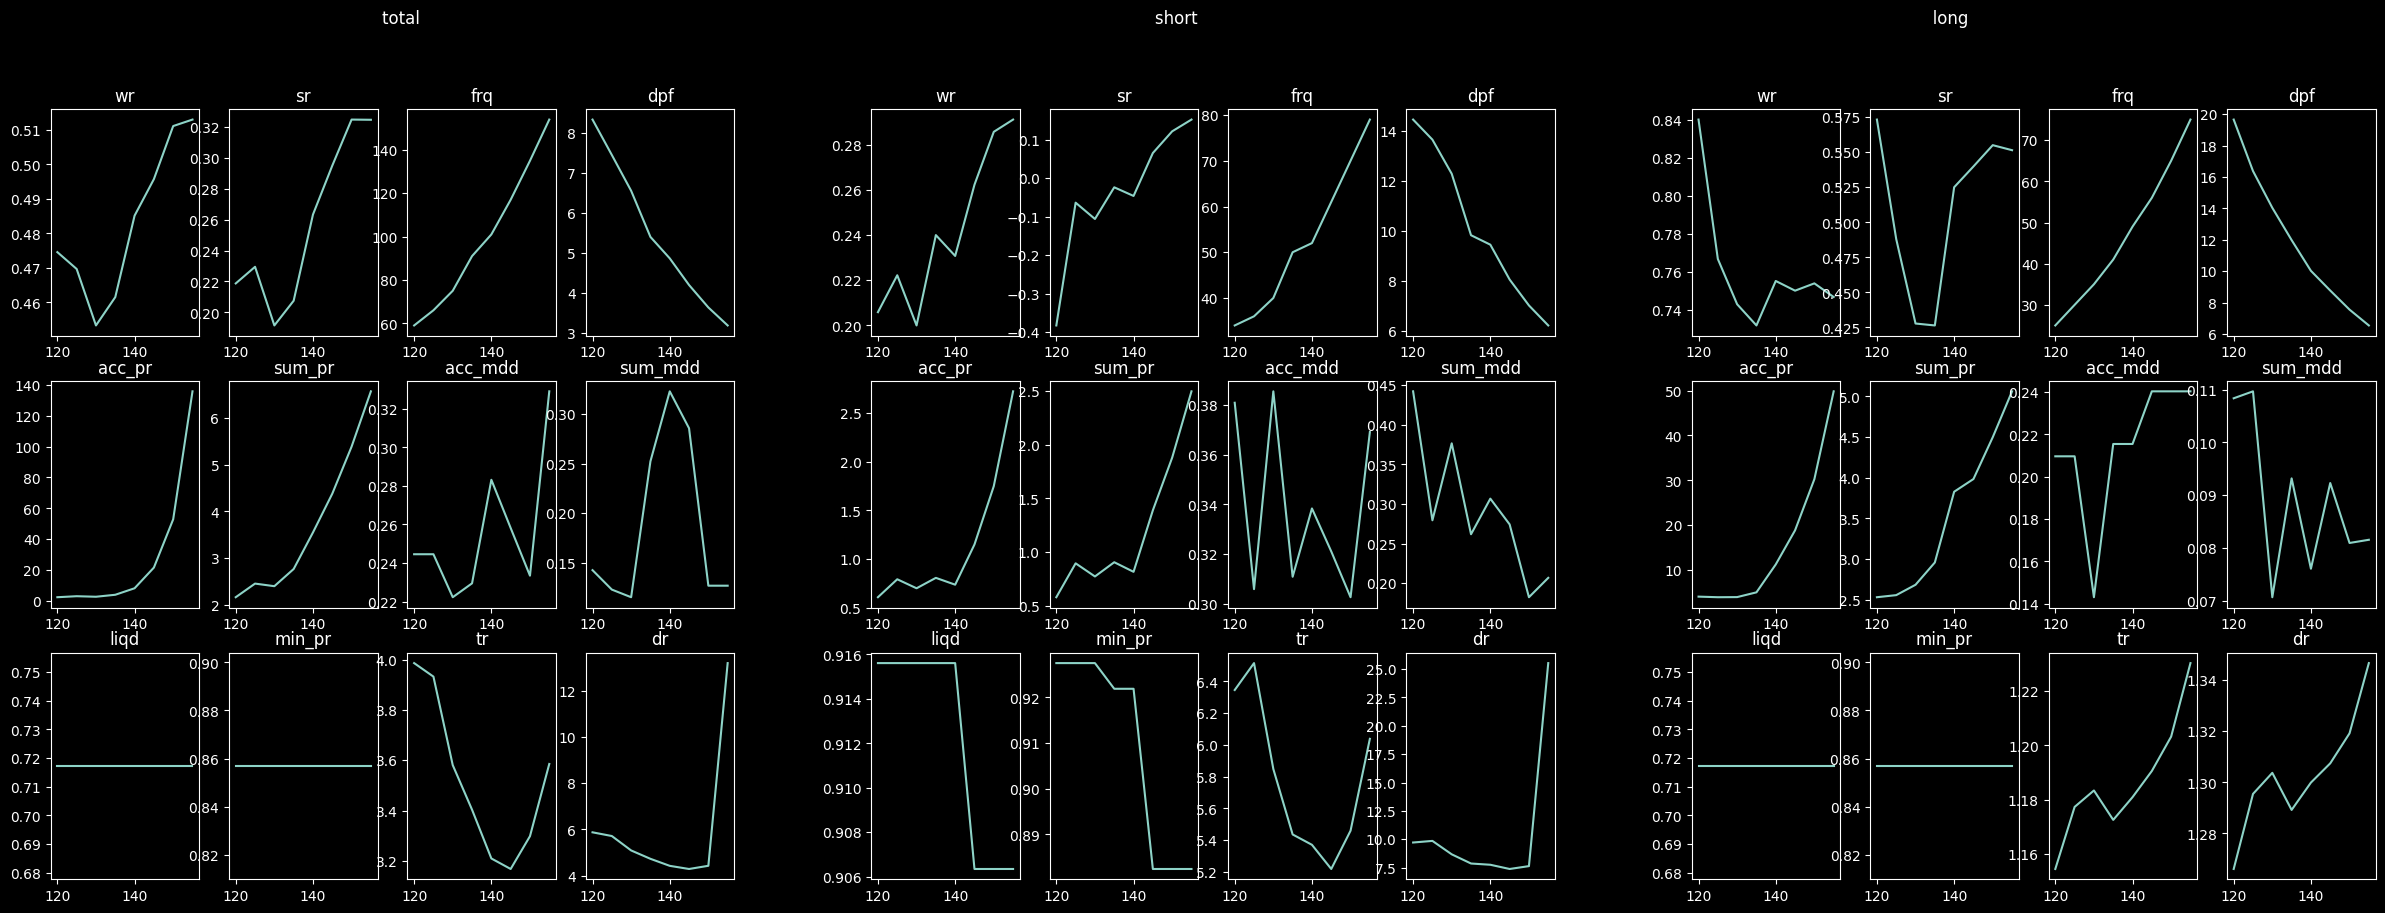

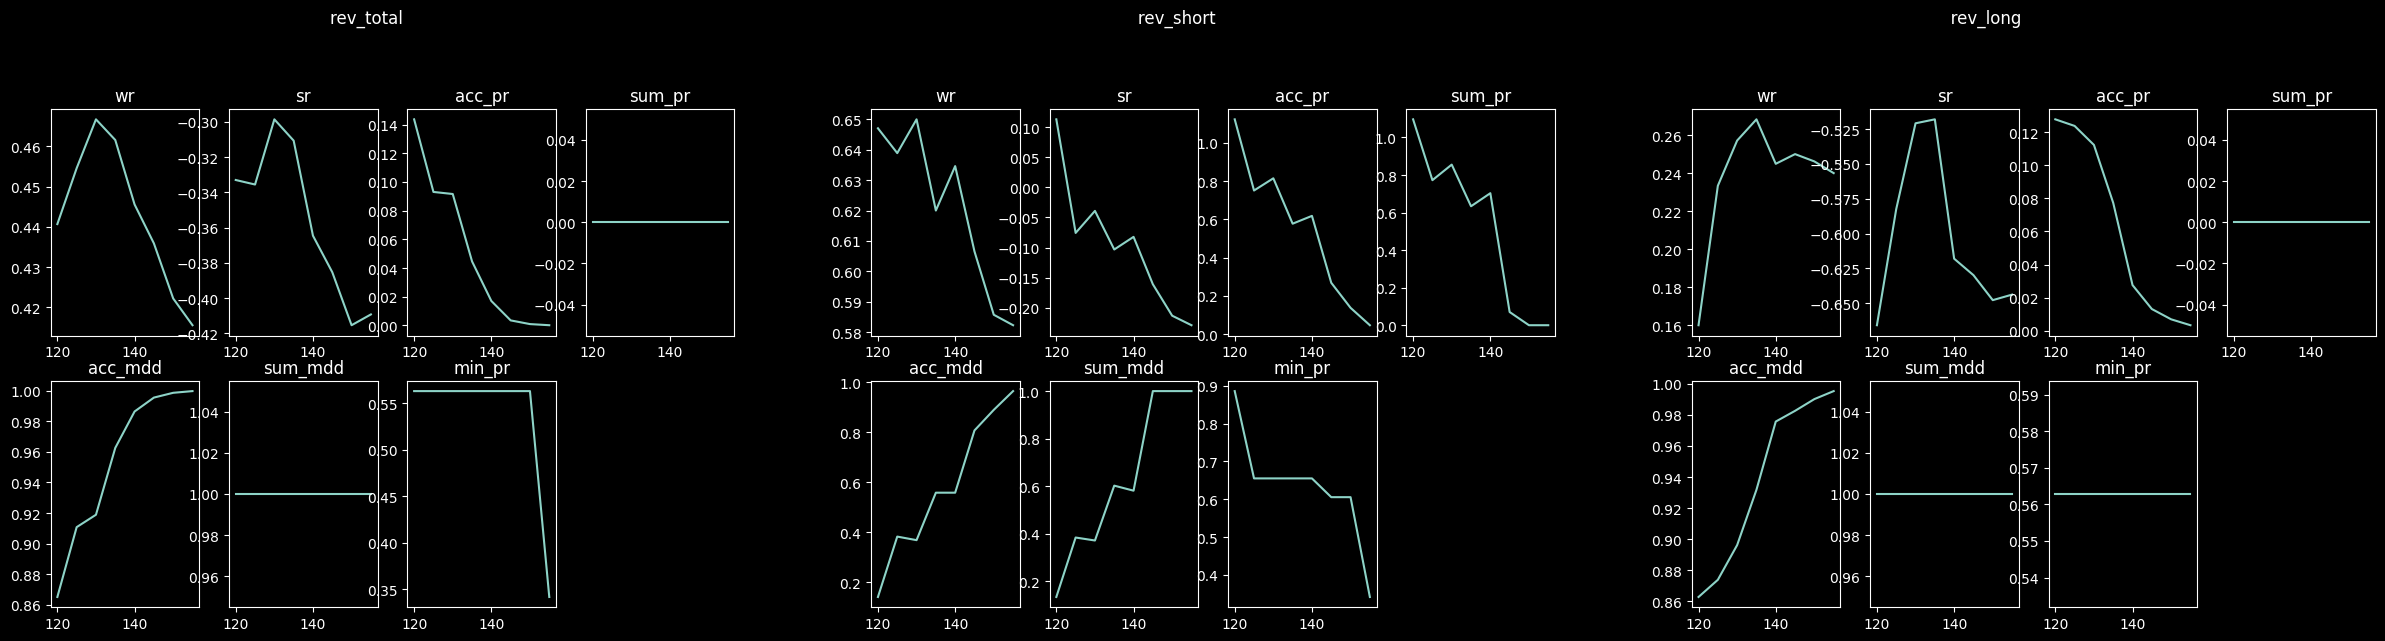

In [ ]:
# print(survey_df)

plt.style.use('dark_background')

title_name_list = [["total", "short", "long"], ["rev_total", "rev_short", "rev_long"]]
survey_dfs_list = [[survey_df, short_survey_df, long_survey_df], [rev_survey_df, rev_short_survey_df, rev_long_survey_df]]
# title_name = 
# survey_df_list = 

space_ = " " * 140

for d_idx, (title_name, survey_dfs) in enumerate(zip(title_name_list, survey_dfs_list)):

  fig = plt.figure(figsize=(30, 10))

  gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                          ncols=3, # col 몇 개 
                          # height_ratios=[1, 1, 1]
                        )

  # gs = fig.add_gridspec(1, 3, wspace=0, hspace=0)

  # nrows, ncols, h_r = 3, 3, [1, 1, 1]
  nrows, ncols, h_r = 3, 4, [1, 1, 1]
  # nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]

  # if d_idx == 0:
  # else:
    # nrows, ncols, h_r = 2, 2, [1, 1]

  for gs_idx, (title, s_df) in enumerate(zip(title_name, survey_dfs)):  


    inner_gs = gs[gs_idx].subgridspec(nrows=nrows, # row 몇 개 
                          ncols=ncols, # col 몇 개 
                          height_ratios=h_r
                        )

    for col_idx, s_cols in enumerate(s_df.columns):
      plt.subplot(inner_gs[col_idx])
      plt.plot(s_df[s_cols])
      plt.title(s_cols)

  # plt.suptitle("total" + " " * 140 + "short" + " " * 140 + "long")
  plt.suptitle(space_.join(title_name))
  plt.show()
  print("\n")

#### fucntional res_plot()

In [ ]:
# t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
# t_w_s2 = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list in ['s']), 1, 0))
# t_w_s == t_w_s2

# tc_zone_wl(np_zone_list, np_pr, np_side_list, zone=['l', 's'])
res_info(np_pr, tp_ratio_list, dr_list)

In [ ]:
def tc_zone_wl(np_zone_list, np_pr, np_side_list, zone=['l', 's']):  

  t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list in zone), 1, 0))
  c_w_s = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list in zone), 1, 0))
  t_ls_s = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list in zone), 1, 0))
  c_ls_s = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list in zone), 1, 0))

  return t_w, c_w, t_ls, c_ls


def res_info(np_pr, tp_ratio_list, dr_list):

  total_pr = np.cumprod(np_pr)

  for_sum_pr = np_pr - 1
  for_sum_pr[0] = 1
  sum_pr = np.cumsum(for_sum_pr)
  sum_pr = np.where(sum_pr < 0, 0, sum_pr)

  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])
  
  total_rollmax_pr = np.maximum.accumulate(total_pr)
  total_acc_mdd = np.max((total_rollmax_pr - total_pr) / total_rollmax_pr)
  total_rollmax_sumpr = np.maximum.accumulate(sum_pr)
  total_sum_mdd = np.max((total_rollmax_sumpr - sum_pr) / total_rollmax_sumpr)

  np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
  mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

  np_dr_list = np.array(dr_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
  mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])

  return total_pr, sum_pr, wr, total_acc_mdd, total_sum_mdd, mean_tr, mean_dr


# def res_plot(res_df, pr_list, zone_list, side_list, tp_ratio_list, dr_list, nontp_liqd_list, nontp_pr_list, config, liqd_list):
def res_plot():

    fontsize = 10
    plt.style.use('default')
    # mpl.rcParams.update(mpl.rcParamsDefault)

    fig = plt.figure(figsize=(14, 10))

    gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                            ncols=3, # col 몇 개 
                            height_ratios=[10, 10, 1]
                          )
    # plt.figure(figsize=(16, 12))
    # plt.figure(figsize=(12, 8))
    # plt.figure(figsize=(10, 6))
    plt.suptitle(key)

    try:
      np_pr = np.array(pr_list)

      sr = sharpe_ratio(np_pr)

      dpf = (len(res_df) / 1440) / len(np_pr)

      np_zone_list = np.array(zone_list)
      # np_pr_list = np.array(pr_list)
      np_side_list = np.array(side_list)

      t_w = np.sum(np.where((np_zone_list == 't') & (np_pr > 1), 1, 0))
      c_w = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1), 1, 0))
      t_ls = np.sum(np.where((np_zone_list == 't') & (np_pr < 1), 1, 0))
      c_ls = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1), 1, 0))

      # np_pr = (np.array(pr_list) - 1) * config.lvrg_set.leverage + 1

      # ----- fake_pr ----- #
      # np_pr = np.where(np_pr > 1, 1 + (np_pr - 1) * 3, np_pr)

      total_pr = np.cumprod(np_pr)

      for_sum_pr = np_pr - 1
      for_sum_pr[0] = 1
      sum_pr = np.cumsum(for_sum_pr)
      sum_pr = np.where(sum_pr < 0, 0, sum_pr)

      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])
      
      total_rollmax_pr = np.maximum.accumulate(total_pr)
      total_acc_mdd = np.max((total_rollmax_pr - total_pr) / total_rollmax_pr)
      total_rollmax_sumpr = np.maximum.accumulate(sum_pr)
      total_sum_mdd = np.max((total_rollmax_sumpr - sum_pr) / total_rollmax_sumpr)

      np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

      np_dr_list = np.array(dr_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])

      # pr_gap = (np_pr - 1) / config.lvrg_set.leverage + fee
      # tp_gap_ = pr_gap[pr_gap > 0]
      # # mean_config.tr_set.tp_gap = np.mean(pr_gap[pr_gap > 0])
      # mean_ls_gap = np.mean(pr_gap[pr_gap < 0])

      # ---- profit fee ratio ---- #
      # mean_pgfr = np.mean((tp_gap_ - fee) / abs(tp_gap_ + fee))

      plt.subplot(gs[0])
      plt.plot(total_pr)
      plt.plot(sum_pr, color='gold')
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr)  + \
                  "\n nontp_liqd_cnt : %s\nnontp_liqd : %.3f\nontp_liqd_pr : %.3f\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list), t_w, c_w, t_ls, c_ls) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f" 
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr)  + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), t_w, c_w, t_ls, c_ls) ,
                  position=title_position, fontsize=fontsize)
      # plt.show()

      survey_df.iloc[survey_i] = wr, sr, len(np_pr[np_pr != 1]), dpf, \
        total_pr[-1], sum_pr[-1], total_acc_mdd, total_sum_mdd, min(liqd_list), np.min(np_pr), mean_tr, mean_dr

      print('supblot231 passed')

    except Exception as e:
      print("error in 231 :", e)


    try:
      #         short only      #
      short_np_pr = np.array(short_list)

      short_sr = sharpe_ratio(short_np_pr)

      short_dpf = (len(res_df) / 1440) / len(short_np_pr)

      short_total_pr = np.cumprod(short_np_pr)
      
      short_for_sum_pr = short_np_pr - 1
      short_for_sum_pr[0] = 1
      short_sum_pr = np.cumsum(short_for_sum_pr)
      short_sum_pr = np.where(short_sum_pr < 0, 0, short_sum_pr)

      short_wr = len(short_np_pr[short_np_pr > 1]) / len(short_np_pr[short_np_pr != 1])
      
      t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
      c_w_s = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
      t_ls_s = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 's'), 1, 0))
      c_ls_s = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 's'), 1, 0))

      short_rollmax_pr = np.maximum.accumulate(short_total_pr)
      short_acc_mdd = np.max((short_rollmax_pr - short_total_pr) / short_rollmax_pr)
      short_rollmax_sumpr = np.maximum.accumulate(short_sum_pr)
      short_sum_mdd = np.max((short_rollmax_sumpr - short_sum_pr) / short_rollmax_sumpr)

      np_short_tp_ratio_list = np.array(short_tp_ratio_list)
      mean_short_tr = np.mean(np_short_tp_ratio_list[np.isnan(np_short_tp_ratio_list) == 0])
      
      np_short_dr_list = np.array(short_dr_list)
      mean_short_dr = np.mean(np_short_dr_list[np.isnan(np_short_dr_list) == 0])
      
      # short_pr_gap = (short_np_pr - 1) / config.lvrg_set.leverage + fee
      # short_tp_gap = short_pr_gap[short_pr_gap > 0]
      # # mean_short_tp_gap = np.mean(short_pr_gap[short_pr_gap > 0])
      # # mean_short_ls_gap = np.mean(short_pr_gap[short_pr_gap < 0])

      # mean_short_pgfr = np.mean((short_tp_gap - fee) / abs(short_tp_gap + fee))
      
      # plt.subplot(232)
      plt.subplot(gs[1])
      plt.plot(short_total_pr)
      plt.plot(short_sum_pr, color='gold')
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1], short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term, t_w_s, c_w_s, t_ls_s, c_ls_s) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1], short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), t_w_s, c_w_s, t_ls_s, c_ls_s),
                  position=title_position, fontsize=fontsize)
   
      short_survey_df.iloc[survey_i] = short_wr, short_sr, len(short_np_pr[short_np_pr != 1]), short_dpf, \
        short_total_pr[-1], short_sum_pr[-1], short_acc_mdd, short_sum_mdd, min(short_liqd_list), np.min(short_np_pr), mean_short_tr, mean_short_dr
        
      print('supblot232 passed')
    
    except Exception as e:
      print("error in 232 :", e)

    try:
      #         long only      #
      long_np_pr = np.array(long_list)
      # long_np_pr = (np.array(long_list) - 1) * config.lvrg_set.leverage + 1

      long_sr = sharpe_ratio(long_np_pr)

      long_dpf = (len(res_df) / 1440) / len(long_np_pr)

      long_total_pr = np.cumprod(long_np_pr)
      
      long_for_sum_pr = long_np_pr - 1
      long_for_sum_pr[0] = 1
      long_sum_pr = np.cumsum(long_for_sum_pr)
      long_sum_pr = np.where(long_sum_pr < 0, 0, long_sum_pr)

      long_wr = len(long_np_pr[long_np_pr > 1]) / len(long_np_pr[long_np_pr != 1])

      t_w_l = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
      c_w_l = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
      t_ls_l = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))
      c_ls_l = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))

      long_rollmax_pr = np.maximum.accumulate(long_total_pr)
      long_acc_mdd = np.max((long_rollmax_pr - long_total_pr) / long_rollmax_pr)
      long_rollmax_sumpr = np.maximum.accumulate(long_sum_pr)
      long_sum_mdd = np.max((long_rollmax_sumpr - long_sum_pr) / long_rollmax_sumpr)

      np_long_tp_ratio_list = np.array(long_tp_ratio_list)
      mean_long_tr = np.mean(np_long_tp_ratio_list[np.isnan(np_long_tp_ratio_list) == 0])
      
      np_long_dr_list = np.array(long_dr_list)
      mean_long_dr = np.mean(np_long_dr_list[np.isnan(np_long_dr_list) == 0])

      # long_pr_gap = (long_np_pr - 1) / config.lvrg_set.leverage + fee
      # long_tp_gap = long_pr_gap[long_pr_gap > 0]
      # # mean_long_tp_gap = np.mean(long_pr_gap[long_pr_gap > 0])
      # # mean_long_ls_gap = np.mean(long_pr_gap[long_pr_gap < 0])

      # mean_long_pgfr = np.mean((long_tp_gap - fee) / abs(long_tp_gap + fee))

      plt.subplot(gs[2])
      plt.plot(long_total_pr)
      plt.plot(long_sum_pr, color='gold')
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1], long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr)  + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term, t_w_l, c_w_l, t_ls_l, c_ls_l) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1], long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_long_liqd_list), t_w_l, c_w_l, t_ls_l, c_ls_l),
                  position=title_position, fontsize=fontsize)

      long_survey_df.iloc[survey_i] = long_wr, long_sr, len(long_np_pr[long_np_pr != 1]), long_dpf, \
        long_total_pr[-1], long_sum_pr[-1], long_acc_mdd, long_sum_mdd, min(long_liqd_list), np.min(long_np_pr), mean_long_tr, mean_long_dr

      print('supblot233 passed')

    except Exception as e:
      print("error in 233 :", e)


    try:
      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_fee = tp_fee + out_fee - np.array(fee_list)
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - rev_fee - 1) * config.lvrg_set.leverage + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
          
      rev_sr = sharpe_ratio(rev_np_pr)

      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      rev_total_for_sum_pr = rev_np_pr - 1
      rev_total_for_sum_pr[0] = 1
      rev_total_sum_pr = np.cumsum(rev_total_for_sum_pr)
      rev_total_sum_pr = np.where(rev_total_sum_pr < 0, 0, rev_total_sum_pr)

      rev_rollmax_pr = np.maximum.accumulate(rev_total_pr)
      rev_acc_mdd = np.max((rev_rollmax_pr - rev_total_pr) / rev_rollmax_pr)
      rev_rollmax_sumpr = np.maximum.accumulate(rev_total_sum_pr)
      rev_sum_mdd = np.max((rev_rollmax_sumpr - rev_total_sum_pr) / rev_rollmax_sumpr)

      plt.subplot(gs[3])

      plt.plot(rev_total_pr)
      plt.plot(rev_total_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[-1], 
                   rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)), fontsize=fontsize)
      
      rev_survey_df.iloc[survey_i] = rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[-1], rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)

    except Exception as e:
      print("error in 234 :", e)

    try:
      #         short       #
      # rev_short_np_pr = 1 / (np.array(short_list) + fee) - fee
      rev_short_fee = tp_fee + out_fee - np.array(short_fee_list)
      rev_short_np_pr = (1 / ((np.array(short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - rev_short_fee - 1) * config.lvrg_set.leverage + 1
      # rev_short_np_pr = (1 / (np.array(short_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
      
      rev_short_sr = sharpe_ratio(rev_short_np_pr)
          
      short_rev_total_pr = np.cumprod(rev_short_np_pr)
      rev_short_wr = len(rev_short_np_pr[rev_short_np_pr > 1]) / len(rev_short_np_pr[rev_short_np_pr != 1])

      rev_short_for_sum_pr = rev_short_np_pr - 1
      rev_short_for_sum_pr[0] = 1
      short_rev_sum_pr = np.cumsum(rev_short_for_sum_pr)
      short_rev_sum_pr = np.where(short_rev_sum_pr < 0, 0, short_rev_sum_pr)

      short_rev_rollmax_pr = np.maximum.accumulate(short_rev_total_pr)
      short_rev_acc_mdd = np.max((short_rev_rollmax_pr - short_rev_total_pr) / short_rev_rollmax_pr)
      short_rev_rollmax_sumpr = np.maximum.accumulate(short_rev_sum_pr)
      short_rev_sum_mdd = np.max((short_rev_rollmax_sumpr - short_rev_sum_pr) / short_rev_rollmax_sumpr)

      plt.subplot(gs[4])

      plt.plot(short_rev_total_pr)
      plt.plot(short_rev_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[-1], 
                   short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)), fontsize=fontsize)
      
      rev_short_survey_df.iloc[survey_i] = rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[-1], short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)

    except Exception as e:
      print("error in 235 :", e)

    try:
      #         long       #
      # rev_long_np_pr = 1 / (np.array(long_list) + fee) - fee
      rev_long_fee = tp_fee + out_fee - np.array(long_fee_list)
      rev_long_np_pr = (1 / ((np.array(long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - rev_long_fee - 1) * config.lvrg_set.leverage + 1
          
      rev_long_sr = sharpe_ratio(rev_long_np_pr)

      long_rev_total_pr = np.cumprod(rev_long_np_pr)
      rev_long_wr = len(rev_long_np_pr[rev_long_np_pr > 1]) / len(rev_long_np_pr[rev_long_np_pr != 1])

      rev_long_for_sum_pr = rev_long_np_pr - 1
      rev_long_for_sum_pr[0] = 1
      long_rev_sum_pr = np.cumsum(rev_long_for_sum_pr)
      long_rev_sum_pr = np.where(long_rev_sum_pr < 0, 0, long_rev_sum_pr)

      long_rev_rollmax_pr = np.maximum.accumulate(long_rev_total_pr)
      long_rev_acc_mdd = np.max((long_rev_rollmax_pr - long_rev_total_pr) / long_rev_rollmax_pr)
      long_rev_rollmax_sumpr = np.maximum.accumulate(long_rev_sum_pr)
      long_rev_sum_mdd = np.max((long_rev_rollmax_sumpr - long_rev_sum_pr) / long_rev_rollmax_sumpr)

      plt.subplot(gs[5])

      plt.plot(long_rev_total_pr)
      plt.plot(long_rev_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[-1], 
                   long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)), fontsize=fontsize)
      
      rev_long_survey_df.iloc[survey_i] = rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[-1], long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)
      
    except Exception as e:
      print("error in 236 :", e)

    if show_plot:
      
      frq_dev, s_frq_dev, l_frq_dev = frq_dev_plot(res_df, trade_list, side_list, plot=False)      
      plt.subplot(gs[6])
      plt.plot(frq_dev)

      plt.subplot(gs[7])
      plt.plot(s_frq_dev)

      plt.subplot(gs[8])
      plt.plot(l_frq_dev)

      plt.show()
    

    try:

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - np.array(fee_list) - 1) * config.lvrg_set.leverage + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        plt.subplot(gs[0])

        plt.plot(h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], config.lvrg_set.leverage))
        # plt.show()

        #         short only      #
        h_short_np_pr = np.array(h_short_list)

        short_h_total_pr = np.cumprod(h_short_np_pr)
        h_short_wr = len(h_short_np_pr[h_short_np_pr > 1]) / len(h_short_np_pr[h_short_np_pr != 1])
        
        plt.subplot(gs[1])
        plt.plot(short_h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_short_wr, np.min(h_short_np_pr), short_h_total_pr[-1], config.lvrg_set.leverage))

        #         long only      #
        h_long_np_pr = np.array(h_long_list)

        long_h_total_pr = np.cumprod(h_long_np_pr)
        h_long_wr = len(h_long_np_pr[h_long_np_pr > 1]) / len(h_long_np_pr[h_long_np_pr != 1])
        
        plt.subplot(gs[2])
        plt.plot(long_h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_long_wr, np.min(h_long_np_pr), long_h_total_pr[-1], config.lvrg_set.leverage))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        plt.subplot(gs[3])
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], config.lvrg_set.leverage))

        #         short       #
        # h_rev_short_np_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_short_np_pr =  (1 / ((np.array(h_short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - np.array(short_fee_list) - 1) * config.lvrg_set.leverage + 1
           
        short_h_rev_total_pr = np.cumprod(h_rev_short_np_pr)
        h_rev_short_wr = len(h_rev_short_np_pr[h_rev_short_np_pr > 1]) / len(h_rev_short_np_pr[h_rev_short_np_pr != 1])

        plt.subplot(gs[4])
        plt.plot(short_h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_short_wr, np.min(h_rev_short_np_pr), short_h_rev_total_pr[-1], config.lvrg_set.leverage))

        #         long       #
        # h_rev_long_np_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_long_np_pr =  (1 / ((np.array(h_long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - np.array(long_fee_list) - 1) * config.lvrg_set.leverage + 1
            
        long_h_rev_total_pr = np.cumprod(h_rev_long_np_pr)
        h_rev_long_wr = len(h_rev_long_np_pr[h_rev_long_np_pr > 1]) / len(h_rev_long_np_pr[h_rev_long_np_pr != 1])

        plt.subplot(gs[5])
        plt.plot(long_h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_long_wr, np.min(h_rev_long_np_pr), long_h_rev_total_pr[-1], config.lvrg_set.leverage))
        
        if show_plot:
          plt.show()
          
    except Exception as e:
      print('error in h_pr plot :', e)   

#### ep_loc.point & zone legacy

In [ ]:


    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

##### check statistical significance

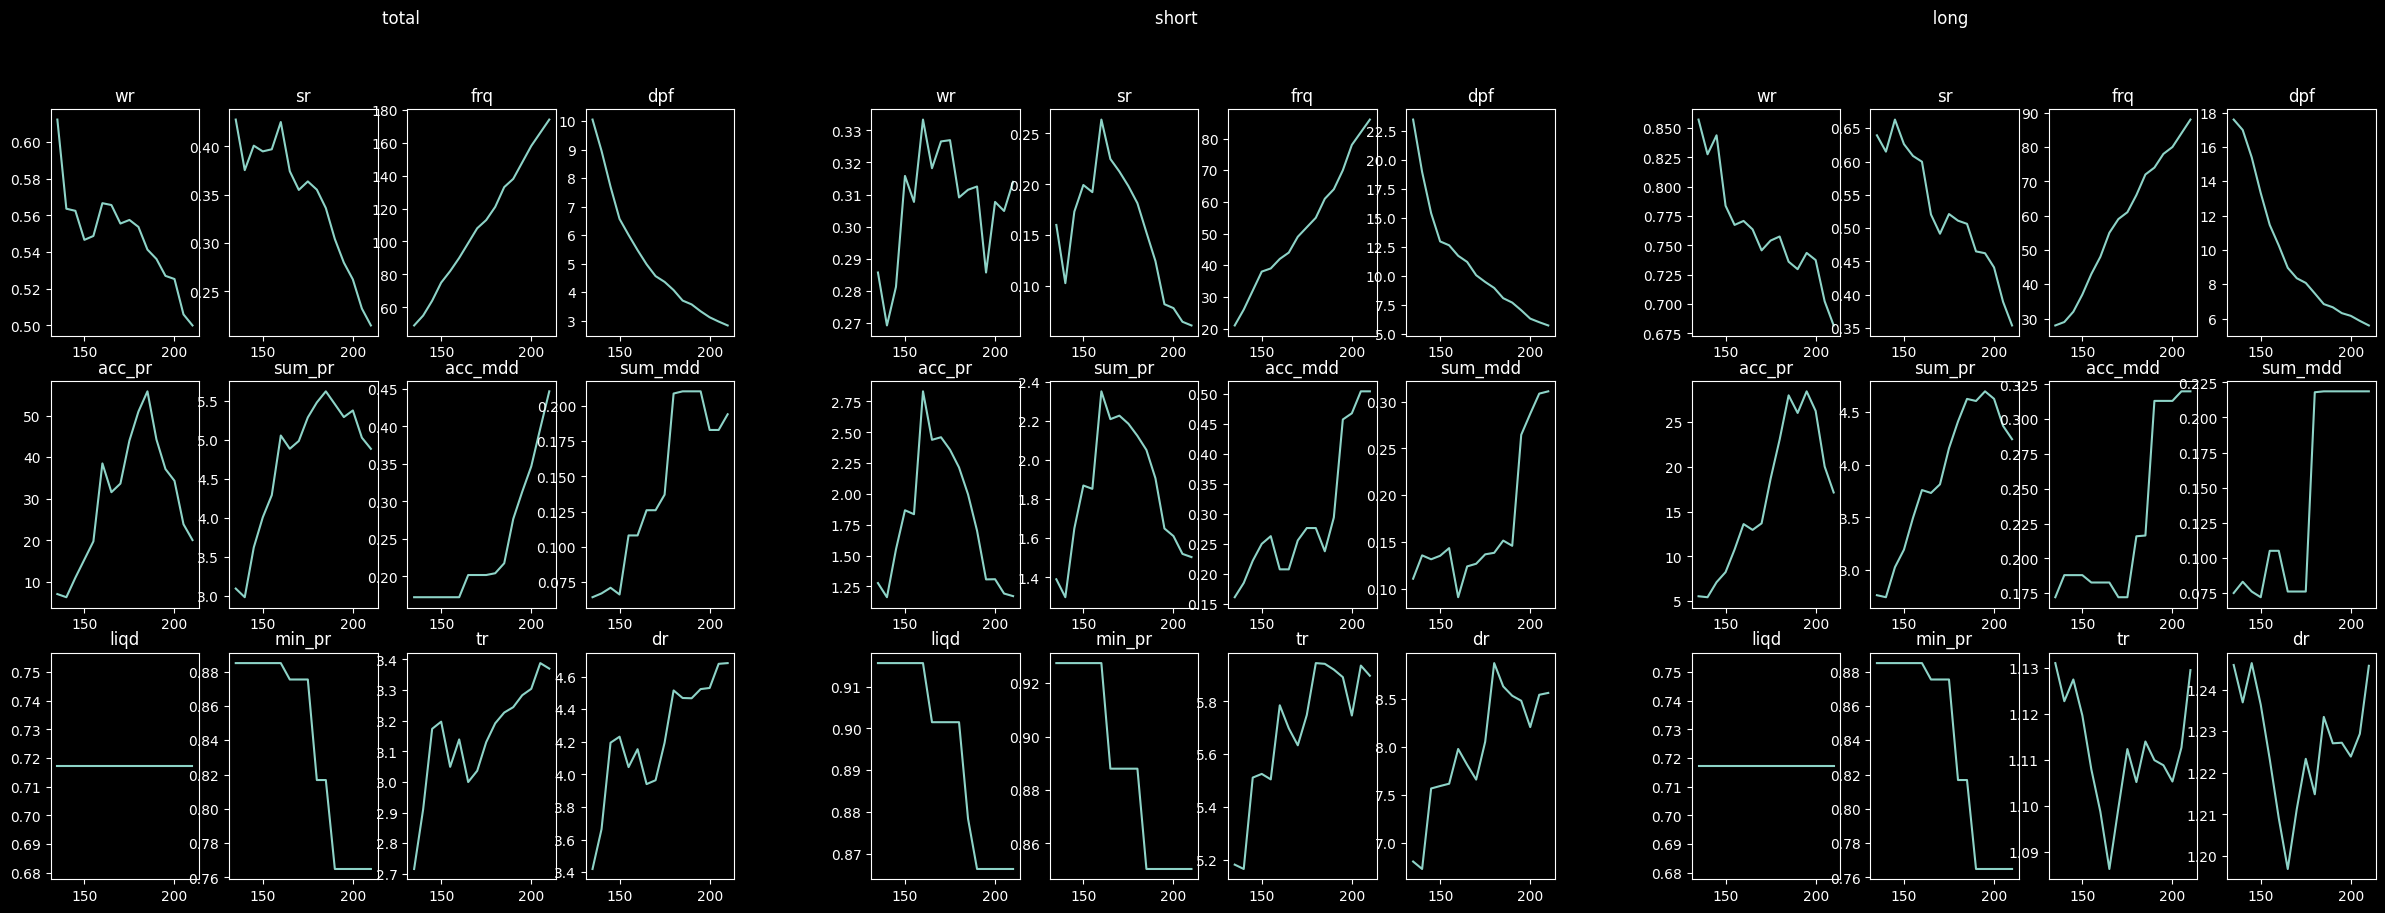

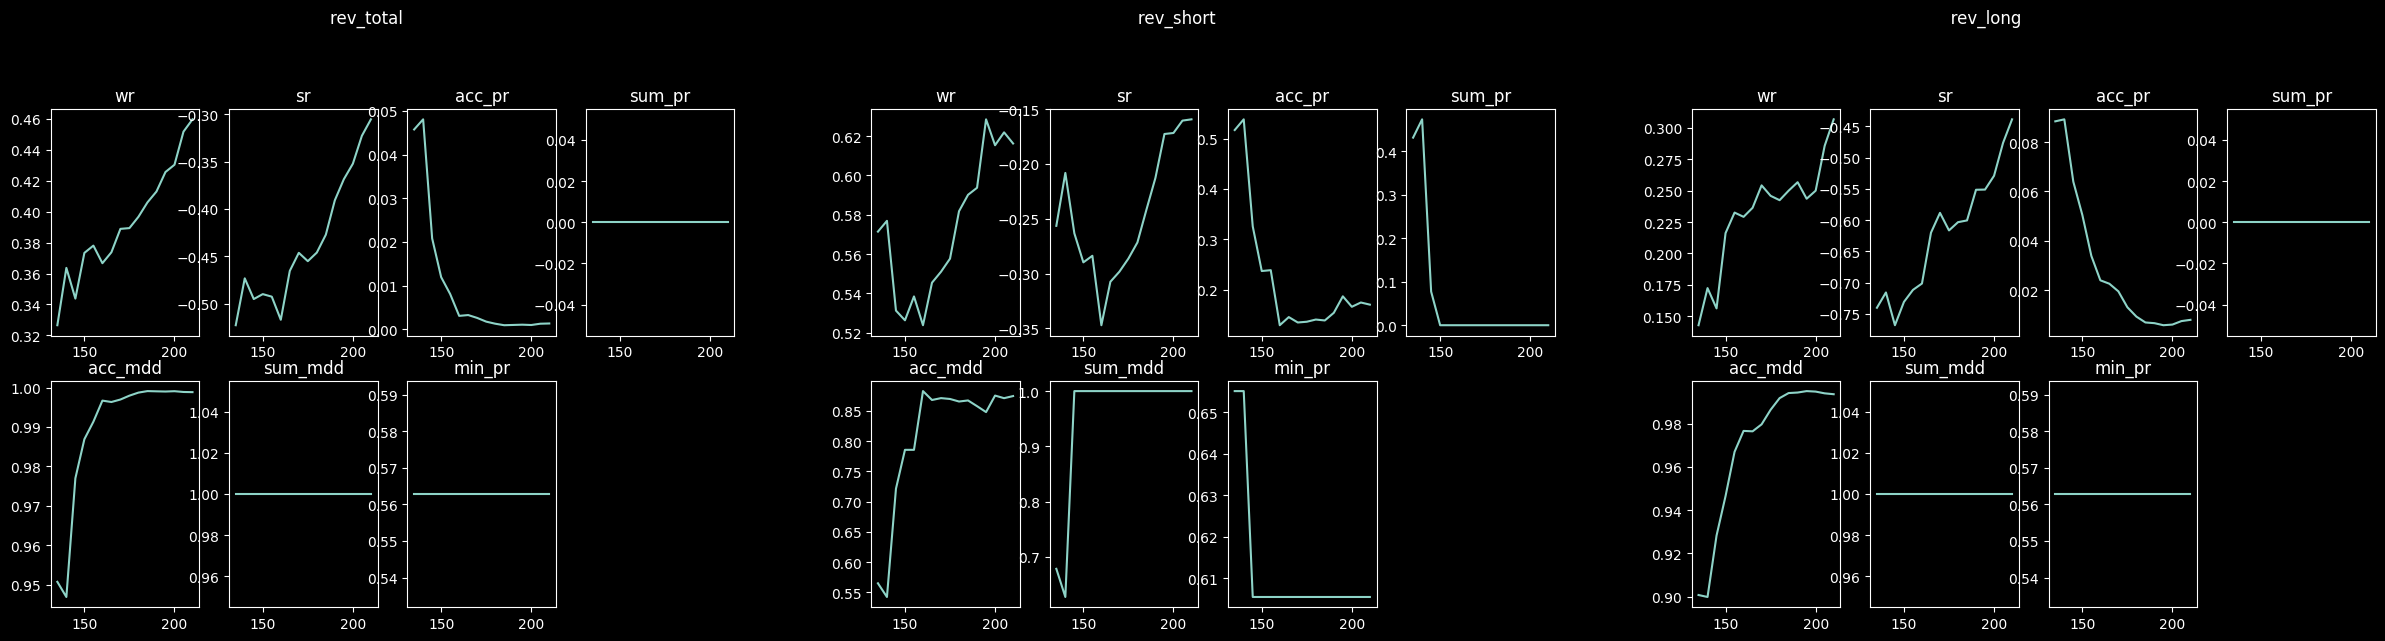

In [ ]:
# print(survey_df)

plt.style.use('dark_background')

title_name_list = [["total", "short", "long"], ["rev_total", "rev_short", "rev_long"]]
survey_dfs_list = [[survey_df, short_survey_df, long_survey_df], [rev_survey_df, rev_short_survey_df, rev_long_survey_df]]
# title_name = 
# survey_df_list = 

space_ = " " * 140

for d_idx, (title_name, survey_dfs) in enumerate(zip(title_name_list, survey_dfs_list)):

  fig = plt.figure(figsize=(30, 10))

  gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                          ncols=3, # col 몇 개 
                          # height_ratios=[1, 1, 1]
                        )

  # gs = fig.add_gridspec(1, 3, wspace=0, hspace=0)

  # nrows, ncols, h_r = 3, 3, [1, 1, 1]
  nrows, ncols, h_r = 3, 4, [1, 1, 1]
  # nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]

  # if d_idx == 0:
  # else:
    # nrows, ncols, h_r = 2, 2, [1, 1]

  for gs_idx, (title, s_df) in enumerate(zip(title_name, survey_dfs)):  


    inner_gs = gs[gs_idx].subgridspec(nrows=nrows, # row 몇 개 
                          ncols=ncols, # col 몇 개 
                          height_ratios=h_r
                        )

    for col_idx, s_cols in enumerate(s_df.columns):
      plt.subplot(inner_gs[col_idx])
      plt.plot(s_df[s_cols])
      plt.title(s_cols)

  # plt.suptitle("total" + " " * 140 + "short" + " " * 140 + "long")
  plt.suptitle(space_.join(title_name))
  plt.show()
  print("\n")

##### ep_loc.point & zone legacy

In [ ]:


    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

### nontp survey

##### term & liqd

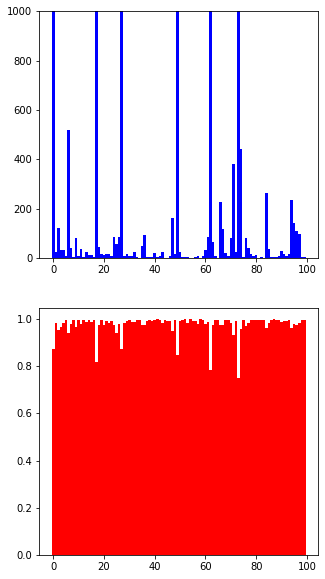

In [ ]:
# print(nontp_long_indexs)

plot_size = 100

for s_i in range(plot_size, len(trade_list), plot_size):

  slice_trade_list = trade_list[s_i - plot_size:s_i]
  slice_liqd_list = liqd_list[s_i - plot_size:s_i]

  # print(len(slice_trade_list))
  np_trade = np.array(slice_trade_list)
  trade_term = np_trade[:, [2]] - np_trade[:, [1]]

  plt.figure(figsize=(5, 10))
  plt.subplot(211)
  plt.bar(np.arange(len(trade_term)), trade_term.reshape(-1,), width=1, color='b')

  # plt.plot(trade_term.reshape(-1,))
  plt.ylim(0, 1000)
  # plt.show()
  # print()

  plt.subplot(212)
  # print(len(liqd_list))
  # plt.bar(np.arange(len(liqd_list)), liqd_list)
  plt.bar(np.arange(len(slice_liqd_list)), np.array(slice_liqd_list), width=1, color='r')
  # plt.plot(slice_liqd_list)
  plt.show()

print()

##### check nontp index

In [ ]:
# np_nontp_short_indexs = np.array(nontp_short_indexs)
# np_nontp_long_indexs = np.array(nontp_long_indexs)

# short_til_term = len(res_df) - np_nontp_short_indexs
# long_til_term = len(res_df) - np_nontp_long_indexs

max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

print(max_nontp_long_term)

32747


## basic strategy

### shifting

In [ ]:
org_res_df = res_df.copy()

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])


# traded section plot

## plot with off-color st with dash

### sorted plot_check

open_side_ : -2.0
np_timeidx[open_idx] : 9
open_idx, ep_idx_list_[0], tp_idx_list_[-1] : 550269 550270 550394
short_tp : 2864.61370820942
short_out : 2961.286097744395
short real pr : [1.1229482]
long real pr : [0.87481691]

open_side_ : -2.0
np_timeidx[open_idx] : 29
open_idx, ep_idx_list_[0], tp_idx_list_[-1] : 384689 384691 384800
short_tp : 2222.8010269707734
short_out : 2326.4294310072837
short real pr : [1.12271704]
long real pr : [0.87631812]


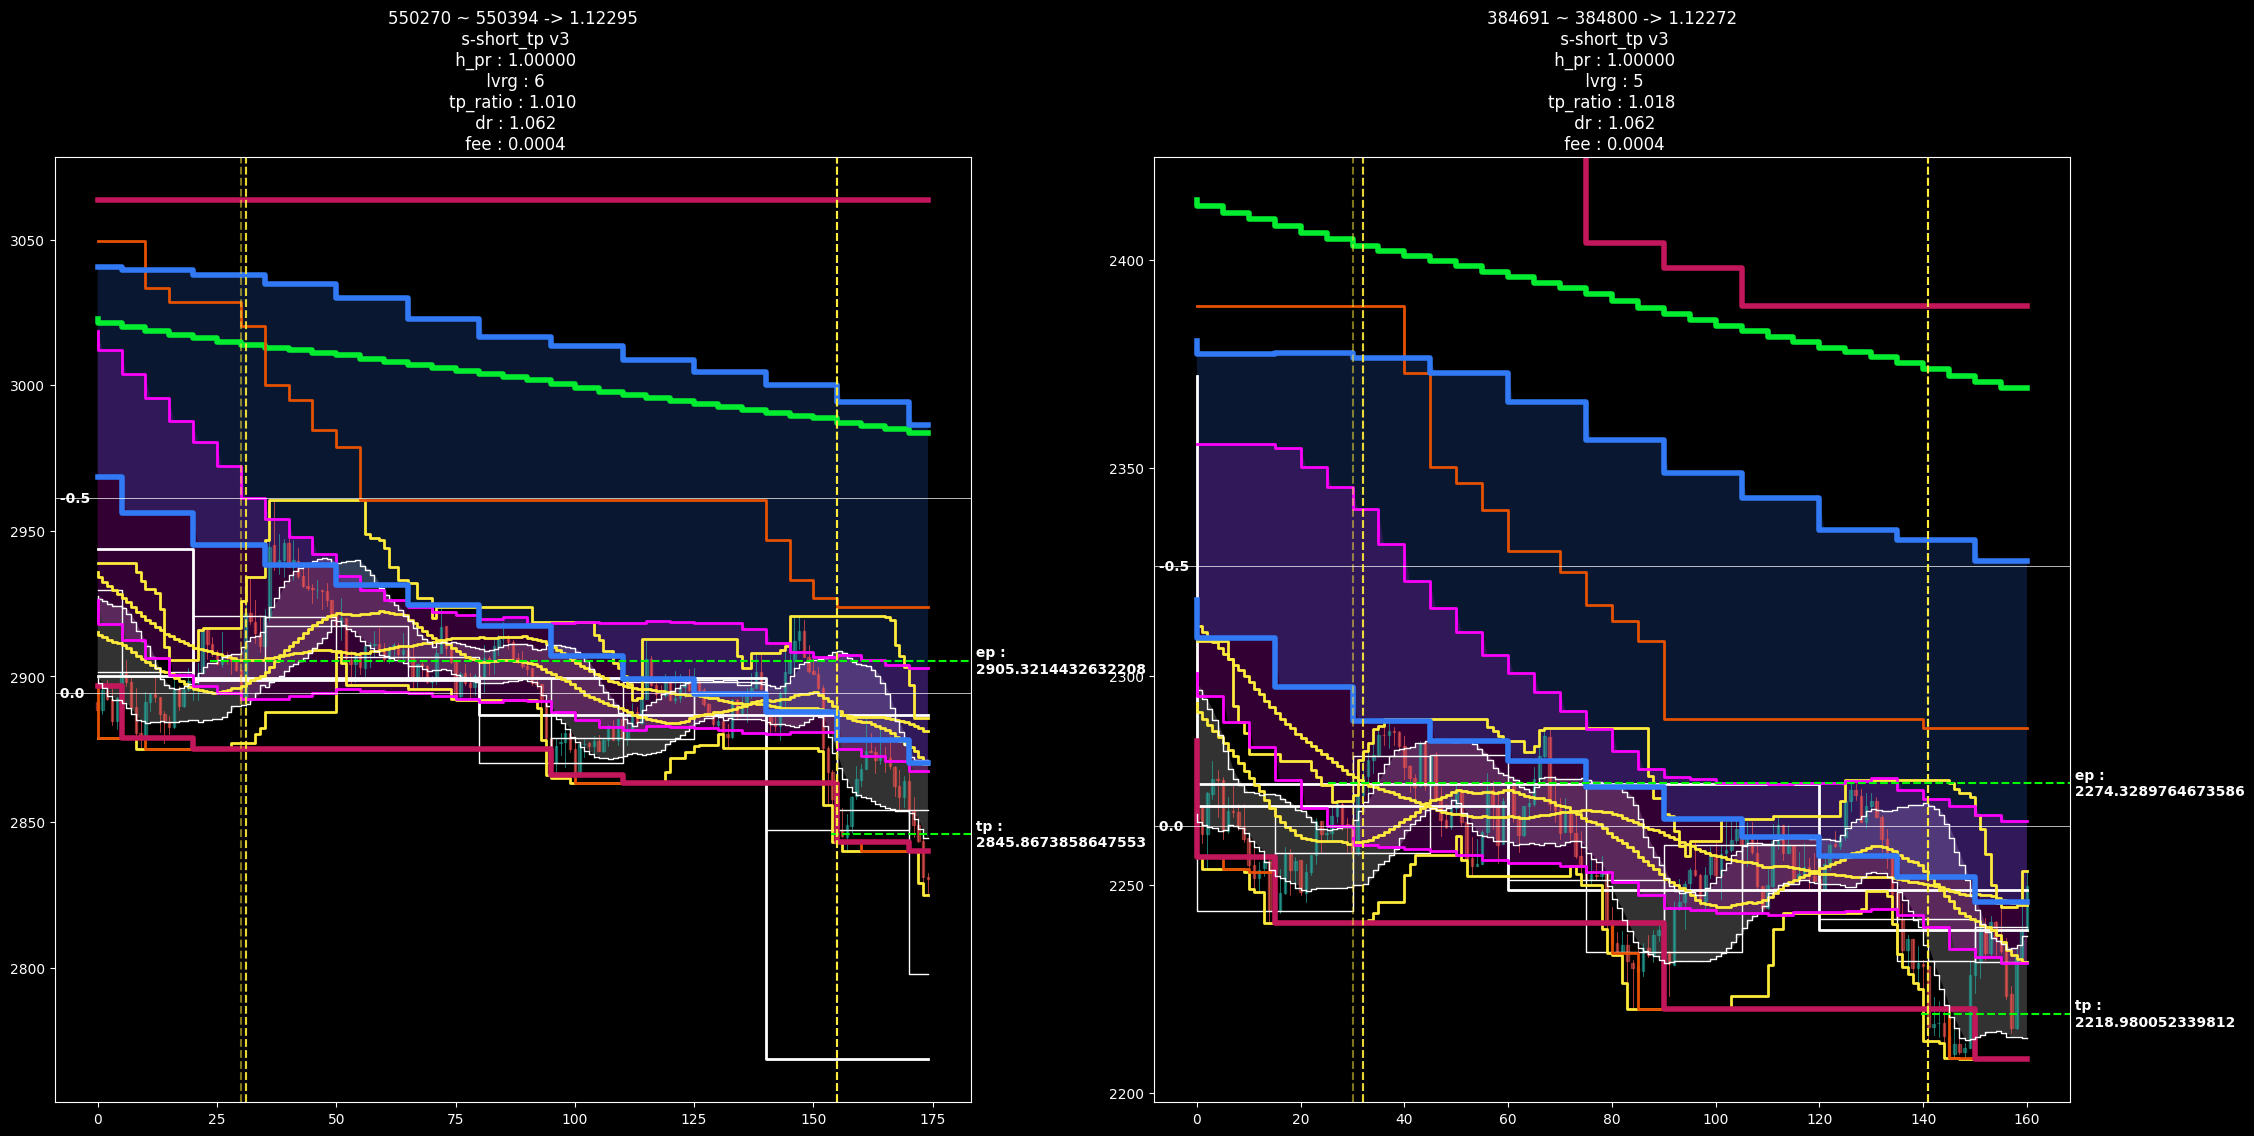


open_side_ : -2.0
np_timeidx[open_idx] : 4
open_idx, ep_idx_list_[0], tp_idx_list_[-1] : 382564 382569 382677
short_tp : 2535.8644878367745
short_out : 2604.615207037379
short real pr : [1.11822684]
long real pr : [0.88059618]

open_side_ : -2.0
np_timeidx[open_idx] : 44
open_idx, ep_idx_list_[0], tp_idx_list_[-1] : 417164 417167 417262
short_tp : 1982.9169773813276
short_out : 2069.817099450829
short real pr : [1.10178165]
long real pr : [0.8992361]


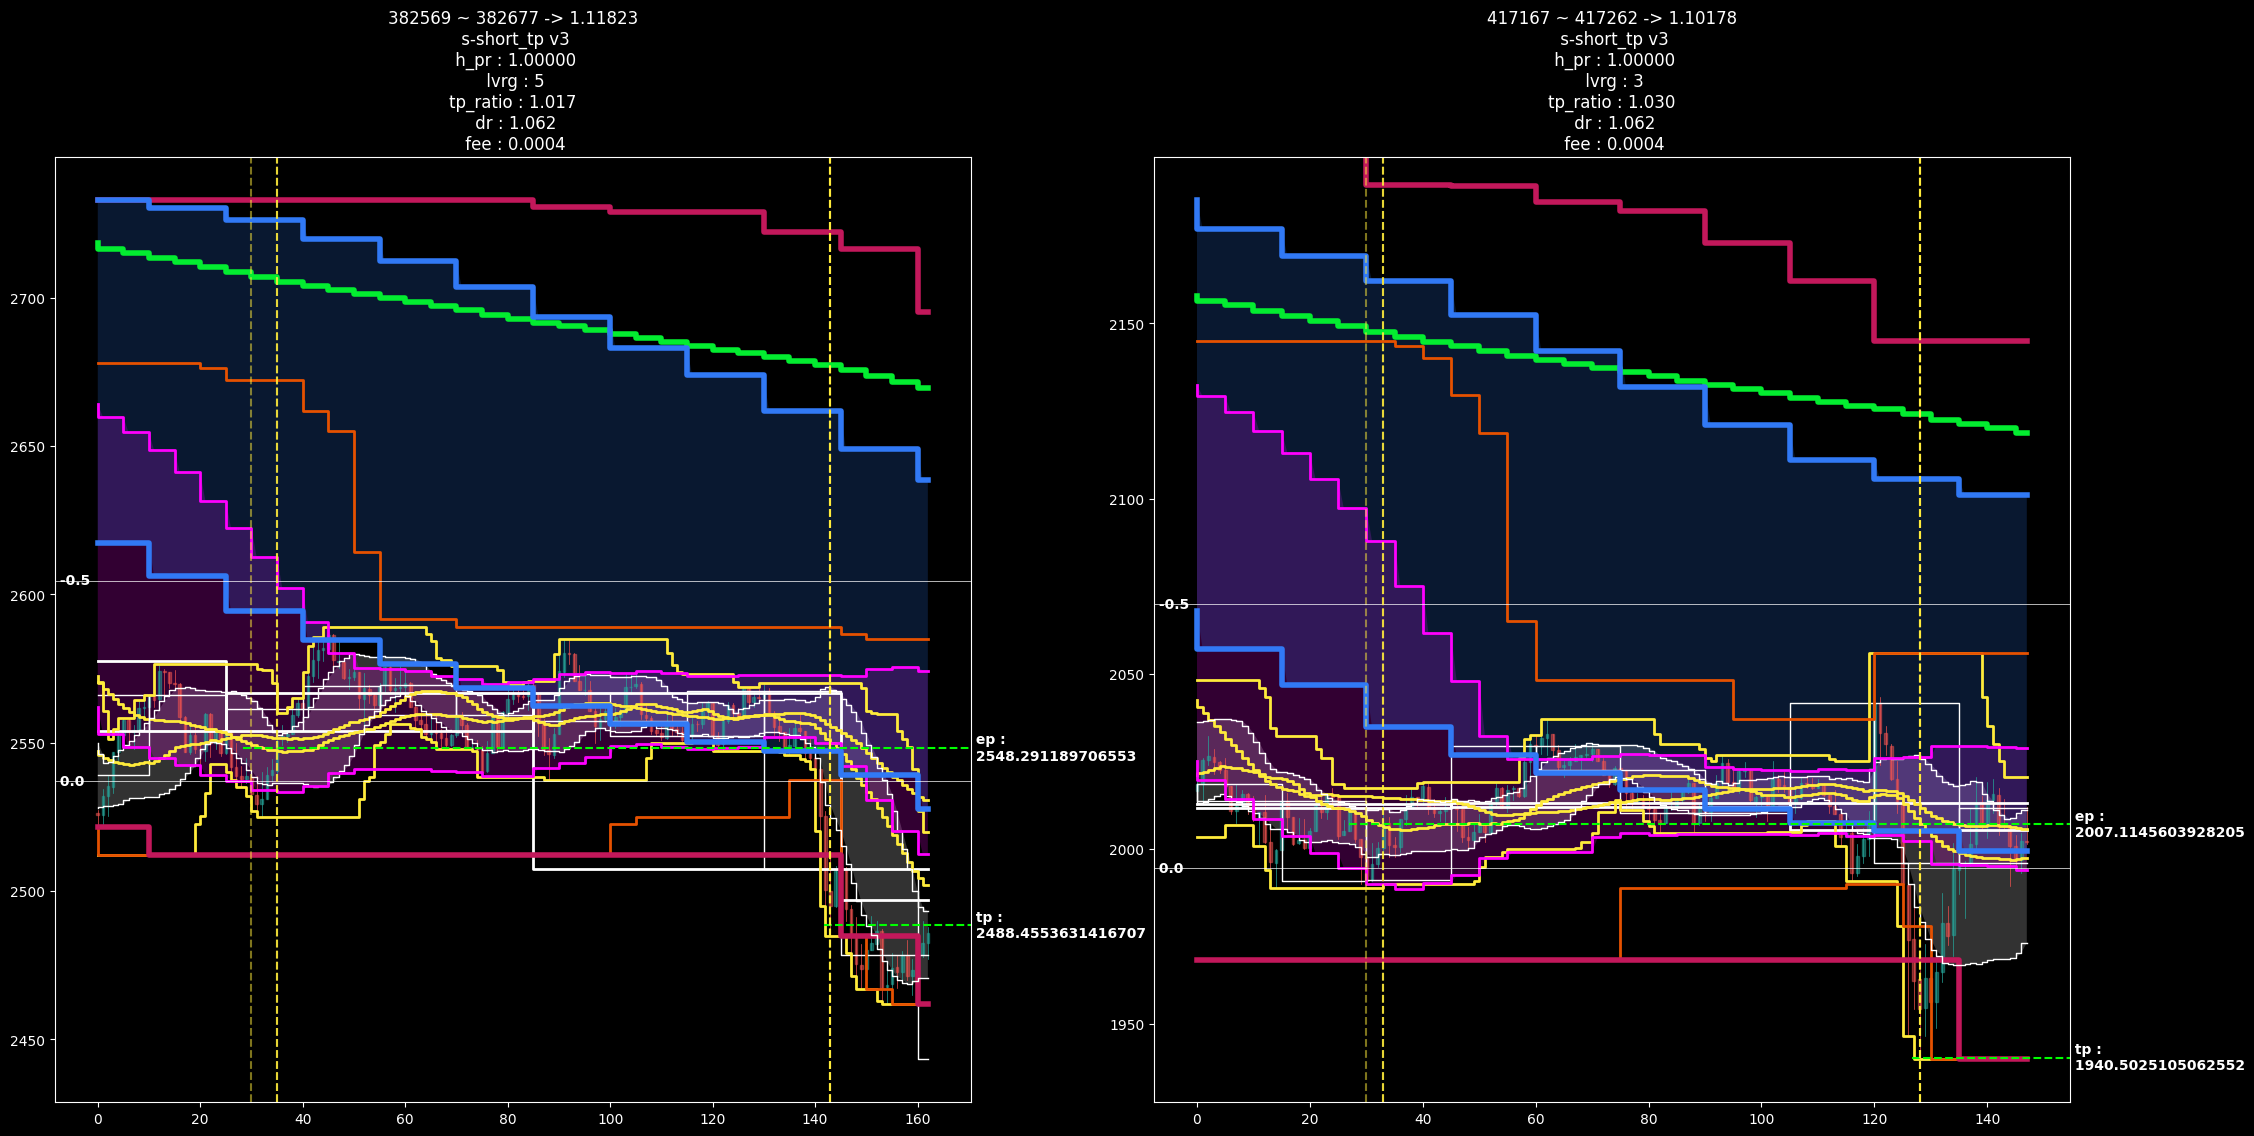

IndexError: ignored

In [33]:
assert len(open_list) == len(trade_list), "len(open_list) != len(trade_list)"
assert len(tp_state_list) == len(fee_list), "len(tp_state_list) != len(fee_list)"

if multi_mode:
  strat_version = "v3"

save_plot = 0
tf_plot = 0
pr_sort = 1     # 이상한 체결 확인하기 좋음
pr_descend = 1  # 1 -> 내림차순
# wl_case = 1     # 1 / -1 / 0 (win loss study)
position = -1    # -1 / 1 / 0 (short / long / both)

x_max = 500
x_margin = x_max / 30
only_loc_plot = 0 # limit plot_range til loc_set idx = replacing x_max value

inversion = 0
hedge = 0


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    

prev_plotsize = 30
post_plotsize = 20


if position == -1:
  position = config.ep_set.short_entry_score
elif position == 1:
  position = -config.ep_set.short_entry_score


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


h_candle_intv1 = '15T'
h_candle_intv2 = 'H'
if 'hopen_{}'.format(h_candle_intv2) not in res_df.columns:
  res_df = h_candle_v2(res_df, h_candle_intv1)
  res_df = h_candle_v2(res_df, h_candle_intv2)

res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
res_df["ma60_1m"] = res_df['close'].rolling(60).mean()

res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)
# res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=1, use_dtk_line=1)
# break

rtc_list = ["short_tp_1_{}".format(strat_version), "short_tp_gap_{}".format(strat_version), "long_tp_1_{}".format(strat_version), "long_tp_gap_{}".format(strat_version)]
# h_rtc_list = ["h_short_tp_1", "h_short_tp_gap", "h_long_tp_1", "h_long_tp_gap"]
dtk_list = ["short_dtk_1_{}".format(strat_version), "short_dtk_gap_{}".format(strat_version), "long_dtk_1_{}".format(strat_version), "long_dtk_gap_{}".format(strat_version),
            # "short_dtk_1_line", "short_dtk_gap_line", "long_dtk_1_line", "long_dtk_gap_line",
            "short_dtk_plot_1", "short_dtk_plot_gap", "long_dtk_plot_1", "long_dtk_plot_gap"]
dc_v2_list = ['dc_upper_v2', 'dc_lower_v2']


ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list
hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hopen_%s' % h_candle_intv2, 'hclose_%s' % h_candle_intv2]
# hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hhigh_%s' % h_candle_intv2, 'hlow_%s' % h_candle_intv2]

# --------------------- dc & bb level --------------------- #
dc_interval = '1m'
hdc_interval = '5m'
hhdc_interval = '15m'

st_list = ['st_base_%s' % hhdc_interval, 'st_upper_%s' % hhdc_interval, 'st_lower_%s' % hhdc_interval]

dc_list = ['dc_upper_%s' % dc_interval, 'dc_lower_%s' % dc_interval]
hdc_list = ['dc_upper_%s' % hdc_interval, 'dc_lower_%s' % hdc_interval]
hhdc_list = ['dc_upper_%s' % hhdc_interval, 'dc_lower_%s' % hhdc_interval]

bb_interval = dc_interval
hbb_interval = hdc_interval
hhbb_interval = hhdc_interval

bb_list = ['bb_upper_%s' % bb_interval, 'bb_lower_%s' % bb_interval]
hbb_list = ['bb_upper_%s' % hbb_interval, 'bb_lower_%s' % hbb_interval]
hhbb_list = ['bb_upper_%s' % hhbb_interval, 'bb_lower_%s' % hhbb_interval]

bbwp_list = ['bbwp', 'bbwp_ma']


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

sar_list = ['sar_3m', 'sar_5m', 'sar_15m']

ma_list = ['ma30_1m', 'ma60_1m']
sma_list = ['sma_1m']

ema_list = ['ema_5m']
# cb_list = ['cloud_bline_1m']
cb_list = ['cloud_bline_30m']
# cb_list = ['cloud_bline_5m']



# -------------- under price phase -------------- #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3']
# stoch_list = ['stoch_5m']
# fisher_list = ['fisher30', 'fisher60', 'fisher120']
# cctbbo_list = ['cctbbo']
# emaroc_list = ['ema_roc']
rsi_list = ['rsi_%s' % config.loc_set.point.exp_itv] 
cci_list = ['cci_%s' % config.loc_set.point.exp_itv] 


# -------------- summation -------------- #
# input_colname = ohlc_list + basic_st_list + pline_list + bb_list + hbb_list + sma_list + cb_list + stoch_list + sar_list + dc_list
input_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dtk_list + dc_v2_list + rsi_list + ema_list + ma_list# + st_list# + cci_list

# yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax


# aggr_obj = dict(zip(plot_pr_list, open_list, enumerate(trade_list)))
aggr_obj = dict(zip(plot_pr_list, zip(open_list, enumerate(trade_list))))
sorted_obj = sorted(aggr_obj.items(), key=(lambda x: x[0]), reverse=pr_descend)

# print(aggr_obj)
# print(sorted_obj)

if pr_sort:
  iter_obj = sorted_obj
else:
  iter_obj = aggr_obj.items()

odd_cnt = 0
obj_i = -1
rev_obj_i = 0
len_obj = len(sorted_obj)

#   지금, continue 발생시 true / false idx 가 같이 상승하는 문제

# for temp_pr, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in iter_obj:  # 0.699700153073042, (291402, (3014, ([370012], [370014])))
# for obj_i, (temp_pr, (open_idx, (t_i, (ep_idx_list_, out_idx_list_, tp_idx_list_)))) in enumerate(iter_obj):  # 0.699700153073042, (291402, (3014, ([370012], [370014])))
# for temp_pr, (open_idx, (t_i, (ep_idx_list_, out_idx_list_, tp_idx_list_))) in iter_obj:  # 0.699700153073042, (291402, (3014, ([370012], [370014])))

while 1:

  if obj_i >= len_obj or rev_obj_i >= len_obj:
    break

  if odd_cnt % 2 == 1 and tf_plot: #  loss plot 을 채워야하는 상황
    rev_obj_i += 1
    temp_pr, (open_idx, (t_i, (ep_idx_list_, out_idx_list_, tp_idx_list_))) = sorted_obj[-rev_obj_i]
    if temp_pr > 1.0:
      continue  

  else:
    obj_i += 1
    temp_pr, (open_idx, (t_i, (ep_idx_list_, out_idx_list_, tp_idx_list_))) = sorted_obj[obj_i]
    if temp_pr < 1.0:
      continue  

  if not(i >= prev_plotsize):
    continue
  
  #   open size indexing by open_idx    #
  open_side_ = res_df['entry_{}'.format(strat_version)].iloc[open_idx]

  # ---------- const. zone ---------- #

  if position != 0:
    if open_side_ != position:
      continue

  if multi_mode:
    if not strat_version in tp_state_list[t_i]:
    # if tp_state_list[t_i] != 'long close tp':
    # if tp_state_list[t_i] != 's-long_tp':
      continue

  # if open_idx == 63901:
  #   pass
  # else:
  #   continue


  # if tp_ratio_list[t_i] > 0.4:
  #   continue

 
  # print("open_idx :", open_idx)
  print("open_side_ :", open_side_)
  print("np_timeidx[open_idx] :", np_timeidx[open_idx])
  print("open_idx, ep_idx_list_[0], tp_idx_list_[-1] :", open_idx, ep_idx_list_[0], tp_idx_list_[-1])
  #   const. 에 합하는 조건 나올때까지 loop 돌리고, const. phase 통과시 odd_cnt += 1,
  #   => odd_cnt 로 gs_plot 을 채운다는 느낌 
  #   odds = 1 -> wl_case == 1 만 허용, odds = 2 -> wl_case == -1 만 허용
  odd_cnt += 1

  # break

  plot_df = res_df.iloc[open_idx - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df[['ST1_Trend%s' % basic_st_interval, 'ST2_Trend%s' % basic_st_interval, 'ST3_Trend%s' % basic_st_interval]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=0, numbest=1,  window=30) # requires matplotlib - pip install matplotlib
  
  odds = 1 if odd_cnt % 2 == 1 else 2
  if odds == 1:

    plt.style.use('dark_background')

    fig = plt.figure(figsize=(26, 18))
    
    gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                        ncols=2, # col 몇 개 
                        height_ratios=[3, 1]
                        )
    
  ax = fig.add_subplot(gs[odds - 1])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350', alpha=0.5)

  # ---------- h_candle ---------- #
  alpha = 1
  lw = 1
  for cd_i, candle in enumerate(hcandle_list):

    if cd_i == 2:
      lw = 2      
    plt.step(np.arange(len(plot_df)), plot_df[candle].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.1
  # plt.fill_between(np.arange(len(plot_df)), plot_df['hclose_60'].values, plot_df['hopen_60'].values, 
  #                     where=1, facecolor='#ffffff', alpha=alpha)  
  

   # --------- ma --------- #
  alpha = 1
  lw = 2
  for ma_i, item in enumerate(ma_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

   # --------- ema --------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(ema_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
    
   # --------- st --------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(st_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#00ff00', linewidth=lw)

  # ---------------------- dc_v2 ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_v2_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # ---------------------- dc ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(dc_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # ---------------------- hdc ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(hdc_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#e65100', linewidth=lw)

  # ---------------------- hhdc ---------------------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(hhdc_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#c2185b', linewidth=lw)


  # ---------------------- bb ---------------------- #
  alpha = 1
  lw = 1
  for sm_i, item in enumerate(bb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffffff', linewidth=lw)

  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % bb_interval].values, plot_df['bb_lower_%s' % bb_interval].values, 
                      where=plot_df['bb_upper_%s' % bb_interval].values >= plot_df['bb_lower_%s' % bb_interval].values, facecolor='#ffffff', alpha=alpha)   

  # ---------------------- hbb ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(hbb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ff00ff', linewidth=lw)
  
  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hbb_interval].values, plot_df['bb_lower_%s' % hbb_interval].values, 
                      where=plot_df['bb_upper_%s' % hbb_interval].values >= plot_df['bb_lower_%s' % hbb_interval].values, facecolor='#ff00ff', alpha=alpha) 
  
  # ---------------------- hhbb ---------------------- #

  alpha = 1
  lw = 4
  for sm_i, item in enumerate(hhbb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#3179f5', linewidth=lw)
  
  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hhbb_interval].values, plot_df['bb_lower_%s' % hhbb_interval].values, 
                      where=plot_df['bb_upper_%s' % hhbb_interval].values >= plot_df['bb_lower_%s' % hhbb_interval].values, facecolor='#3179f5', alpha=alpha) 
  
  # ------------------- dtk_line (old, tp_line) ------------------- #
  
  # alpha = 1
  # lw = 2
  # rtc_ratio_list = [config.loc_set.zone.dt_k]
  
  # for rtc_k in rtc_ratio_list:    
  #   # plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1_line'].values - plot_df['short_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1_line'].values + plot_df['long_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k)  

  # alpha = 1
  # lw = 4
  # # h_rtc_ratio_list = [config.loc_set.zone.dt_k]
  # h_rtc_ratio_list = [config.loc_set.zone.zone_dt_k]
  # # h_rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  
  # for h_rtc_k in h_rtc_ratio_list:
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_short_tp_1'].values - plot_df['h_short_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_long_tp_1'].values + plot_df['h_long_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # # hy_min = np.min(plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k)
  # # hy_max = np.max(plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k)  

  # ------------------------------------------------------------- #


  # ------------- ep ------------- #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
    #        initial order         #
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--', color='#ffeb3b')

  for ep_i in range(len(ep_idx_list_)):
    # plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.7, linestyle='--', color='#ffeb3b')
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - open_idx), alpha=0.7, linestyle='--', color='#ffeb3b')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')

  # ------------- x lim ------------- #
  if only_loc_plot:
    x_max = prev_plotsize + (ep_idx_list_[0] - open_idx)

  if len(plot_df) > x_max:
    plt.xlim(0 - x_margin, x_max + x_margin)

  x0,x1 = plt.gca().get_xlim()

  # ep_xmin = (prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0])) / x1
  ep_xmin = (prev_plotsize + (ep_idx_list_[ep_i] - open_idx)) / x1
  plt.axhline(ep_tp_list[t_i][0], linestyle='--', xmin=ep_xmin, xmax=1, alpha=1, color='lime')  # ep line axhline  
  plt.text(x1, ep_tp_list[t_i][0][0], ' ep :\n %s' % ep_tp_list[t_i][0][0], ha='left', va='center', fontweight='bold') # ep line label

  
  # ------------- tp ------------- #
  for sub_i in range(len(ep_tp_list[t_i][1])):

    # tp_xmin = (prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0])) / x1
    tp_xmin = (prev_plotsize + (tp_idx_list_[sub_i] - open_idx)) / x1
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='--', xmin=tp_xmin , xmax=1, alpha=1, color='lime')  # tp line axhline
    plt.text(x1, ep_tp_list[t_i][1][sub_i], ' tp :\n %s' % ep_tp_list[t_i][1][sub_i], ha='left', va='center', fontweight='bold') # tp line label
     
    # plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=1., linestyle='--', color='#ffeb3b', zorder=2)
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - open_idx), alpha=1., linestyle='--', color='#ffeb3b', zorder=2)


  # ------------- rtc horizontal range ------------- # --> open_idx 로 할지는 추후 수정 권고 (ep_loc.point2 에 의해 진입 기준 point 가 변경될 수 있음)
  # rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  rtc_ratio_list = [0.]
  if open_side_ == config.ep_set.short_entry_score:
    # plt.axhline(res_df['short_rtc_1'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    # plt.axhline(res_df['short_rtc_0'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    out_line = res_df['short_out_{}'.format(strat_version)].iloc[out_idx_list_[0]]
    plt.axhline(out_line, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

    for rtc_k in rtc_ratio_list:
      plt.axhline(res_df['h_short_rtc_1_{}'.format(strat_version)].iloc[open_idx] - res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[open_idx] * rtc_k, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
      plt.text(x0, res_df['h_short_rtc_1_{}'.format(strat_version)].iloc[open_idx] - res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[open_idx] * rtc_k, ' %s' % rtc_k, ha='left', va='center', fontweight='bold')
      
    y_max = out_line
    y_min = res_df['h_short_rtc_1_{}'.format(strat_version)].iloc[tp_idx_list_[-1]] - res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[tp_idx_list_[-1]] * rtc_k

    print("short_tp :", res_df['short_tp_{}'.format(strat_version)].iloc[tp_idx_list_[-1]])
    print("short_out :", out_line)

  else:
    # plt.axhline(res_df['long_rtc_1'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    # plt.axhline(res_df['long_rtc_0'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff') 
    out_line = res_df['long_out_{}'.format(strat_version)].iloc[out_idx_list_[0]]
    plt.axhline(out_line, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

    for rtc_k in rtc_ratio_list:
      plt.axhline(res_df['h_long_rtc_1_{}'.format(strat_version)].iloc[open_idx] + res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[open_idx] * rtc_k, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
      plt.text(x0, res_df['h_long_rtc_1_{}'.format(strat_version)].iloc[open_idx] + res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[open_idx] * rtc_k, ' %s' % rtc_k, ha='left', va='center', fontweight='bold')

    y_max = res_df['h_long_rtc_1_{}'.format(strat_version)].iloc[tp_idx_list_[-1]] + res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[tp_idx_list_[-1]] * rtc_k
    y_min = out_line

    print("long_tp :", res_df['long_tp_{}'.format(strat_version)].iloc[tp_idx_list_[-1]])
    print("long_out :", out_line)
  
    # t_tr = ((res_df['long_tp'].iloc[open_idx] - res_df['close'].iloc[open_idx] - tp_fee * res_df['close'].iloc[open_idx]) / (res_df['close'].iloc[open_idx] - res_df['long_out'].iloc[open_idx] + out_fee * res_df['close'].iloc[open_idx]))
    # t_dr = ((res_df['long_tp'].iloc[open_idx] - res_df['close'].iloc[open_idx]) / (res_df['close'].iloc[open_idx] - res_df['long_out'].iloc[open_idx]))     
    # print("t_tr :", t_tr)
    # print("t_dr :", t_dr)

  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    # plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axvline(prev_plotsize + (h_i - open_idx), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not config.lvrg_set.static_lvrg:
    
    #   list length 만 sync 맞으면 t_i 걱정 안해도됨, zip 해서 순서가 바뀌었을 뿐, original serialized order 에서 t_i 로 indexing 하는 것뿐임   #
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\n lvrg : %s\ntp_ratio : %.3f\n dr : %.3f\n fee : %.4f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], 
                                                                                                h_plot_pr_list[t_i], leverage_list[t_i], tp_ratio_list[t_i], dr_list[t_i], fee_list[t_i]))

    print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee_list[t_i] - 1) * leverage_list[t_i] + 1)
    print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee_list[t_i] - 1) * leverage_list[t_i] + 1)    

  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\n tp_ratio : %.3f\n dr : %.3f\n fee : %.4f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], 
                                                                                     h_plot_pr_list[t_i], tp_ratio_list[t_i], dr_list[t_i], fee_list[t_i]))

    print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee_list[t_i] - 1) * config.lvrg_set.leverage + 1)
    print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee_list[t_i] - 1) * config.lvrg_set.leverage + 1)
  
  # ------------- y lim ------------- #  
  y_max_ = max(np.max(plot_df[yrange_colname]))
  y_min_ = min(np.min(plot_df[yrange_colname]))
  y_max = max(y_max, y_max_)
  y_min = min(y_min, y_min_)
  y_range = y_max - y_min
  y_margin = y_range / 20
  
  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * 0.36)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * 0.36)  
  # y_max = max(y_max, y_max_, hy_max)
  # y_min = min(y_min, y_min_, hy_min)

  if np.isnan(y_max) or np.isnan(y_min):
    print('continued in yminmax')
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plt.ylim(y_min - y_margin, y_max + y_margin)


  # ---------------------- plot ---------------------- #

  #           rsi          #    
  # plt.subplot(gs[odds + 1])
  # alpha = 1
  # for rsi_ in rsi_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[rsi_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axhline(50, linestyle='--')
  # plt.axhline(50 + config.loc_set.point.osc_band, linestyle='--')
  # plt.axhline(50 - config.loc_set.point.osc_band, linestyle='--')
  
  # plt.axvline(prev_plotsize, linestyle='--')
  
  #           cci          #    
  # plt.subplot(gs[odds + 1])
  # alpha = 1
  # for cci_ in cci_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cci_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axhline(config.loc_set.point.osc_band, linestyle='--')
  # plt.axhline(-config.loc_set.point.osc_band, linestyle='--')
  
  # plt.axvline(prev_plotsize, linestyle='--')


  #     vline open     #
  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - open_idx), alpha=0.7, linestyle='--', color='#ffeb3b')
  
  #     vline close     #
  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - open_idx), alpha=1., linestyle='--', color='#ffeb3b', zorder=2)

  if len(plot_df) > x_max:
    plt.xlim(0 - x_margin, x_max + x_margin)


  if not save_plot:
    if odds == 2:
      plt.show()
      plt.close()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  # plt.close()  
  print()

  # break


### sync_check

In [ ]:
if multi_mode:
  strat_version = "v3"

save_plot = 0

open_idx_range = reversed(range(0, len(res_df), 1000))
plot_range = 100

x_max = 400

inversion = 0
hedge = 0


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    

prev_plotsize = 30
post_plotsize = 20



h_candle_intv1 = 15
h_candle_intv2 = 60
if 'hopen_{}'.format(h_candle_intv2) not in res_df.columns:
  res_df = h_candle(res_df, h_candle_intv1)
  res_df = h_candle(res_df, h_candle_intv2)

res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
res_df["ma60_1m"] = res_df['close'].rolling(60).mean()

res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line)
# res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=1, use_dtk_line=1)
# break

rtc_list = ["short_tp_1_{}".format(strat_version), "short_tp_gap_{}".format(strat_version), "long_tp_1_{}".format(strat_version), "long_tp_gap_{}".format(strat_version)]
# h_rtc_list = ["h_short_tp_1", "h_short_tp_gap", "h_long_tp_1", "h_long_tp_gap"]
dtk_list = ["short_dtk_1_{}".format(strat_version), "short_dtk_gap_{}".format(strat_version), "long_dtk_1_{}".format(strat_version), "long_dtk_gap_{}".format(strat_version),
            # "short_dtk_1_line", "short_dtk_gap_line", "long_dtk_1_line", "long_dtk_gap_line",
            "short_dtk_plot_1", "short_dtk_plot_gap", "long_dtk_plot_1", "long_dtk_plot_gap"]
dc_v2_list = ['dc_upper_v2_{}'.format(strat_version), 'dc_lower_v2_{}'.format(strat_version)]


ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list
hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hopen_%s' % h_candle_intv2, 'hclose_%s' % h_candle_intv2]
# hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hhigh_%s' % h_candle_intv2, 'hlow_%s' % h_candle_intv2]

# --------------------- dc & bb level --------------------- #
dc_interval = '1m'
hdc_interval = '5m'
hhdc_interval = '15m'

st_list = ['st_base_%s' % hhdc_interval, 'st_upper_%s' % hhdc_interval, 'st_lower_%s' % hhdc_interval]

dc_list = ['dc_upper_%s' % dc_interval, 'dc_lower_%s' % dc_interval]
hdc_list = ['dc_upper_%s' % hdc_interval, 'dc_lower_%s' % hdc_interval]
hhdc_list = ['dc_upper_%s' % hhdc_interval, 'dc_lower_%s' % hhdc_interval]

bb_interval = dc_interval
hbb_interval = hdc_interval
hhbb_interval = hhdc_interval

bb_list = ['bb_upper_%s' % bb_interval, 'bb_lower_%s' % bb_interval]
hbb_list = ['bb_upper_%s' % hbb_interval, 'bb_lower_%s' % hbb_interval]
hhbb_list = ['bb_upper_%s' % hhbb_interval, 'bb_lower_%s' % hhbb_interval]

bbwp_list = ['bbwp', 'bbwp_ma']


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

sar_list = ['sar_3m', 'sar_5m', 'sar_15m']

ma_list = ['ma30_1m', 'ma60_1m']
sma_list = ['sma_1m']

ema_list = ['ema_5m']
# cb_list = ['cloud_bline_1m']
cb_list = ['cloud_bline_30m']
# cb_list = ['cloud_bline_5m']



# -------------- under price phase -------------- #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3']
# stoch_list = ['stoch_5m']
# fisher_list = ['fisher30', 'fisher60', 'fisher120']
# cctbbo_list = ['cctbbo']
# emaroc_list = ['ema_roc']
rsi_list = ['rsi_%s' % config.loc_set.point.exp_itv] 
cci_list = ['cci_%s' % config.loc_set.point.exp_itv] 


# -------------- summation -------------- #
# input_colname = ohlc_list + basic_st_list + pline_list + bb_list + hbb_list + sma_list + cb_list + stoch_list + sar_list + dc_list
input_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dtk_list + dc_v2_list + rsi_list + ema_list + ma_list + st_list# + cci_list

# yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax



odd_cnt = 0
obj_i = -1
rev_obj_i = 0

#   지금, continue 발생시 true / false idx 가 같이 상승하는 문제

# while 1:
for open_idx in open_idx_range:

  # if obj_i >= len_obj or rev_obj_i >= len_obj:
  #   break

  # if odd_cnt % 2 == 1 and tf_plot: #  loss plot 을 채워야하는 상황
  #   rev_obj_i += 1

  # else:
  #   obj_i += 1

  if not(i >= prev_plotsize):
    continue
  

  odd_cnt += 1

  # break

  print("open_idx :", open_idx)
  
  plot_df = res_df.iloc[open_idx - prev_plotsize:open_idx + plot_range + post_plotsize][input_colname]
  
  odds = 1 if odd_cnt % 2 == 1 else 2
  if odds == 1:

    plt.style.use('dark_background')

    fig = plt.figure(figsize=(26, 18))
    
    gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                        ncols=2, # col 몇 개 
                        height_ratios=[3, 1]
                        )
    
  ax = fig.add_subplot(gs[odds - 1])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350', alpha=0.5)

  # ---------- h_candle ---------- #
  alpha = 1
  lw = 1
  for cd_i, candle in enumerate(hcandle_list):

    if cd_i == 2:
      lw = 2      
    plt.step(np.arange(len(plot_df)), plot_df[candle].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.1
  # plt.fill_between(np.arange(len(plot_df)), plot_df['hclose_60'].values, plot_df['hopen_60'].values, 
  #                     where=1, facecolor='#ffffff', alpha=alpha)  
  

   # --------- ma --------- #
  alpha = 1
  lw = 2
  for ma_i, item in enumerate(ma_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

   # --------- ema --------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(ema_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
    
   # --------- st --------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(st_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#00ff00', linewidth=lw)

  # ---------------------- dc_v2 ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_v2_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- dc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- hdc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#e65100', linewidth=lw)

  # # ---------------------- hhdc ---------------------- #
  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#c2185b', linewidth=lw)


  # # ---------------------- bb ---------------------- #
  # alpha = 1
  # lw = 1
  # for sm_i, item in enumerate(bb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % bb_interval].values, plot_df['bb_lower_%s' % bb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % bb_interval].values >= plot_df['bb_lower_%s' % bb_interval].values, facecolor='#ffffff', alpha=alpha)   

  # # ---------------------- hbb ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ff00ff', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hbb_interval].values, plot_df['bb_lower_%s' % hbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hbb_interval].values >= plot_df['bb_lower_%s' % hbb_interval].values, facecolor='#ff00ff', alpha=alpha) 
  
  # # ---------------------- hhbb ---------------------- #

  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#3179f5', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hhbb_interval].values, plot_df['bb_lower_%s' % hhbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hhbb_interval].values >= plot_df['bb_lower_%s' % hhbb_interval].values, facecolor='#3179f5', alpha=alpha) 
  
  # ------------------- dtk_line (old, tp_line) ------------------- #
  
  # alpha = 1
  # lw = 2
  # rtc_ratio_list = [config.loc_set.zone.dt_k]
  
  # for rtc_k in rtc_ratio_list:    
  #   # plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1_line'].values - plot_df['short_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1_line'].values + plot_df['long_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k)  

  # alpha = 1
  # lw = 4
  # # h_rtc_ratio_list = [config.loc_set.zone.dt_k]
  # h_rtc_ratio_list = [config.loc_set.zone.zone_dt_k]
  # # h_rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  
  # for h_rtc_k in h_rtc_ratio_list:
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_short_tp_1'].values - plot_df['h_short_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_long_tp_1'].values + plot_df['h_long_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # # hy_min = np.min(plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k)
  # # hy_max = np.max(plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k)  

  # ------------- y lim ------------- #  
  y_max = max(np.max(plot_df[yrange_colname]))
  y_min = min(np.min(plot_df[yrange_colname]))
  # y_max = max(y_max, y_max_)
  # y_min = min(y_min, y_min_)
  
  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * 0.36)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * 0.36)  
  # y_max = max(y_max, y_max_, hy_max)
  # y_min = min(y_min, y_min_, hy_min)

  if np.isnan(y_max) or np.isnan(y_min):
    print('continued in yminmax')
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plt.ylim(y_min, y_max)


  # ---------------------- plot ---------------------- #

  #           rsi          #    
  plt.subplot(gs[odds + 1])
  alpha = 1
  for rsi_ in rsi_list:
    plt.step(np.arange(len(plot_df)), plot_df[rsi_].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axhline(50, linestyle='--')
  plt.axhline(50 + config.loc_set.point.osc_band, linestyle='--')
  plt.axhline(50 - config.loc_set.point.osc_band, linestyle='--')
  
  plt.axvline(prev_plotsize, linestyle='--')
  
  #           cci          #    
  # plt.subplot(gs[odds + 1])
  # alpha = 1
  # for cci_ in cci_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cci_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axhline(config.loc_set.point.osc_band, linestyle='--')
  # plt.axhline(-config.loc_set.point.osc_band, linestyle='--')
  
  # plt.axvline(prev_plotsize, linestyle='--')


  if len(plot_df) > x_max:
    x_margin = x_max / 20
    plt.xlim(0 - x_margin, x_max + x_margin)


  if not save_plot:
    if odds == 2:
      plt.show()
      plt.close()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  # plt.close()  
  print()

  # break


### brief np_pr survey

In [ ]:
# plot_pr_list[:100]

plt.plot(np_pr)
plt.axhline(1)
plt.show()

### whole pr & chart sync

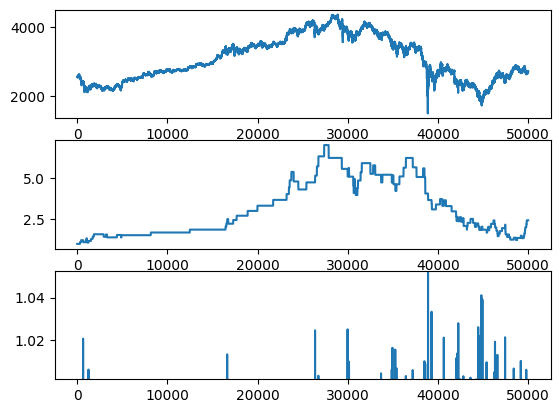

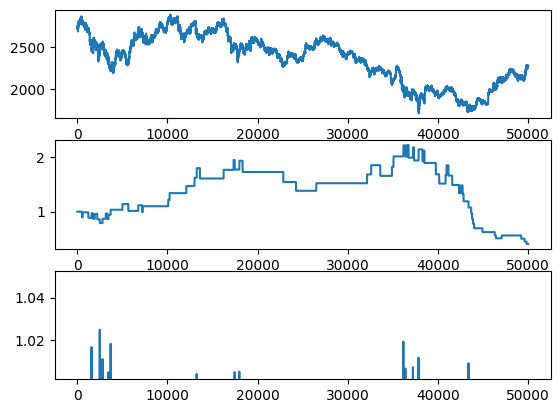

In [ ]:
#     chunky survey 필요함    #
chunk_size = 50000

sync_pr = np.ones(len(res_df))
sync_tr = np.zeros(len(res_df))
# sync_tr = np.empty(len(res_df))
# sync_tr[:] = np.nan

max_tr = np.max(tp_ratio_list)
min_tr = np.min(tp_ratio_list)

for ck_i in range(0, len(res_df), chunk_size):

  chunked_df = res_df.iloc[ck_i:ck_i + chunk_size]
  # break

  for pr_, eptp_idx, tr_ in zip(pr_list[ck_i:ck_i + chunk_size], trade_list[ck_i:ck_i + chunk_size], tp_ratio_list[ck_i:ck_i + chunk_size]):
    # print(pr_, eptp_idx)
    sync_pr[eptp_idx[-1][0]] = pr_
    sync_tr[eptp_idx[-1][0]] = tr_
    # break

  chunked_pr = sync_pr[ck_i:ck_i + chunk_size]
  chunked_tr = sync_tr[ck_i:ck_i + chunk_size]
  chunked_tr = np.where(np.isnan(chunked_tr), pd.Series(chunked_tr).shift(1), chunked_tr)

  # plt.figure(figsize=(8, 6))

  plt.subplot(311)
  plt.plot(np.arange(len(chunked_df)), chunked_df['close'])
  # plt.show()

  plt.subplot(312)
  plt.plot(np.cumprod(chunked_pr))
  
  plt.subplot(313)
  plt.plot(chunked_tr)
  plt.ylim(min_tr + 0.5 * (max_tr - min_tr), max_tr)
  
  plt.show()
  print()


### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



### plot all indicator (stepline ver.)

short real pr : [0.95849245]
long real pr : [1.0378222]


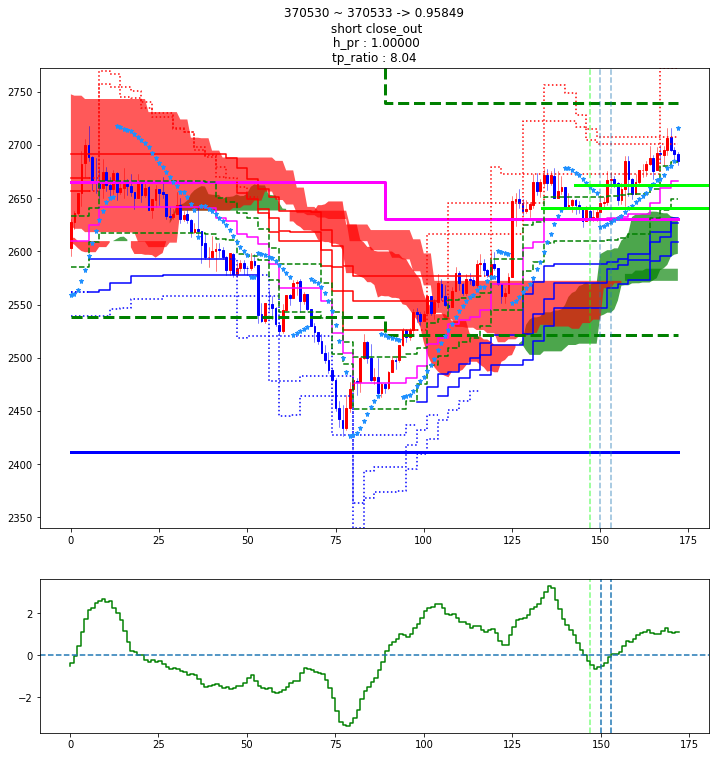

In [ ]:
save_plot = False


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    
# prev_plotsize = 120
prev_plotsize = 150
post_plotsize = 20

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


#         select plot columns       #
major_st_list = ['major_ST1_Up', 'major_ST1_Down', 'major_ST2_Up', 'major_ST2_Down', 'major_ST3_Up', 'major_ST3_Down',
                 'major_middle_line', 'major_upper_middle', 'major_lower_middle']

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower'] # + major_st_list


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1',  'senkou_a2']
senkoub_list = ['senkou_b1',  'senkou_b2']

# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1']

# ma_list = ['sma1', 'sma4']
ma_list = ['ema5']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + ma_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + ma_list + macd_list + stoch_list + fisher_list + cctbbo_list
input_colname = basic_list + major_st_list + senkoua_list + senkoub_list + sar_list + stoch_list + fisher_list + emaroc_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list # currently just used for ymin, ymax
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




# for t_i, (initial_i, i, j) in enumerate(trade_list):
for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # if 100 < i < 1860:
  if ep_idx_list_[0] == 370530:
    pass
  else:
    continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]
  # st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend', 'major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # htf_st_trend_plot_df = res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break
  
  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, plot_df['minor_ST1_Up'], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, plot_df['minor_ST2_Up'], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, plot_df['minor_ST3_Up'], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, plot_df['minor_ST1_Down'], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, plot_df['minor_ST2_Down'], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, plot_df['minor_ST3_Down'], np.nan)

  plot_df["off_color_upper_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, plot_df['major_ST1_Up'], np.nan)
  plot_df["off_color_upper_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, plot_df['major_ST2_Up'], np.nan)
  plot_df["off_color_upper_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, plot_df['major_ST3_Up'], np.nan)
  plot_df["off_color_lower_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, plot_df['major_ST1_Down'], np.nan)
  plot_df["off_color_lower_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, plot_df['major_ST2_Down'], np.nan)
  plot_df["off_color_lower_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, plot_df['major_ST3_Down'], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df['minor_ST1_Up'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, np.nan, plot_df['minor_ST1_Up'])
  plot_df['minor_ST2_Up'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, np.nan, plot_df['minor_ST2_Up'])
  plot_df['minor_ST3_Up'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, np.nan, plot_df['minor_ST3_Up'])
  plot_df['minor_ST1_Down'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, np.nan, plot_df['minor_ST1_Down'])
  plot_df['minor_ST2_Down'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, np.nan, plot_df['minor_ST2_Down'])
  plot_df['minor_ST3_Down'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, np.nan, plot_df['minor_ST3_Down'])

  plot_df['major_ST1_Up'] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, np.nan, plot_df['major_ST1_Up'])
  plot_df['major_ST2_Up'] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, np.nan, plot_df['major_ST2_Up'])
  plot_df['major_ST3_Up'] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, np.nan, plot_df['major_ST3_Up'])
  plot_df['major_ST1_Down'] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, np.nan, plot_df['major_ST1_Down'])
  plot_df['major_ST2_Down'] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, np.nan, plot_df['major_ST2_Down'])
  plot_df['major_ST3_Down'] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, np.nan, plot_df['major_ST3_Down'])


  plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  


  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=False, numbest=1,  window=30) # requires matplotlib - pip install matplotlib

  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  plt.step(plot_df[['minor_ST1_Up', 'minor_ST2_Up', 'minor_ST3_Up']].values, 'r', alpha=1)  # upper on color
  plt.step(plot_df[['minor_ST1_Down', 'minor_ST2_Down', 'minor_ST3_Down']].values, 'b', alpha=1)  # lower on color
  
  plt.step(plot_df[['major_ST1_Up', 'major_ST2_Up', 'major_ST3_Up']].values, 'r', alpha=1, linewidth=3)  # major upper on color
  plt.step(plot_df[['major_ST1_Down', 'major_ST2_Down', 'major_ST3_Down']].values, 'b', alpha=1, linewidth=3)  # major lower on color

  plt.step(plot_df[['middle_line']].values, 'fuchsia', alpha=1)  # middle 
  plt.step(plot_df[['major_middle_line']].values, 'fuchsia', alpha=1, linewidth=3)  # major_middle 
  
  plt.step(plot_df[['off_color_upper_st1', 'off_color_upper_st2', 'off_color_upper_st3']].values, 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df[['off_color_lower_st1', 'off_color_lower_st2', 'off_color_lower_st3']].values, 'b', alpha=1, linestyle=':')  # lower off color
  
  plt.step(plot_df[['off_color_upper_hst1', 'off_color_upper_hst2', 'off_color_upper_hst3']].values, 'r', alpha=1, linestyle=':', linewidth=3)  # major upper off color
  plt.step(plot_df[['off_color_lower_hst1', 'off_color_lower_hst2', 'off_color_lower_hst3']].values, 'b', alpha=1, linestyle=':', linewidth=3)  # major lower off color


  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  plt.step(plot_df[['major_upper_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  plt.step(plot_df[['major_lower_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- sma ---------------------- #
  # alpha = 1
  # for sm_i, sma in enumerate(ma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
  #   alpha -= 0.2
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
  # ------------- initial order ------------- #
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i], tp_ratio_list[t_i]))
  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], tp_ratio_list[t_i]))

  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  plt.subplot(gs[1])
  alpha = 1
  for emaroc in emaroc_list:
    plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  plt.axhline(0, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


In [ ]:
# print()
for item in os.listdir(current_path + "plot_check/"):
  if item.endswith('png'):
    os.remove(current_path + "plot_check/" + item)
    print(current_path + "plot_check/" + item, "removed !")

### plot nontp case

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

# hedge = True
# hedge = False

short_ver = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list 
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


if short_ver:
  nontp_indexs = nontp_short_indexs
  nontp_liqd_list = nontp_short_liqd_list
  nontp_pr_list = nontp_short_pr_list
  nontp_ep = nontp_short_ep_list
else:
  nontp_indexs = nontp_long_indexs
  nontp_liqd_list = nontp_long_liqd_list
  nontp_pr_list = nontp_long_pr_list
  nontp_ep = nontp_long_ep_list


for t_i, i in enumerate(nontp_indexs):

  j = len(res_df) - 1

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  if i != initial_i:
    plt.axvline(prev_plotsize - (i - initial_i), alpha=0.5, linestyle='--')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(nontp_ep[t_i], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline    

  #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - i), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> liqd : %.2f\npr : %.2f" % (i, j, nontp_liqd_list[t_i], nontp_pr_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(313)
  plt.subplot(gs[1])
  alpha = 1
  for stoch in stoch_list:
    plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(50, linestyle='--')
  plt.axhline(stoch_upper, linestyle='--')
  plt.axhline(stoch_lower, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


## none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()